# Telsra Kaggle Challenge

## Libraries installation

In [1]:
import os
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)  

import seaborn as sns
import scipy.stats as sct
# import pylab
import warnings
warnings.filterwarnings('ignore')

## Read and Structure the data

In [2]:
train = pd.read_csv('data/train.csv').set_index('id')
print(f'Training set shape : {train.shape}')

test = pd.read_csv('data/test.csv').set_index('id')
print(f'Testing set shape : {test.shape}')

event_type = pd.read_csv('data/event_type.csv').set_index('id')
print(f'Event type set shape : {event_type.shape}')

log_feature = pd.read_csv('data/log_feature.csv').set_index('id')
print(f'Log feature set shape : {log_feature.shape}')

resource_type = pd.read_csv('data/resource_type.csv').set_index('id')
print(f'Resource type set shape : {resource_type.shape}')

severity_type = pd.read_csv('data/severity_type.csv').set_index('id')
print(f'Severity type set shape : {severity_type.shape}')

# train_index = train.index
# test_index = test.index
# print(train.shape[0]+test.shape[0]) #duplicates ?

Training set shape : (7381, 2)
Testing set shape : (11171, 1)
Event type set shape : (31170, 1)
Log feature set shape : (58671, 2)
Resource type set shape : (21076, 1)
Severity type set shape : (18552, 1)


In [3]:
train.head()


location  fault_severity
id                                 
14121  location 118               1
9320    location 91               0
14394  location 152               1
8218   location 931               1
14804  location 120               0

In [179]:
event_type.head()

event_type
id                 
6597  event_type 11
8011  event_type 15
2597  event_type 15
5022  event_type 15
5022  event_type 11

In [180]:
test.head()

location
id                 
11066  location 481
18000  location 962
16964  location 491
4795   location 532
3392   location 600

### Convert to categorical features

In [9]:
#map to categorical data
def convert_str_toint(data):
    return data.ix[:,0].str.split(' ').str[-1].astype("int")
train.ix[:,0] = convert_str_toint(train)
test.ix[:,0] = convert_str_toint(test)
severity_type.ix[:,0] = convert_str_toint(severity_type)
event_type.ix[:,0] = convert_str_toint(event_type)
log_feature.ix[:,0] = convert_str_toint(log_feature)
resource_type.ix[:,0] = convert_str_toint(resource_type)


In [118]:
# def convert_str_toint(data, cols):
#     for col in cols :
#         data[col] = data[col].str.split(' ').str[-1].astype("int")
# #     return data.ix[:,0].str.split(' ').str[-1].astype("int")
# cols_convert = ['location', 'event_type', 'log_feature', 'resource_type', 'severity_type']
# convert_str_toint(train,cols_convert)
# convert_str_toint(test,cols_convert)

In [196]:
train.head()

location  fault_severity
id                             
14121       118               1
9320         91               0
14394       152               1
8218        931               1
14804       120               0

In [121]:
train.log_feature.values

array([312, 232, 312, ...,  81, 191,  70])

### Merge

In [10]:
train = train.merge(event_type, how = 'left', left_on='id', right_on='id')
train = train.merge(log_feature, how = 'left', left_on='id', right_on='id')
train = train.merge(resource_type, how = 'left', left_on='id', right_on='id')
train = train.merge(severity_type, how = 'left', left_on='id', right_on='id')
print(f'Training set shape : {train.shape}')
train.head()


Training set shape : (61839, 7)


location  fault_severity  event_type  log_feature  volume  \
id                                                                 
14121       118               1          34          312      19   
14121       118               1          34          232      19   
14121       118               1          35          312      19   
14121       118               1          35          232      19   
9320         91               0          34          315     200   

       resource_type  severity_type  
id                                   
14121              2              2  
14121              2              2  
14121              2              2  
14121              2              2  
9320               2              2

In [332]:
test = test.merge(event_type, how = 'left', left_on='id', right_on='id')
test = test.merge(log_feature, how = 'left', left_on='id', right_on='id')
test = test.merge(resource_type, how = 'left', left_on='id', right_on='id')
test = test.merge(severity_type, how = 'left', left_on='id', right_on='id')
print(f'Testing set shape : {test.shape}')
test.head()


Testing set shape : (84584, 6)


location  event_type  log_feature  volume  resource_type  severity_type
id                                                                            
11066       481          35          230      24              2              2
11066       481          35          310      28              2              2
11066       481          35          228      20              2              2
11066       481          35          308      26              2              2
11066       481          34          230      24              2              2

## Exploring the data

In [202]:
idx_train = np.unique(train.index)
idx_test = np.unique(test.index)

### Location

In [295]:
enum = train.location.values.max() - train.location.values.min() + 1 #range of available categories
print(f'The feature "location" has {enum} categories')

print(f'Number of rows in location set : {train.shape[0]}')
print(f'Number of dinstinct ids in location set : {np.unique(train.index).shape[0]}')
train[train.index == 14121]
#no dinstinct duplicates so far (already in the training set)


The feature "location" has 1126 categories
Number of rows in location set : 61839
Number of dinstinct ids in location set : 7381


location  fault_severity  event_type  log_feature  volume  \
id                                                                 
14121       118               1          34          312      19   
14121       118               1          34          232      19   
14121       118               1          35          312      19   
14121       118               1          35          232      19   

       resource_type  severity_type  
id                                   
14121              2              2  
14121              2              2  
14121              2              2  
14121              2              2

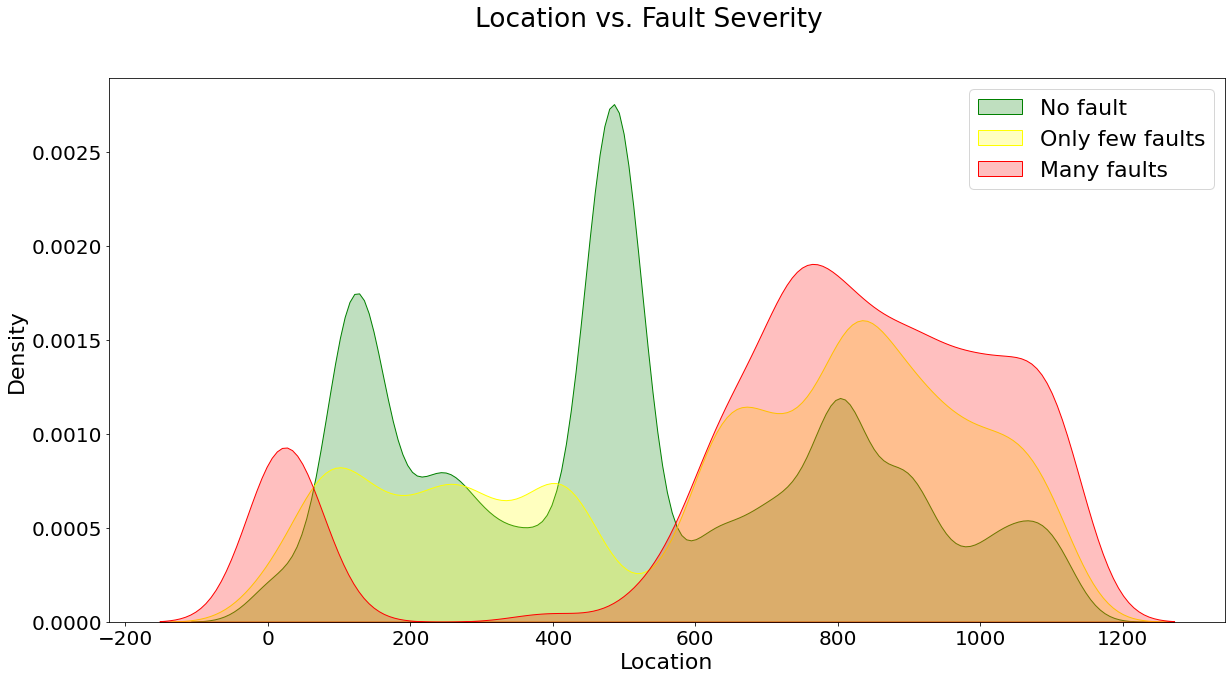

In [353]:
fig, ax = plt.subplots()

sns.kdeplot(train[train.fault_severity == 0]["location"], shade=True, color="green", label="No fault", ax=ax)
sns.kdeplot(train[train.fault_severity == 1]["location"], shade=True, color="yellow", label="Only few faults", ax=ax)
sns.kdeplot(train[train.fault_severity == 2]["location"], shade=True, color="red", label="Many faults", ax=ax)
plt.legend()
ax.set_xlabel("Location")
ax.set_ylabel("Density")

fig.suptitle("Location vs. Fault Severity");

### Event Type

In [5]:
print(event_type.shape)
event_type.head()


(31170, 1)


event_type
id                 
6597  event_type 11
8011  event_type 15
2597  event_type 15
5022  event_type 15
5022  event_type 11

In [212]:
enum = event_type.event_type.values.max() - event_type.event_type.values.min() + 1 #range of available categories
print(f'The feature "event type" has {enum} categories')

print(f'Number of rows in event type set : {event_type.shape[0]}')
print(f'Number of dinstinct ids in event type set : {np.unique(event_type.index).shape[0]}')
train[train.event_type.index == 14121]
#it seems there are duplicates


The feature "event type" has 54 categories
Number of rows in event type set : 31170
Number of dinstinct ids in event type set : 18552


location  fault_severity  event_type  log_feature  volume  \
id                                                                 
14121       118               1          34          312      19   
14121       118               1          34          232      19   
14121       118               1          35          312      19   
14121       118               1          35          232      19   

       resource_type  severity_type  
id                                   
14121              2              2  
14121              2              2  
14121              2              2  
14121              2              2

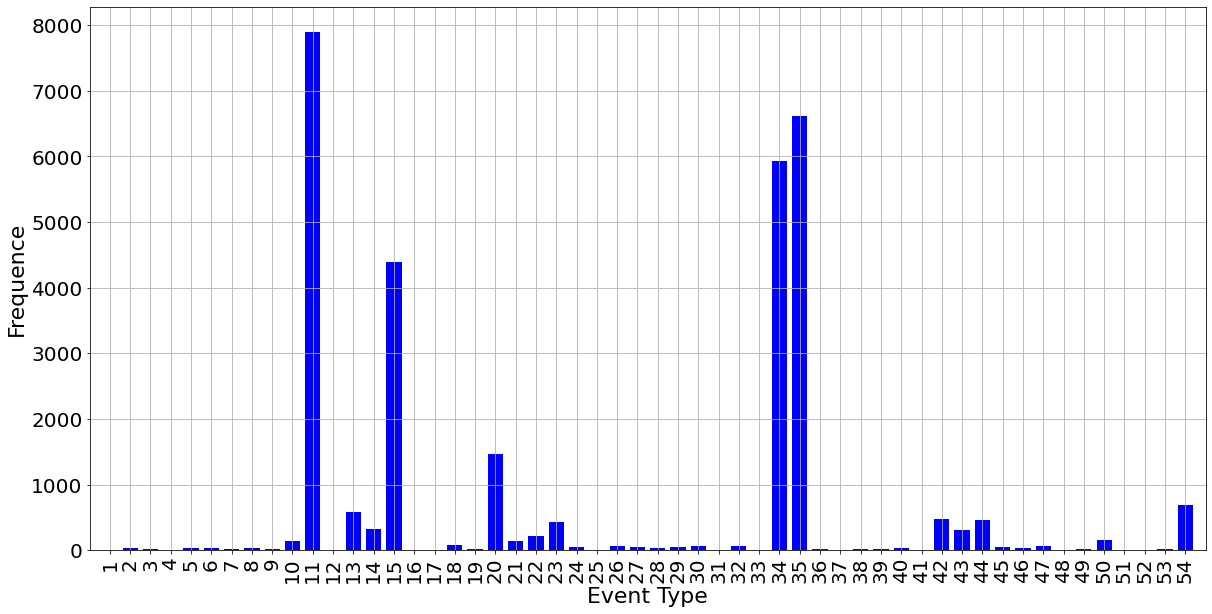

In [20]:
#enumerate

categories_event = np.arange(event_type.event_type.values.min(), event_type.event_type.values.max()+1)
count_event = event_type.event_type.value_counts().reindex(categories_event, fill_value = 0)#train.event_type.value_counts().sort_index()



plt.bar(categories_event, count_event.values, color = 'b', width = 0.75)
plt.grid()
plt.xlabel('Event Type')
plt.ylabel('Frequence')
plt.xticks(categories_event,rotation=90)
plt.xlim(categories_event.min()-1,categories_event.max()+1)
plt.show()

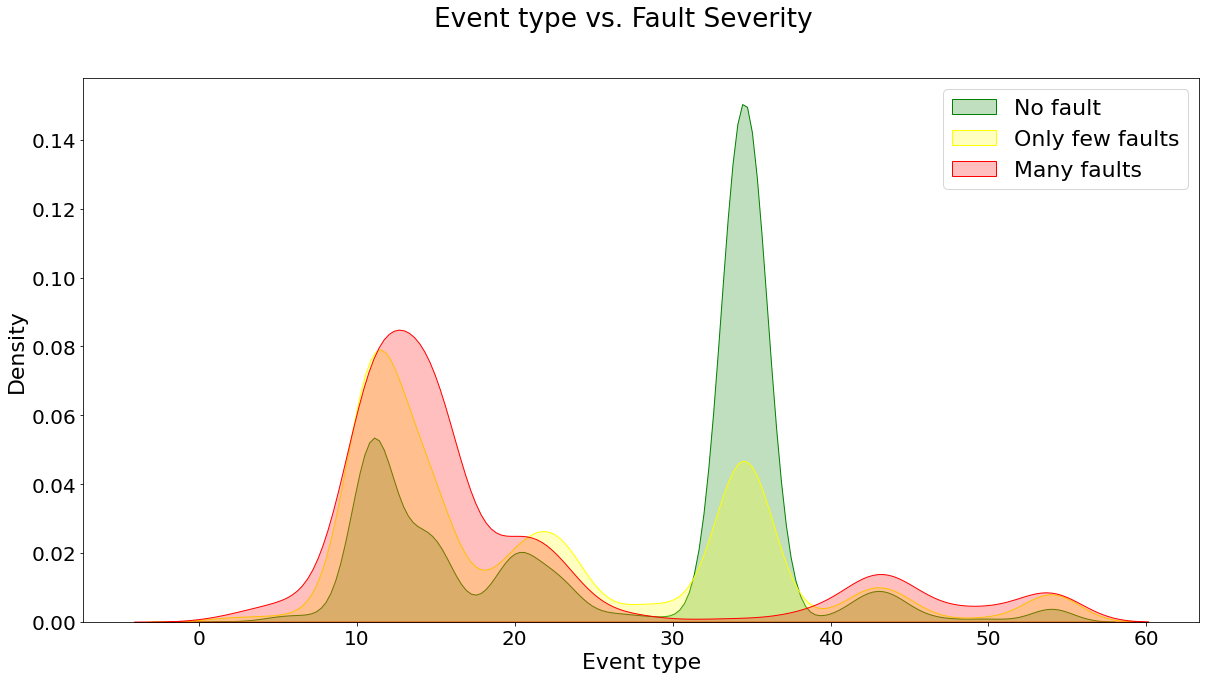

In [268]:
fig, ax = plt.subplots()

sns.kdeplot(train[train.fault_severity == 0]["event_type"], shade=True, color="green", label="No fault", ax=ax)
sns.kdeplot(train[train.fault_severity == 1]["event_type"], shade=True, color="yellow", label="Only few faults", ax=ax)
sns.kdeplot(train[train.fault_severity == 2]["event_type"], shade=True, color="red", label="Many faults", ax=ax)
plt.legend()
ax.set_xlabel("Event type")
ax.set_ylabel("Density")

fig.suptitle("Event type vs. Fault Severity");

### Resource Type

In [7]:
print(resource_type.shape)
resource_type.head()


(21076, 1)


resource_type
id                   
6597  resource_type 8
8011  resource_type 8
2597  resource_type 8
5022  resource_type 8
6852  resource_type 8

In [11]:
enum = resource_type.resource_type.values.max() - resource_type.resource_type.values.min() + 1 #range of available categories
print(f'The feature "resource type" has {enum} categories')

print(f'Number of rows in resource type set : {resource_type.shape[0]}')
print(f'Number of dinstinct ids in resource type set : {np.unique(resource_type.index).shape[0]}')
train[train.resource_type.index == 1]
#it seems there are duplicates


The feature "resource type" has 10 categories
Number of rows in resource type set : 21076
Number of dinstinct ids in resource type set : 18552


location  fault_severity  event_type  log_feature  volume  resource_type  \
id                                                                             
1        601               1          11           68       2              8   
1        601               1          11           68       2              6   
1        601               1          11          345       2              8   
1        601               1          11          345       2              6   
1        601               1          11          179       1              8   
1        601               1          11          179       1              6   
1        601               1          13           68       2              8   
1        601               1          13           68       2              6   
1        601               1          13          345       2              8   
1        601               1          13          345       2              6   
1        601               1          13          179       1              8   
1        601               1          13          179       1              6   

    severity_type  
id                 
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1

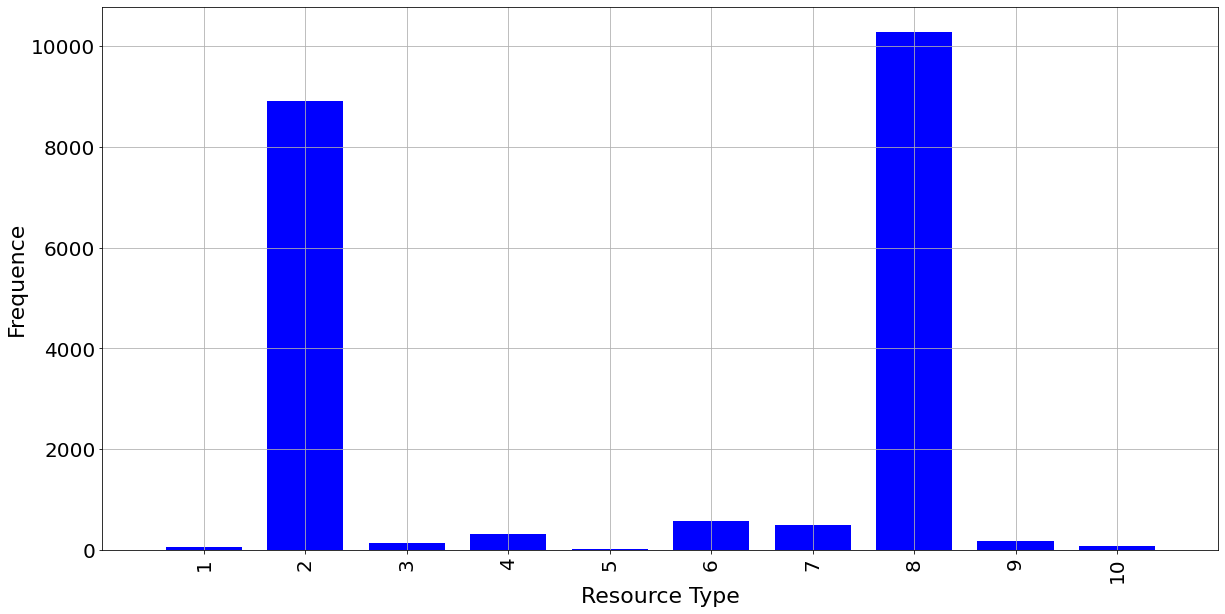

In [19]:
#enumerate

categories_severity = np.arange(resource_type.resource_type.values.min(), resource_type.resource_type.values.max()+1)
count_severity = resource_type.resource_type.value_counts().reindex(categories_severity, fill_value = 0)#train.event_type.value_counts().sort_index()



plt.bar(categories_severity, count_severity.values, color = 'b', width = 0.75)
plt.grid()
plt.xlabel('Resource Type')
plt.ylabel('Frequence')
plt.xticks(categories_severity,rotation=90)
plt.xlim(categories_severity.min()-1,categories_severity.max()+1)
plt.show()

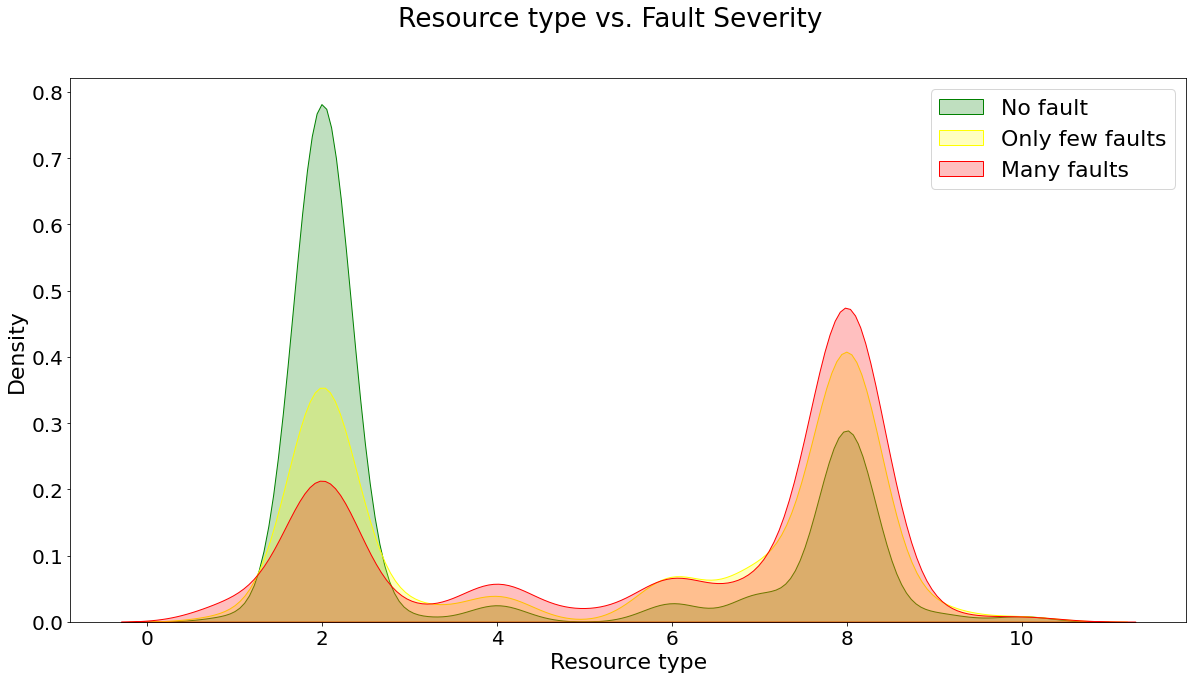

In [275]:
fig, ax = plt.subplots()

sns.kdeplot(train[train.fault_severity == 0]["resource_type"], shade=True, color="green", label="No fault", ax=ax)
sns.kdeplot(train[train.fault_severity == 1]["resource_type"], shade=True, color="yellow", label="Only few faults", ax=ax)
sns.kdeplot(train[train.fault_severity == 2]["resource_type"], shade=True, color="red", label="Many faults", ax=ax)
plt.legend()
ax.set_xlabel("Resource type")
ax.set_ylabel("Density")

fig.suptitle("Resource type vs. Fault Severity");

### Severity Type

In [6]:
print(severity_type.shape)
severity_type.head()


(18552, 1)


severity_type
id                   
6597  severity_type 2
8011  severity_type 2
2597  severity_type 2
5022  severity_type 1
6852  severity_type 1

In [269]:
enum = severity_type.severity_type.values.max() - severity_type.severity_type.values.min() + 1 #range of available categories
print(f'The feature "severity type" has {enum} categories')

print(f'Number of rows in severity type set : {severity_type.shape[0]}')
print(f'Number of dinstinct ids in severity type set : {np.unique(severity_type.index).shape[0]}')
train[train.severity_type.index == 14121]
#it seems there are duplicates


The feature "severity type" has 5 categories
Number of rows in severity type set : 18552
Number of dinstinct ids in severity type set : 18552


location  fault_severity  event_type  log_feature  volume  \
id                                                                 
14121       118               1          34          312      19   
14121       118               1          34          232      19   
14121       118               1          35          312      19   
14121       118               1          35          232      19   

       resource_type  severity_type  
id                                   
14121              2              2  
14121              2              2  
14121              2              2  
14121              2              2

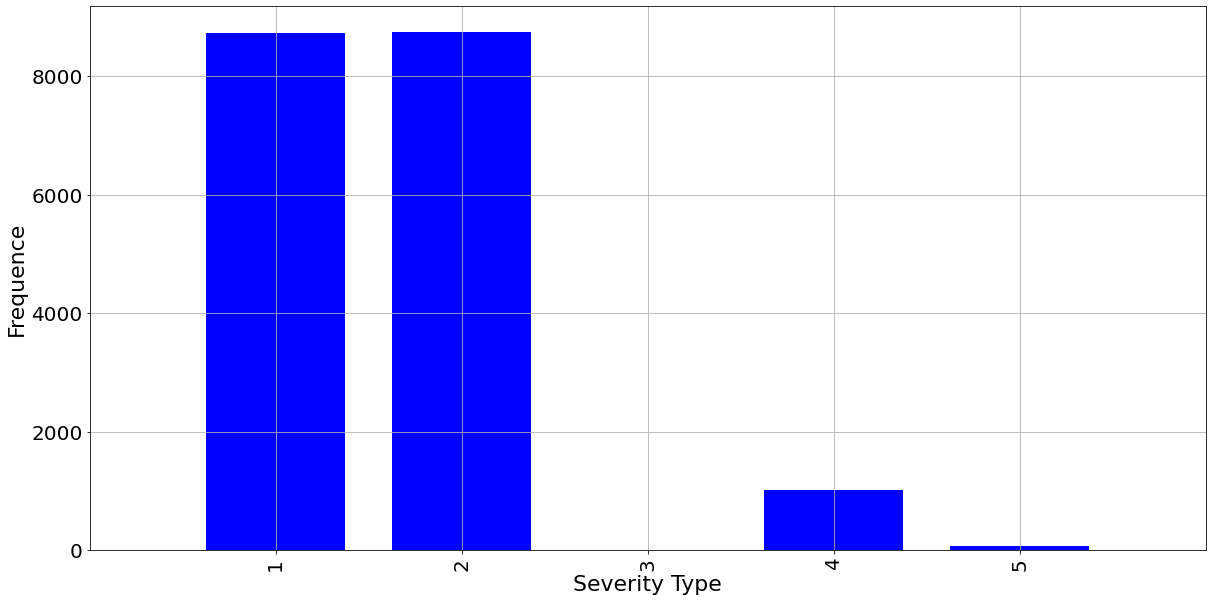

In [21]:
#enumerate

categories_severity = np.arange(severity_type.severity_type.values.min(), severity_type.severity_type.values.max()+1)
count_severity = severity_type.severity_type.value_counts().reindex(categories_severity, fill_value = 0)#train.event_type.value_counts().sort_index()



plt.bar(categories_severity, count_severity.values, color = 'b', width = 0.75)
plt.grid()
plt.xlabel('Severity Type')
plt.ylabel('Frequence')
plt.xticks(categories_severity,rotation=90)
plt.xlim(categories_severity.min()-1,categories_severity.max()+1)
plt.show()

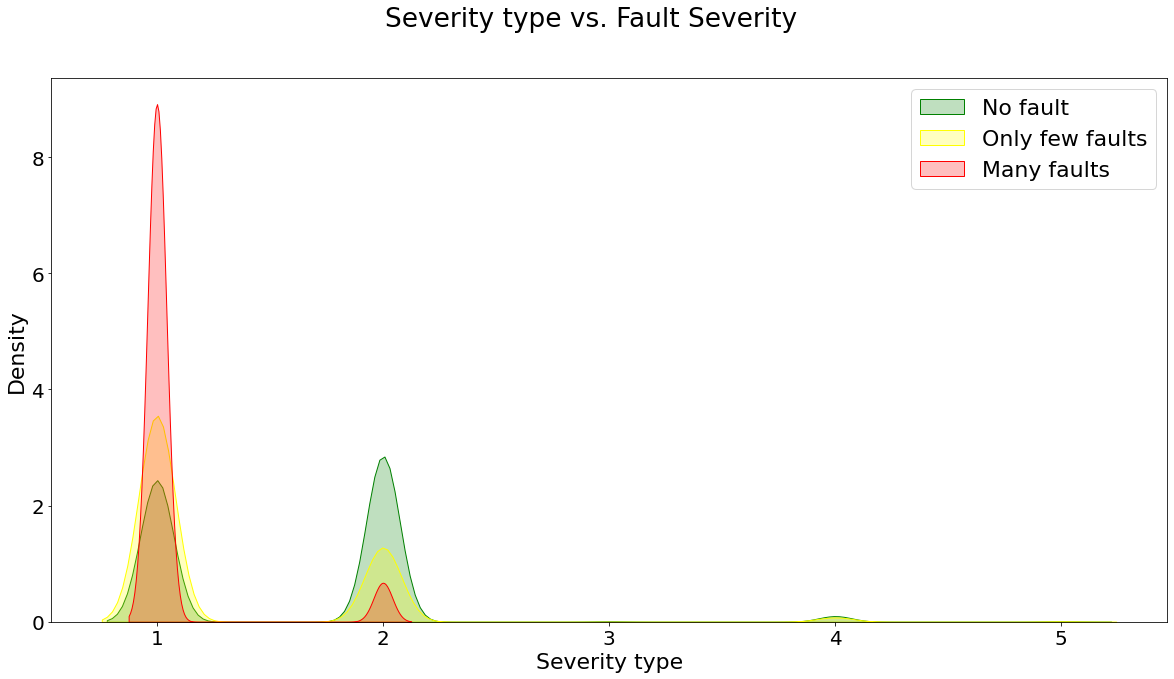

In [272]:
fig, ax = plt.subplots()

sns.kdeplot(train[train.fault_severity == 0]["severity_type"], shade=True, color="green", label="No fault", ax=ax)
sns.kdeplot(train[train.fault_severity == 1]["severity_type"], shade=True, color="yellow", label="Only few faults", ax=ax)
sns.kdeplot(train[train.fault_severity == 2]["severity_type"], shade=True, color="red", label="Many faults", ax=ax)
plt.legend()
ax.set_xlabel("Severity type")
ax.set_ylabel("Density")

fig.suptitle("Severity type vs. Fault Severity");

### log feature

In [22]:
print(log_feature.shape)
log_feature.head()


(58671, 2)


log_feature  volume
id                       
6597           68       6
8011           68       7
2597           68       1
5022          172       2
5022           56       1

In [278]:
enum = log_feature.log_feature.values.max() - log_feature.log_feature.values.min() + 1 #range of available categories
print(f'The feature "log feature" has {enum} categories')

print(f'Number of rows in log feature set : {log_feature.shape[0]}')
print(f'Number of dinstinct ids in log feature set : {np.unique(log_feature.index).shape[0]}')
train[train.log_feature.index == 14121]
#it seems there are duplicates


The feature "log feature" has 386 categories
Number of rows in log feature set : 58671
Number of dinstinct ids in log feature set : 18552


location  fault_severity  event_type  log_feature  volume  \
id                                                                 
14121       118               1          34          312      19   
14121       118               1          34          232      19   
14121       118               1          35          312      19   
14121       118               1          35          232      19   

       resource_type  severity_type  
id                                   
14121              2              2  
14121              2              2  
14121              2              2  
14121              2              2

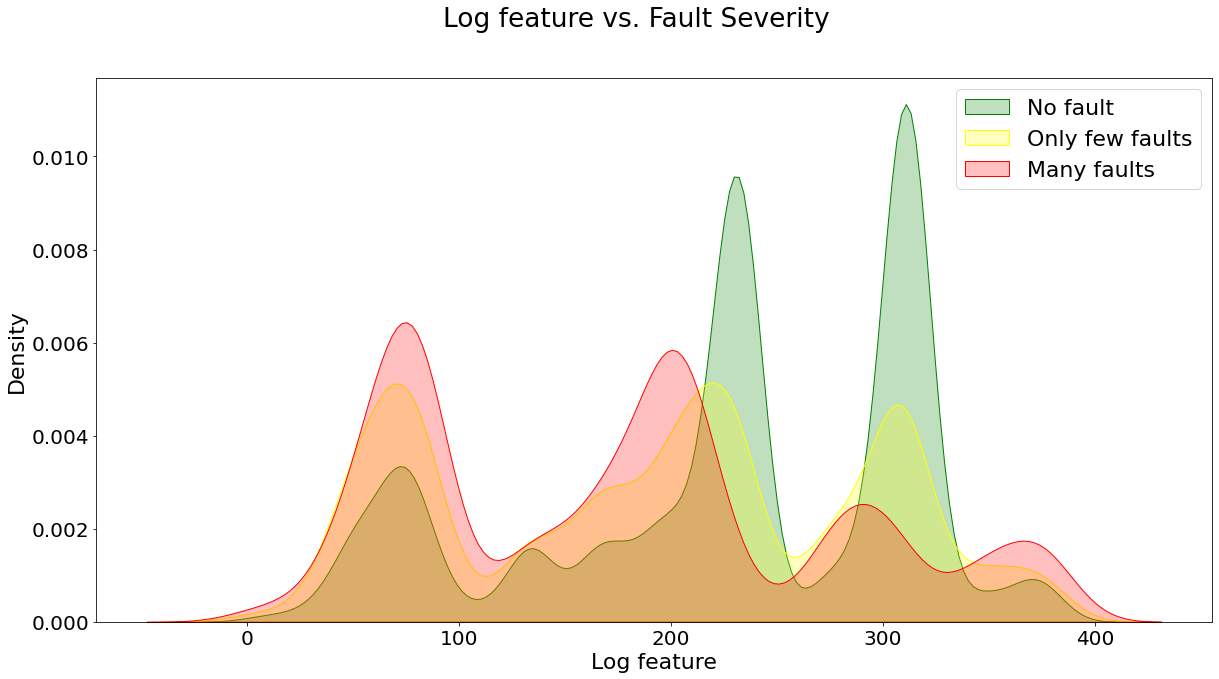

In [280]:
fig, ax = plt.subplots()

sns.kdeplot(train[train.fault_severity == 0]["log_feature"], shade=True, color="green", label="No fault", ax=ax)
sns.kdeplot(train[train.fault_severity == 1]["log_feature"], shade=True, color="yellow", label="Only few faults", ax=ax)
sns.kdeplot(train[train.fault_severity == 2]["log_feature"], shade=True, color="red", label="Many faults", ax=ax)
plt.legend()
ax.set_xlabel("Log feature")
ax.set_ylabel("Density")

fig.suptitle("Log feature vs. Fault Severity");

### Volume

In [27]:
len(np.unique(log_feature.volume.values))

341

In [291]:
enum = log_feature.volume.values.max() - log_feature.volume.values.min() + 1 #range of available categories
print(f'The feature "volume" has {enum} categories')

print(f'Number of rows in volume set : {log_feature.shape[0]}')
print(f'Number of dinstinct ids in volume set : {np.unique(log_feature.index).shape[0]}')
train[train.index == 1]
#it seems there are duplicates


The feature "volume" has 1310 categories
Number of rows in volume set : 58671
Number of dinstinct ids in volume set : 18552


location  fault_severity  event_type  log_feature  volume  resource_type  \
id                                                                             
1        601               1          11           68       2              8   
1        601               1          11           68       2              6   
1        601               1          11          345       2              8   
1        601               1          11          345       2              6   
1        601               1          11          179       1              8   
1        601               1          11          179       1              6   
1        601               1          13           68       2              8   
1        601               1          13           68       2              6   
1        601               1          13          345       2              8   
1        601               1          13          345       2              6   
1        601               1          13          179       1              8   
1        601               1          13          179       1              6   

    severity_type  
id                 
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1  
1               1

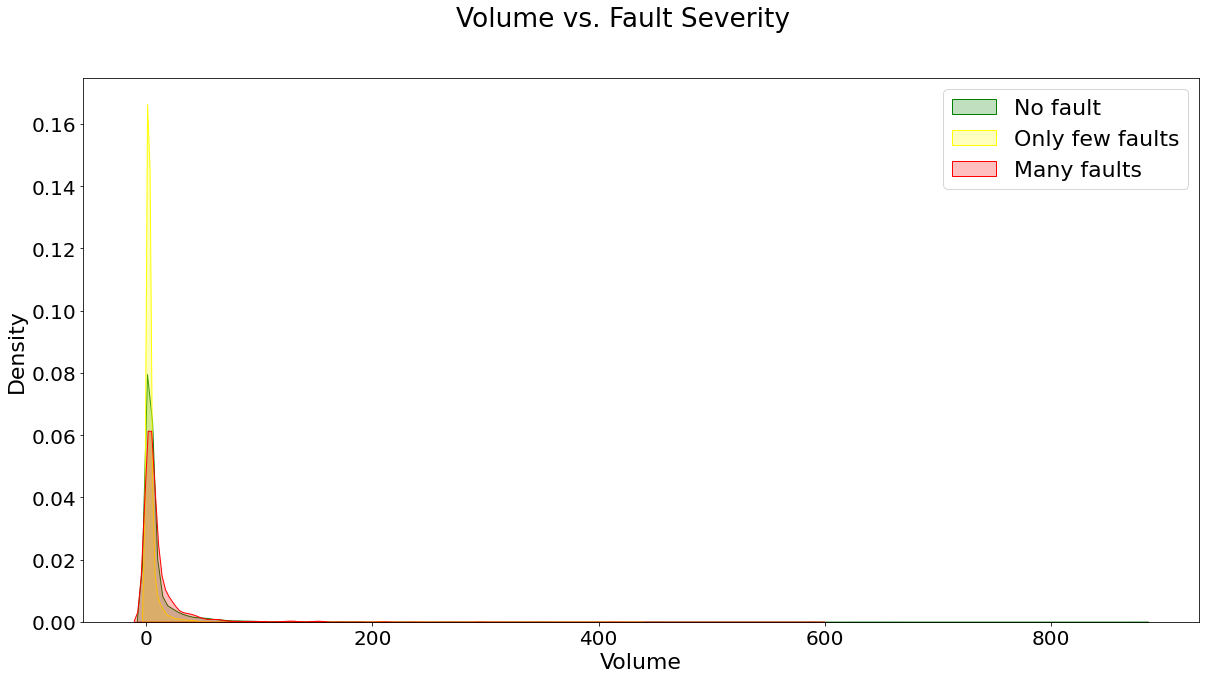

In [293]:
fig, ax = plt.subplots()

sns.kdeplot(train[train.fault_severity == 0]["volume"], shade=True, color="green", label="No fault", ax=ax)
sns.kdeplot(train[train.fault_severity == 1]["volume"], shade=True, color="yellow", label="Only few faults", ax=ax)
sns.kdeplot(train[train.fault_severity == 2]["volume"], shade=True, color="red", label="Many faults", ax=ax)
plt.legend()
ax.set_xlabel("Volume")
ax.set_ylabel("Density")

fig.suptitle("Volume vs. Fault Severity");

### Target Variable (Fault Severity)

In [422]:
enum = train.fault_severity.values.max() - train.fault_severity.values.min() + 1 #range of available categories
print(f'The target feature "fault severity" has {enum} categories')


The target feature "fault severity" has 3 categories


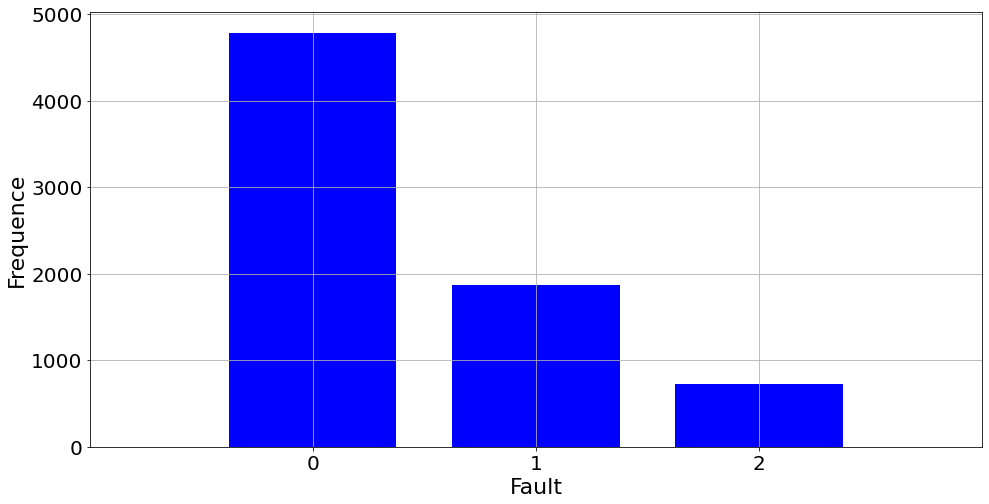

In [427]:
#enumerate

categories = np.arange(train.fault_severity.values.min(), train.fault_severity.values.max()+1)
count = train.fault_severity.value_counts().reindex(categories, fill_value = 0)#train.event_type.value_counts().sort_index()



plt.bar(categories, count.values, color = 'b', width = 0.75)
plt.grid()
plt.xlabel('Fault')
plt.ylabel('Frequence')
plt.xticks(categories)
plt.xlim(categories.min()-1,categories.max()+1)
plt.show()

Imbalanced data

## Create dummy features

In [5]:
df_train = pd.read_csv('train.csv').set_index('id')
df_train.ix[:,0] = convert_str_toint(df_train)

df_test = pd.read_csv('test.csv').set_index('id')
df_test.ix[:,0] = convert_str_toint(df_test)

# cols = ['location', 'event_type', 'log_feature', 'resource_type', 'severity_type']


In [6]:
features = [event_type, log_feature, resource_type, severity_type]

def create_dummy_vars(data,features) :
    for var in features :
        for subvar in var.columns.values :
            print(subvar)
            categories = [subvar + '_' + str(i) for i in range(1,var[subvar].max()+1)] #when not all categories are present
            print(len(categories))
            temp = pd.get_dummies(var[subvar],prefix=subvar).groupby('id').agg('sum')
            temp = temp.T.reindex(categories).T.fillna(0).astype('int')
            data = data.merge(temp, how = 'left', left_on='id', right_on='id')
    return data
    
X = create_dummy_vars(df_train, features)  
X, y = X.drop('fault_severity', axis=1), X.fault_severity  
# X_tr_temp.head()
X_test = create_dummy_vars(df_test, features)  
# X_test_temp.head()
    


event_type
54
log_feature
386
volume
1310
resource_type
10
severity_type
5
event_type
54
log_feature
386
volume
1310
resource_type
10
severity_type
5


In [142]:
print(X.shape)
X = X.fillna(0)
X = X.replace([np.inf, -np.inf], 0)
X

(7381, 1766)


location  event_type_1  event_type_2  event_type_3  event_type_4  \
id                                                                        
14121       118             0             0             0             0   
9320         91             0             0             0             0   
14394       152             0             0             0             0   
8218        931             0             0             0             0   
14804       120             0             0             0             0   
...         ...           ...           ...           ...           ...   
870         167             0             0             0             0   
18068       106             0             0             0             0   
14111      1086             0             0             0             0   
15189         7             0             0             0             0   
17067       885             0             0             0             0   

       event_type_5  event_type_6  event_type_7  event_type_8  event_type_9  \
id                                                                            
14121             0             0             0             0             0   
9320              0             0             0             0             0   
14394             0             0             0             0             0   
8218              0             0             0             0             0   
14804             0             0             0             0             0   
...             ...           ...           ...           ...           ...   
870               0             0             0             0             0   
18068             0             0             0             0             0   
14111             0             0             0             0             0   
15189             0             0             0             0             0   
17067             0             0             0             0             0   

       ...  resource_type_6  resource_type_7  resource_type_8  \
id     ...                                                      
14121  ...                0                0                0   
9320   ...                0                0                0   
14394  ...                0                0                0   
8218   ...                0                0                1   
14804  ...                0                0                1   
...    ...              ...              ...              ...   
870    ...                0                0                0   
18068  ...                0                0                0   
14111  ...                0                0                1   
15189  ...                0                0                1   
17067  ...                0                0                1   

       resource_type_9  resource_type_10  severity_type_1  severity_type_2  \
id                                                                           
14121                0                 0                0                1   
9320                 0                 0                0                1   
14394                0                 0                0                1   
8218                 0                 0                1                0   
14804                0                 0                1                0   
...                ...               ...              ...              ...   
870                  0                 0                0                1   
18068                0                 0                1                0   
14111                0                 0                0                1   
15189                0                 0                1                0   
17067                0                 0                1                0   

       severity_type_3  severity_type_4  severity_type_5  
id                                                        
14121                0  

In [143]:
print(X_test.shape)
X_test = X_test.fillna(0)
X_test = X_test.replace([np.inf, -np.inf], 0)
X_test

(11171, 1766)


location  event_type_1  event_type_2  event_type_3  event_type_4  \
id                                                                        
11066       481             0             0             0             0   
18000       962             0             0             0             0   
16964       491             0             0             0             0   
4795        532             0             0             0             0   
3392        600             0             0             0             0   
...         ...           ...           ...           ...           ...   
14806      1073             0             0             0             0   
1825         11             0             0             0             0   
2374        917             0             0             0             0   
7277        208             0             0             0             0   
9886        438             0             0             0             0   

       event_type_5  event_type_6  event_type_7  event_type_8  event_type_9  \
id                                                                            
11066             0             0             0             0             0   
18000             0             0             0             0             0   
16964             0             0             0             0             0   
4795              0             0             0             0             0   
3392              0             0             0             0             0   
...             ...           ...           ...           ...           ...   
14806             0             0             0             0             0   
1825              0             0             0             0             0   
2374              0             0             0             0             0   
7277              0             0             0             0             0   
9886              0             0             0             0             0   

       ...  resource_type_6  resource_type_7  resource_type_8  \
id     ...                                                      
11066  ...                0                0                0   
18000  ...                0                0                1   
16964  ...                0                0                0   
4795   ...                0                0                0   
3392   ...                0                0                1   
...    ...              ...              ...              ...   
14806  ...                0                0                1   
1825   ...                0                0                1   
2374   ...                0                0                1   
7277   ...                0                0                0   
9886   ...                0                0                0   

       resource_type_9  resource_type_10  severity_type_1  severity_type_2  \
id                                                                           
11066                0                 0                0                1   
18000                0                 0                1                0   
16964                0                 0                0                1   
4795                 1                 0                0                0   
3392                 0                 0                0                1   
...                ...               ...              ...              ...   
14806                0                 0                1                0   
1825                 0                 0                1                0   
2374                 1                 0                1                0   
7277                 0                 0                0                0   
9886                 0                 0                1                0   

       severity_type_3  severity_type_4  severity_type_5  
id                                                        
11066                0  

# LGBM

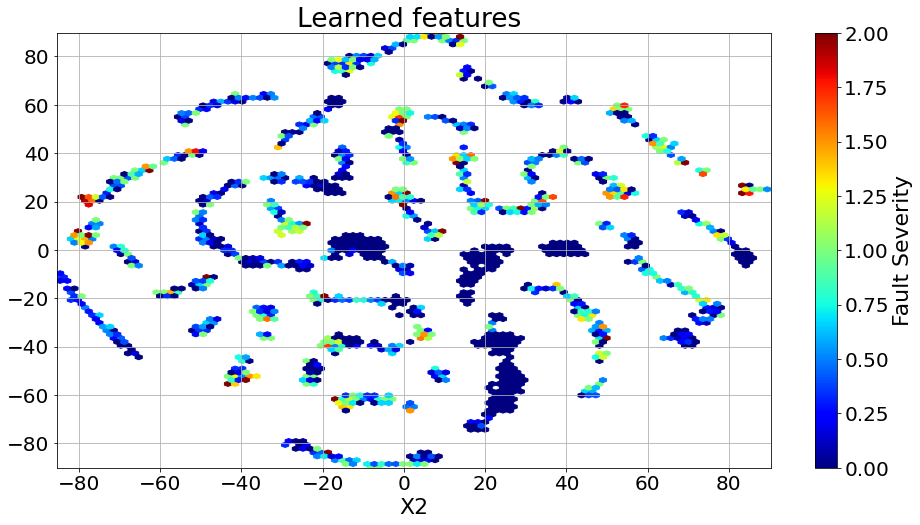

In [75]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

plt.subplot(111)
x0 = projections[:,0]
x1 = projections[:,1]
plt.hexbin(x0,x1,y.values, cmap = plt.cm.jet, bins=None)
# import seaborn as sns
# sns.heatmap(projections)
plt.axis([x0.min(), x0.max(), x1.min(), x1.max()])
plt.grid()
cb = plt.colorbar()
cb.set_label('Fault Severity')
plt.xlabel('X1')
plt.xlabel('X2')
plt.title(f'Learned features ')
plt.show()
# plt.savefig(dir_path+'Embedding')
plt.close()   

## Hyperparameters tuning

In [196]:
# !pip install optuna
import optuna
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss


def objective(trial, df_X, df_y, nfolds):
    param_grid = {
#         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "boosting": trial.suggest_categorical("boosting", ['gbdt']),
        'num_class' : 3,
        'is_unbalance': 'true',
        "n_estimators": trial.suggest_categorical("n_estimators", [1000, 5000, 10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5, step = 0.05),
        "num_leaves": trial.suggest_int("num_leaves", 10, 5000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 12, step = 1),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
#         "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=20),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 1.0, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1,10]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 1.0, step=0.1
        ),
        "verbose" : -1
    }

    cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)

    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(df_X, df_y)):
        print(idx)
        X_train, X_val = df_X[train_idx], df_X[val_idx]
        y_train, y_val = df_y[train_idx], df_y[val_idx]

        model = lgbm.LGBMClassifier(objective="multiclass", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=200,
            callbacks=[
                LightGBMPruningCallback(trial, "multi_logloss")
            ],  # Add a pruning callback in order to speed up the calculations
        )
        preds = model.predict_proba(X_val)
        cv_scores[idx] = log_loss(y_val, preds)

    return np.mean(cv_scores)

In [197]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X.values, y.values, nfolds = 5)
study.optimize(func, n_trials=100)

[I 2022-03-13 15:33:30,696] A new study created in memory with name: LGBM Classifier


0
[1]	valid_0's multi_logloss: 0.746065
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.700038
[3]	valid_0's multi_logloss: 0.67593
[4]	valid_0's multi_logloss: 0.661028
[5]	valid_0's multi_logloss: 0.653951
[6]	valid_0's multi_logloss: 0.649153
[7]	valid_0's multi_logloss: 0.644572
[8]	valid_0's multi_logloss: 0.64252
[9]	valid_0's multi_logloss: 0.642492
[10]	valid_0's multi_logloss: 0.641955
[11]	valid_0's multi_logloss: 0.638782
[12]	valid_0's multi_logloss: 0.635084
[13]	valid_0's multi_logloss: 0.635084
[14]	valid_0's multi_logloss: 0.635084
[15]	valid_0's multi_logloss: 0.635084
[16]	valid_0's multi_logloss: 0.635084
[17]	valid_0's multi_logloss: 0.635084
[18]	valid_0's multi_logloss: 0.635084
[19]	valid_0's multi_logloss: 0.635084
[20]	valid_0's multi_logloss: 0.635084
[21]	valid_0's multi_logloss: 0.635084
[22]	valid_0's multi_logloss: 0.635084
[23]	valid_0's multi_logloss: 0.635084
[24]	valid_0's multi_logloss: 0.635084
[25]	valid_

[I 2022-03-13 15:33:31,624] Trial 0 finished with value: 0.6355020139884251 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.46, 'num_leaves': 4810, 'max_depth': 5, 'lambda_l2': 60, 'min_gain_to_split': 5.397804760083097, 'bagging_fraction': 0.8, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 0 with value: 0.6355020139884251.


[78]	valid_0's multi_logloss: 0.647563
[79]	valid_0's multi_logloss: 0.647563
[80]	valid_0's multi_logloss: 0.647563
[81]	valid_0's multi_logloss: 0.647563
[82]	valid_0's multi_logloss: 0.647563
[83]	valid_0's multi_logloss: 0.647563
[84]	valid_0's multi_logloss: 0.647563
[85]	valid_0's multi_logloss: 0.647563
[86]	valid_0's multi_logloss: 0.647563
[87]	valid_0's multi_logloss: 0.647563
[88]	valid_0's multi_logloss: 0.647563
[89]	valid_0's multi_logloss: 0.647563
[90]	valid_0's multi_logloss: 0.647563
[91]	valid_0's multi_logloss: 0.647563
[92]	valid_0's multi_logloss: 0.647563
[93]	valid_0's multi_logloss: 0.647563
[94]	valid_0's multi_logloss: 0.647563
[95]	valid_0's multi_logloss: 0.647563
[96]	valid_0's multi_logloss: 0.647563
[97]	valid_0's multi_logloss: 0.647563
[98]	valid_0's multi_logloss: 0.647563
[99]	valid_0's multi_logloss: 0.647563
[100]	valid_0's multi_logloss: 0.647563
[101]	valid_0's multi_logloss: 0.647563
[102]	valid_0's multi_logloss: 0.647563
[103]	valid_0's multi_

[I 2022-03-13 15:33:36,535] Trial 1 finished with value: 0.6688348520968024 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.01, 'num_leaves': 3810, 'max_depth': 7, 'lambda_l2': 20, 'min_gain_to_split': 14.727654481010866, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.6355020139884251.


0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=10.65737926712245, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.65737926712245
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's multi_logloss: 0.776786
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.736154
[3]	valid_0's multi_logloss: 0.711562
[4]	valid_0's multi_logloss: 0.694516
[5]	valid_0's multi_logloss: 0.680362
[6]	val

[I 2022-03-13 15:33:40,175] Trial 2 finished with value: 0.6130170145657025 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.21000000000000002, 'num_leaves': 860, 'max_depth': 7, 'lambda_l2': 0, 'min_gain_to_split': 10.65737926712245, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.6130170145657025.


[1382]	valid_0's multi_logloss: 0.623043
[1383]	valid_0's multi_logloss: 0.623043
[1384]	valid_0's multi_logloss: 0.623043
[1385]	valid_0's multi_logloss: 0.623043
[1386]	valid_0's multi_logloss: 0.623043
[1387]	valid_0's multi_logloss: 0.623043
[1388]	valid_0's multi_logloss: 0.623043
[1389]	valid_0's multi_logloss: 0.623043
[1390]	valid_0's multi_logloss: 0.623043
[1391]	valid_0's multi_logloss: 0.623043
[1392]	valid_0's multi_logloss: 0.623043
[1393]	valid_0's multi_logloss: 0.623043
[1394]	valid_0's multi_logloss: 0.623043
[1395]	valid_0's multi_logloss: 0.623043
[1396]	valid_0's multi_logloss: 0.623043
[1397]	valid_0's multi_logloss: 0.623043
[1398]	valid_0's multi_logloss: 0.623043
[1399]	valid_0's multi_logloss: 0.623043
[1400]	valid_0's multi_logloss: 0.623043
[1401]	valid_0's multi_logloss: 0.623043
[1402]	valid_0's multi_logloss: 0.623043
[1403]	valid_0's multi_logloss: 0.623043
[1404]	valid_0's multi_logloss: 0.623043
[1405]	valid_0's multi_logloss: 0.623043
[1406]	valid_0's

[I 2022-03-13 15:33:42,486] Trial 3 finished with value: 0.6376320431310576 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.060000000000000005, 'num_leaves': 1260, 'max_depth': 11, 'lambda_l2': 100, 'min_gain_to_split': 4.34125314624438, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.4}. Best is trial 2 with value: 0.6130170145657025.


0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=7.275070220143029, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.275070220143029
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's multi_logloss: 0.796022
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.757061
[3]	valid_0's multi_logloss: 0.73241
[4]	valid_0's multi_logloss: 0.711748
[5]	valid_0's multi_logloss: 0.695817
[6]	valid_0's multi_logloss: 0.68782

[I 2022-03-13 15:33:53,160] Trial 4 finished with value: 0.6206727133664425 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.21000000000000002, 'num_leaves': 3060, 'max_depth': 12, 'lambda_l2': 20, 'min_gain_to_split': 7.275070220143029, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.6130170145657025.


[1433]	valid_0's multi_logloss: 0.626669
[1434]	valid_0's multi_logloss: 0.626669
[1435]	valid_0's multi_logloss: 0.626669
[1436]	valid_0's multi_logloss: 0.626669
[1437]	valid_0's multi_logloss: 0.626669
[1438]	valid_0's multi_logloss: 0.626669
[1439]	valid_0's multi_logloss: 0.626669
[1440]	valid_0's multi_logloss: 0.626669
[1441]	valid_0's multi_logloss: 0.626669
[1442]	valid_0's multi_logloss: 0.626669
[1443]	valid_0's multi_logloss: 0.626669
[1444]	valid_0's multi_logloss: 0.626669
[1445]	valid_0's multi_logloss: 0.626669
[1446]	valid_0's multi_logloss: 0.626669
[1447]	valid_0's multi_logloss: 0.626669
[1448]	valid_0's multi_logloss: 0.626669
[1449]	valid_0's multi_logloss: 0.626669
[1450]	valid_0's multi_logloss: 0.626669
[1451]	valid_0's multi_logloss: 0.626669
[1452]	valid_0's multi_logloss: 0.626669
[1453]	valid_0's multi_logloss: 0.626669
[1454]	valid_0's multi_logloss: 0.626669
[1455]	valid_0's multi_logloss: 0.626669
[1456]	valid_0's multi_logloss: 0.626669
[1457]	valid_0's

[I 2022-03-13 15:33:53,280] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:33:53,417] Trial 6 pruned. Trial was pruned at iteration 16.


0
[1]	valid_0's multi_logloss: 0.778172
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.738922
[3]	valid_0's multi_logloss: 0.710532
[4]	valid_0's multi_logloss: 0.69238
[5]	valid_0's multi_logloss: 0.681746
[6]	valid_0's multi_logloss: 0.67633
[7]	valid_0's multi_logloss: 0.670663
[8]	valid_0's multi_logloss: 0.665481
[9]	valid_0's multi_logloss: 0.66312
[10]	valid_0's multi_logloss: 0.661127
[11]	valid_0's multi_logloss: 0.660361
[12]	valid_0's multi_logloss: 0.659212
[13]	valid_0's multi_logloss: 0.657342
[14]	valid_0's multi_logloss: 0.657342
[15]	valid_0's multi_logloss: 0.657342
[16]	valid_0's multi_logloss: 0.657342
0


[I 2022-03-13 15:33:53,553] Trial 7 pruned. Trial was pruned at iteration 7.
[I 2022-03-13 15:33:53,692] Trial 8 pruned. Trial was pruned at iteration 0.


[1]	valid_0's multi_logloss: 0.75308
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.715127
[3]	valid_0's multi_logloss: 0.696983
[4]	valid_0's multi_logloss: 0.686147
[5]	valid_0's multi_logloss: 0.683048
[6]	valid_0's multi_logloss: 0.676021
[7]	valid_0's multi_logloss: 0.676021
0
0


[I 2022-03-13 15:33:53,811] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:33:53,941] Trial 10 pruned. Trial was pruned at iteration 4.


0
[1]	valid_0's multi_logloss: 0.780371
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.746538
[3]	valid_0's multi_logloss: 0.719092
[4]	valid_0's multi_logloss: 0.70952
0
[1]	valid_0's multi_logloss: 0.788005
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.745299
[3]	valid_0's multi_logloss: 0.719495
[4]	valid_0's multi_logloss: 0.702295
[5]	valid_0's multi_logloss: 0.690781
[6]	valid_0's multi_logloss: 0.681698
[7]	valid_0's multi_logloss: 0.674616
[8]	valid_0's multi_logloss: 0.667353
[9]	valid_0's multi_logloss: 0.66454
[10]	valid_0's multi_logloss: 0.662744
[11]	valid_0's multi_logloss: 0.661113
[12]	valid_0's multi_logloss: 0.656723
[13]	valid_0's multi_logloss: 0.65535
[14]	valid_0's multi_logloss: 0.654895
[15]	valid_0's multi_logloss: 0.653611
[16]	valid_0's multi_logloss: 0.652423
[17]	valid_0's multi_logloss: 0.651458
[18]	valid_0's multi_logloss: 0.65127
[19]	valid_0's multi_logloss: 0

[I 2022-03-13 15:34:06,411] Trial 11 finished with value: 0.6048515429160298 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.21000000000000002, 'num_leaves': 1310, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 8.63925476438466, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 11 with value: 0.6048515429160298.


[1326]	valid_0's multi_logloss: 0.617078
[1327]	valid_0's multi_logloss: 0.617078
[1328]	valid_0's multi_logloss: 0.617078
[1329]	valid_0's multi_logloss: 0.617078
[1330]	valid_0's multi_logloss: 0.617078
[1331]	valid_0's multi_logloss: 0.617078
[1332]	valid_0's multi_logloss: 0.617078
[1333]	valid_0's multi_logloss: 0.617078
[1334]	valid_0's multi_logloss: 0.617078
[1335]	valid_0's multi_logloss: 0.617078
[1336]	valid_0's multi_logloss: 0.617078
[1337]	valid_0's multi_logloss: 0.617078
[1338]	valid_0's multi_logloss: 0.617078
[1339]	valid_0's multi_logloss: 0.617078
[1340]	valid_0's multi_logloss: 0.617078
[1341]	valid_0's multi_logloss: 0.617078
[1342]	valid_0's multi_logloss: 0.617078
[1343]	valid_0's multi_logloss: 0.617078
[1344]	valid_0's multi_logloss: 0.617078
[1345]	valid_0's multi_logloss: 0.617078
[1346]	valid_0's multi_logloss: 0.617078
[1347]	valid_0's multi_logloss: 0.617078
[1348]	valid_0's multi_logloss: 0.617078
[1349]	valid_0's multi_logloss: 0.617078
[1350]	valid_0's

[I 2022-03-13 15:34:06,527] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:06,639] Trial 13 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:34:06,769] Trial 14 pruned. Trial was pruned at iteration 12.
[I 2022-03-13 15:34:06,873] Trial 15 pruned. Trial was pruned at iteration 0.


[1]	valid_0's multi_logloss: 0.771414
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.729925
[3]	valid_0's multi_logloss: 0.70888
[4]	valid_0's multi_logloss: 0.692544
[5]	valid_0's multi_logloss: 0.682299
[6]	valid_0's multi_logloss: 0.674931
[7]	valid_0's multi_logloss: 0.672091
[8]	valid_0's multi_logloss: 0.667915
[9]	valid_0's multi_logloss: 0.665476
[10]	valid_0's multi_logloss: 0.664186
[11]	valid_0's multi_logloss: 0.66269
[12]	valid_0's multi_logloss: 0.660718
0
0
[1]	valid_0's multi_logloss: 0.737715
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.699123
[3]	valid_0's multi_logloss: 0.677611
[4]	valid_0's multi_logloss: 0.667686
[5]	valid_0's multi_logloss: 0.657564
[6]	valid_0's multi_logloss: 0.652479
[7]	valid_0's multi_logloss: 0.650468
[8]	valid_0's multi_logloss: 0.645442
[9]	valid_0's multi_logloss: 0.642497
[10]	valid_0's multi_logloss: 0.642863
[11]	valid_0's multi_logloss: 0.64

[I 2022-03-13 15:34:09,723] Trial 16 finished with value: 0.6132774099203833 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1910, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 10.679011628343686, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9000000000000001}. Best is trial 11 with value: 0.6048515429160298.


[569]	valid_0's multi_logloss: 0.624206
[570]	valid_0's multi_logloss: 0.624206
[571]	valid_0's multi_logloss: 0.624206
[572]	valid_0's multi_logloss: 0.624206
[573]	valid_0's multi_logloss: 0.624206
[574]	valid_0's multi_logloss: 0.624206
[575]	valid_0's multi_logloss: 0.624206
[576]	valid_0's multi_logloss: 0.624707
[577]	valid_0's multi_logloss: 0.624707
[578]	valid_0's multi_logloss: 0.624707
[579]	valid_0's multi_logloss: 0.624707
[580]	valid_0's multi_logloss: 0.624707
[581]	valid_0's multi_logloss: 0.624707
[582]	valid_0's multi_logloss: 0.624707
[583]	valid_0's multi_logloss: 0.624707
[584]	valid_0's multi_logloss: 0.624826
[585]	valid_0's multi_logloss: 0.624826
[586]	valid_0's multi_logloss: 0.624826
[587]	valid_0's multi_logloss: 0.624826
[588]	valid_0's multi_logloss: 0.624826
[589]	valid_0's multi_logloss: 0.624826
[590]	valid_0's multi_logloss: 0.624826
[591]	valid_0's multi_logloss: 0.624826
[592]	valid_0's multi_logloss: 0.624826
[593]	valid_0's multi_logloss: 0.624826


[I 2022-03-13 15:34:09,837] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:09,954] Trial 18 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:34:10,069] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:10,192] Trial 20 pruned. Trial was pruned at iteration 0.


0
0
[1]	valid_0's multi_logloss: 0.734672
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.696424
[3]	valid_0's multi_logloss: 0.678916
[4]	valid_0's multi_logloss: 0.668726
[5]	valid_0's multi_logloss: 0.657964
[6]	valid_0's multi_logloss: 0.651128
[7]	valid_0's multi_logloss: 0.649104
[8]	valid_0's multi_logloss: 0.646498
[9]	valid_0's multi_logloss: 0.644208
[10]	valid_0's multi_logloss: 0.644507
[11]	valid_0's multi_logloss: 0.643194
[12]	valid_0's multi_logloss: 0.641352
[13]	valid_0's multi_logloss: 0.637951
[14]	valid_0's multi_logloss: 0.637951
[15]	valid_0's multi_logloss: 0.63764
[16]	valid_0's multi_logloss: 0.63764
[17]	valid_0's multi_logloss: 0.637114
[18]	valid_0's multi_logloss: 0.637459
[19]	valid_0's multi_logloss: 0.636961
[20]	valid_0's multi_logloss: 0.636193
[21]	valid_0's multi_logloss: 0.636193
[22]	valid_0's multi_logloss: 0.636193
[23]	valid_0's multi_logloss: 0.63628
[24]	valid_0's multi_logloss: 0.636793
[25]	valid

[I 2022-03-13 15:34:13,765] Trial 21 finished with value: 0.608039538673255 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1810, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 10.039363837094829, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9000000000000001}. Best is trial 11 with value: 0.6048515429160298.


[659]	valid_0's multi_logloss: 0.619787
[660]	valid_0's multi_logloss: 0.619787
[661]	valid_0's multi_logloss: 0.619787
[662]	valid_0's multi_logloss: 0.619787
[663]	valid_0's multi_logloss: 0.619787
[664]	valid_0's multi_logloss: 0.619787
[665]	valid_0's multi_logloss: 0.619787
[666]	valid_0's multi_logloss: 0.619787
[667]	valid_0's multi_logloss: 0.619787
[668]	valid_0's multi_logloss: 0.619787
[669]	valid_0's multi_logloss: 0.619787
[670]	valid_0's multi_logloss: 0.619787
[671]	valid_0's multi_logloss: 0.619441
[672]	valid_0's multi_logloss: 0.619441
[673]	valid_0's multi_logloss: 0.619441
[674]	valid_0's multi_logloss: 0.619441
[675]	valid_0's multi_logloss: 0.619441
[676]	valid_0's multi_logloss: 0.619441
[677]	valid_0's multi_logloss: 0.619441
[678]	valid_0's multi_logloss: 0.619441
[679]	valid_0's multi_logloss: 0.619441
[680]	valid_0's multi_logloss: 0.619441
[681]	valid_0's multi_logloss: 0.619441
[682]	valid_0's multi_logloss: 0.619441
[683]	valid_0's multi_logloss: 0.619441


[I 2022-03-13 15:34:17,920] Trial 22 finished with value: 0.6003129017081907 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1610, 'max_depth': 5, 'lambda_l2': 0, 'min_gain_to_split': 8.199220987142972, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9000000000000001}. Best is trial 22 with value: 0.6003129017081907.


[282]	valid_0's multi_logloss: 0.618124
[283]	valid_0's multi_logloss: 0.618124
[284]	valid_0's multi_logloss: 0.618124
[285]	valid_0's multi_logloss: 0.618124
[286]	valid_0's multi_logloss: 0.618124
[287]	valid_0's multi_logloss: 0.618124
[288]	valid_0's multi_logloss: 0.618537
[289]	valid_0's multi_logloss: 0.618537
[290]	valid_0's multi_logloss: 0.618537
[291]	valid_0's multi_logloss: 0.618537
[292]	valid_0's multi_logloss: 0.617312
[293]	valid_0's multi_logloss: 0.617312
[294]	valid_0's multi_logloss: 0.617312
[295]	valid_0's multi_logloss: 0.617312
[296]	valid_0's multi_logloss: 0.617312
[297]	valid_0's multi_logloss: 0.617312
[298]	valid_0's multi_logloss: 0.617312
[299]	valid_0's multi_logloss: 0.617312
[300]	valid_0's multi_logloss: 0.617312
[301]	valid_0's multi_logloss: 0.617312
[302]	valid_0's multi_logloss: 0.617312
[303]	valid_0's multi_logloss: 0.617312
[304]	valid_0's multi_logloss: 0.617312
[305]	valid_0's multi_logloss: 0.617312
[306]	valid_0's multi_logloss: 0.617312


[I 2022-03-13 15:34:18,060] Trial 23 pruned. Trial was pruned at iteration 56.


[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=8.377293049515734, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.377293049515734
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's multi_logloss: 0.74813
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.705872
[3]	valid_0's multi_logloss: 0.681235
[4]	valid_0's multi_logloss: 0.669579
[5]	valid_0's multi_logloss: 0.662435
[6]	valid_0's multi_logloss: 0.656317


[I 2022-03-13 15:34:21,809] Trial 24 finished with value: 0.5919714203352233 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1110, 'max_depth': 4, 'lambda_l2': 0, 'min_gain_to_split': 6.21751401018375, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9000000000000001}. Best is trial 24 with value: 0.5919714203352233.


[530]	valid_0's multi_logloss: 0.603667
[531]	valid_0's multi_logloss: 0.603667
[532]	valid_0's multi_logloss: 0.603667
[533]	valid_0's multi_logloss: 0.603667
[534]	valid_0's multi_logloss: 0.603409
[535]	valid_0's multi_logloss: 0.603409
[536]	valid_0's multi_logloss: 0.603409
[537]	valid_0's multi_logloss: 0.603409
[538]	valid_0's multi_logloss: 0.603409
[539]	valid_0's multi_logloss: 0.604115
[540]	valid_0's multi_logloss: 0.604115
[541]	valid_0's multi_logloss: 0.604115
[542]	valid_0's multi_logloss: 0.604115
[543]	valid_0's multi_logloss: 0.604115
[544]	valid_0's multi_logloss: 0.604115
[545]	valid_0's multi_logloss: 0.604115
[546]	valid_0's multi_logloss: 0.604115
[547]	valid_0's multi_logloss: 0.604115
[548]	valid_0's multi_logloss: 0.604115
[549]	valid_0's multi_logloss: 0.604115
[550]	valid_0's multi_logloss: 0.604115
[551]	valid_0's multi_logloss: 0.604115
[552]	valid_0's multi_logloss: 0.604115
[553]	valid_0's multi_logloss: 0.604115
[554]	valid_0's multi_logloss: 0.604115


[I 2022-03-13 15:34:22,115] Trial 25 pruned. Trial was pruned at iteration 372.


[315]	valid_0's multi_logloss: 0.621276
[316]	valid_0's multi_logloss: 0.621276
[317]	valid_0's multi_logloss: 0.621276
[318]	valid_0's multi_logloss: 0.621276
[319]	valid_0's multi_logloss: 0.621276
[320]	valid_0's multi_logloss: 0.621276
[321]	valid_0's multi_logloss: 0.621276
[322]	valid_0's multi_logloss: 0.621276
[323]	valid_0's multi_logloss: 0.621276
[324]	valid_0's multi_logloss: 0.621276
[325]	valid_0's multi_logloss: 0.621276
[326]	valid_0's multi_logloss: 0.621276
[327]	valid_0's multi_logloss: 0.621276
[328]	valid_0's multi_logloss: 0.621276
[329]	valid_0's multi_logloss: 0.621276
[330]	valid_0's multi_logloss: 0.621276
[331]	valid_0's multi_logloss: 0.621276
[332]	valid_0's multi_logloss: 0.621276
[333]	valid_0's multi_logloss: 0.621276
[334]	valid_0's multi_logloss: 0.621276
[335]	valid_0's multi_logloss: 0.621276
[336]	valid_0's multi_logloss: 0.621276
[337]	valid_0's multi_logloss: 0.621276
[338]	valid_0's multi_logloss: 0.621043
[339]	valid_0's multi_logloss: 0.621043


[I 2022-03-13 15:34:25,234] Trial 26 finished with value: 0.5846802786659699 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.36000000000000004, 'num_leaves': 460, 'max_depth': 4, 'lambda_l2': 0, 'min_gain_to_split': 4.116788811188805, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9000000000000001}. Best is trial 26 with value: 0.5846802786659699.


[358]	valid_0's multi_logloss: 0.597681
[359]	valid_0's multi_logloss: 0.597681
[360]	valid_0's multi_logloss: 0.597681
[361]	valid_0's multi_logloss: 0.597681
[362]	valid_0's multi_logloss: 0.597681
[363]	valid_0's multi_logloss: 0.597681
[364]	valid_0's multi_logloss: 0.597681
[365]	valid_0's multi_logloss: 0.597681
[366]	valid_0's multi_logloss: 0.597681
[367]	valid_0's multi_logloss: 0.597681
[368]	valid_0's multi_logloss: 0.597681
[369]	valid_0's multi_logloss: 0.597681
[370]	valid_0's multi_logloss: 0.597681
[371]	valid_0's multi_logloss: 0.597681
[372]	valid_0's multi_logloss: 0.597681
[373]	valid_0's multi_logloss: 0.597681
[374]	valid_0's multi_logloss: 0.597681
[375]	valid_0's multi_logloss: 0.597681
[376]	valid_0's multi_logloss: 0.597681
[377]	valid_0's multi_logloss: 0.597681
[378]	valid_0's multi_logloss: 0.597681
[379]	valid_0's multi_logloss: 0.597681
[380]	valid_0's multi_logloss: 0.597681
[381]	valid_0's multi_logloss: 0.597873
[382]	valid_0's multi_logloss: 0.597873


[I 2022-03-13 15:34:25,347] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:25,461] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:25,569] Trial 29 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:34:25,706] Trial 30 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:34:25,850] Trial 31 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:25,983] Trial 32 pruned. Trial was pruned at iteration 0.


0
0
[1]	valid_0's multi_logloss: 0.725691
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.677174
[3]	valid_0's multi_logloss: 0.651094
[4]	valid_0's multi_logloss: 0.632755
[5]	valid_0's multi_logloss: 0.621974
[6]	valid_0's multi_logloss: 0.616072
[7]	valid_0's multi_logloss: 0.610957
[8]	valid_0's multi_logloss: 0.610746
[9]	valid_0's multi_logloss: 0.606248
[10]	valid_0's multi_logloss: 0.603272
[11]	valid_0's multi_logloss: 0.603672
[12]	valid_0's multi_logloss: 0.601701
[13]	valid_0's multi_logloss: 0.59772
[14]	valid_0's multi_logloss: 0.59605
[15]	valid_0's multi_logloss: 0.59496
[16]	valid_0's multi_logloss: 0.59586
[17]	valid_0's multi_logloss: 0.596213
[18]	valid_0's multi_logloss: 0.594059
[19]	valid_0's multi_logloss: 0.592839
[20]	valid_0's multi_logloss: 0.590462
[21]	valid_0's multi_logloss: 0.590694
[22]	valid_0's multi_logloss: 0.59055
[23]	valid_0's multi_logloss: 0.589932
[24]	valid_0's multi_logloss: 0.590723
[25]	valid_0

[I 2022-03-13 15:34:28,300] Trial 33 finished with value: 0.567900159800732 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1010, 'max_depth': 4, 'lambda_l2': 0, 'min_gain_to_split': 2.2109726210841334, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9000000000000001}. Best is trial 33 with value: 0.567900159800732.


[3]	valid_0's multi_logloss: 0.657907
[4]	valid_0's multi_logloss: 0.644816
[5]	valid_0's multi_logloss: 0.629906
[6]	valid_0's multi_logloss: 0.616698
[7]	valid_0's multi_logloss: 0.613656
[8]	valid_0's multi_logloss: 0.609352
[9]	valid_0's multi_logloss: 0.610184
[10]	valid_0's multi_logloss: 0.605555
[11]	valid_0's multi_logloss: 0.604417
[12]	valid_0's multi_logloss: 0.602955
[13]	valid_0's multi_logloss: 0.600541
[14]	valid_0's multi_logloss: 0.598242
[15]	valid_0's multi_logloss: 0.597548
[16]	valid_0's multi_logloss: 0.595695
[17]	valid_0's multi_logloss: 0.593992
[18]	valid_0's multi_logloss: 0.59144
[19]	valid_0's multi_logloss: 0.587588
[20]	valid_0's multi_logloss: 0.588429
[21]	valid_0's multi_logloss: 0.588894
[22]	valid_0's multi_logloss: 0.589154
[23]	valid_0's multi_logloss: 0.588089
[24]	valid_0's multi_logloss: 0.589059
[25]	valid_0's multi_logloss: 0.589394
[26]	valid_0's multi_logloss: 0.589371
[27]	valid_0's multi_logloss: 0.589467
[28]	valid_0's multi_logloss: 0.5

[I 2022-03-13 15:34:29,400] Trial 34 finished with value: 0.594984946170172 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1010, 'max_depth': 4, 'lambda_l2': 20, 'min_gain_to_split': 1.8716567088431022, 'bagging_fraction': 0.8, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 33 with value: 0.567900159800732.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.8716567088431022, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.8716567088431022
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.73332
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.688378
[3]	valid_0's multi_logloss: 0.665995
[4]	valid_0's multi_logloss: 0.651775
[5]	valid_0's multi_logloss: 0.639159
[6]	valid_0's multi_logloss: 0.633

[I 2022-03-13 15:34:30,499] Trial 35 finished with value: 0.5942089513432398 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.46, 'num_leaves': 1010, 'max_depth': 4, 'lambda_l2': 20, 'min_gain_to_split': 1.8183736566177253, 'bagging_fraction': 0.8, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 33 with value: 0.567900159800732.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.8183736566177253, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.8183736566177253
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.723404
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.682342
[3]	valid_0's multi_logloss: 0.659153
[4]	valid_0's multi_logloss: 0.646163
[5]	valid_0's multi_logloss: 0.639185
[6]	valid_0's multi_logloss: 0.62

[I 2022-03-13 15:34:32,015] Trial 36 finished with value: 0.5533860461595632 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.46, 'num_leaves': 10, 'max_depth': 3, 'lambda_l2': 20, 'min_gain_to_split': 0.1330709354672548, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 36 with value: 0.5533860461595632.


[23]	valid_0's multi_logloss: 0.594373
[24]	valid_0's multi_logloss: 0.593646
[25]	valid_0's multi_logloss: 0.593373
[26]	valid_0's multi_logloss: 0.591876
[27]	valid_0's multi_logloss: 0.5914
[28]	valid_0's multi_logloss: 0.589576
[29]	valid_0's multi_logloss: 0.589247
[30]	valid_0's multi_logloss: 0.588807
[31]	valid_0's multi_logloss: 0.588086
[32]	valid_0's multi_logloss: 0.587714
[33]	valid_0's multi_logloss: 0.587386
[34]	valid_0's multi_logloss: 0.586378
[35]	valid_0's multi_logloss: 0.585614
[36]	valid_0's multi_logloss: 0.584552
[37]	valid_0's multi_logloss: 0.584412
[38]	valid_0's multi_logloss: 0.584447
[39]	valid_0's multi_logloss: 0.583606
[40]	valid_0's multi_logloss: 0.58329
[41]	valid_0's multi_logloss: 0.583071
[42]	valid_0's multi_logloss: 0.582387
[43]	valid_0's multi_logloss: 0.581798
[44]	valid_0's multi_logloss: 0.581873
[45]	valid_0's multi_logloss: 0.581454
[46]	valid_0's multi_logloss: 0.581847
[47]	valid_0's multi_logloss: 0.58177
[48]	valid_0's multi_logloss:

[I 2022-03-13 15:34:32,135] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:32,251] Trial 38 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=0.14490169596974153, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.14490169596974153
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
0
[1]	valid_0's multi_logloss: 0.724876
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.675675
[3]	valid_0's multi_logloss: 0.649946
[4]	valid_0's multi_logloss: 0.63525
[5]	valid_0's multi_logloss: 0.622439
[6]	valid_0's multi_logloss: 0

[I 2022-03-13 15:34:33,392] Trial 39 finished with value: 0.5829393056870327 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.46, 'num_leaves': 10, 'max_depth': 5, 'lambda_l2': 20, 'min_gain_to_split': 1.178695255200294, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 36 with value: 0.5533860461595632.


[1]	valid_0's multi_logloss: 0.718741
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.67474
[3]	valid_0's multi_logloss: 0.646523
[4]	valid_0's multi_logloss: 0.633552
[5]	valid_0's multi_logloss: 0.622599
[6]	valid_0's multi_logloss: 0.613151
[7]	valid_0's multi_logloss: 0.607287
[8]	valid_0's multi_logloss: 0.605689
[9]	valid_0's multi_logloss: 0.603354
[10]	valid_0's multi_logloss: 0.59995
[11]	valid_0's multi_logloss: 0.598161
[12]	valid_0's multi_logloss: 0.595255
[13]	valid_0's multi_logloss: 0.594543
[14]	valid_0's multi_logloss: 0.594071
[15]	valid_0's multi_logloss: 0.592826
[16]	valid_0's multi_logloss: 0.592954
[17]	valid_0's multi_logloss: 0.592794
[18]	valid_0's multi_logloss: 0.592748
[19]	valid_0's multi_logloss: 0.592584
[20]	valid_0's multi_logloss: 0.592584
[21]	valid_0's multi_logloss: 0.592584
[22]	valid_0's multi_logloss: 0.592584
[23]	valid_0's multi_logloss: 0.592584
[24]	valid_0's multi_logloss: 0.592584
[25]	valid_0'

[I 2022-03-13 15:34:33,511] Trial 40 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=1.047581101928091, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.047581101928091
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
[1]	valid_0's multi_logloss: 0.734901
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.683203
[3]	valid_0's multi_logloss: 0.655367
[4]	valid_0's multi_logloss: 0.635044
[5]	valid_0's multi_logloss: 0.622853
[6]	valid_0's multi_logloss: 0.61

[I 2022-03-13 15:34:34,799] Trial 41 finished with value: 0.578489539091845 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.41000000000000003, 'num_leaves': 460, 'max_depth': 5, 'lambda_l2': 20, 'min_gain_to_split': 1.0324762928584086, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 36 with value: 0.5533860461595632.


0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=1.0367144124222776, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.0367144124222776
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.730838
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.677658
[3]	valid_0's multi_logloss: 0.649349
[4]	valid_0's multi_logloss: 0.633216
[5]	valid_0's multi_logloss: 0.622408
[6]	valid_0's multi_logloss: 0.

[I 2022-03-13 15:34:36,020] Trial 42 finished with value: 0.5767261125955897 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.41000000000000003, 'num_leaves': 560, 'max_depth': 5, 'lambda_l2': 20, 'min_gain_to_split': 1.0367144124222776, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 36 with value: 0.5533860461595632.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.726176
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.676156
[3]	valid_0's multi_logloss: 0.646858
[4]	valid_0's multi_logloss: 0.629711
[5]	valid_0's multi_logloss: 0.622285
[6]	valid_0's multi_logloss: 0.611414
[7]	valid_0's multi_logloss: 0.605399
[8]	valid_0's multi_logloss: 0.598075
[9]	valid_0's multi_logloss: 0.595228
[10]	valid_0's multi_logloss: 0.594043
[11]	valid_0's multi_logloss: 0.592857
[12]	valid_0's multi_logloss: 0.592307
[13]	valid_0's multi_logloss: 0.589688
[14]	valid_0's multi_logloss: 0.588924
[15]	valid_0's multi_logloss: 0.588539
[16]	valid_0's multi_logloss: 0.587403
[17]	valid_0's multi_logloss: 0.586398
[18]	valid_0's multi_logloss: 0.586036
[19]	valid_0's multi_logloss: 0.585658
[20]	valid_0's multi_logloss: 0.585696
[21]	valid_0's multi_logloss: 0.585509
[22]	valid_0's mul

[I 2022-03-13 15:34:36,144] Trial 43 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=0.8400523467678113, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8400523467678113
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
[1]	valid_0's multi_logloss: 0.716632
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.670824
[3]	valid_0's multi_logloss: 0.644435
[4]	valid_0's multi_logloss: 0.630921
[5]	valid_0's multi_logloss: 0.62072
[6]	valid_0's multi_logloss: 0.6

[I 2022-03-13 15:34:37,237] Trial 44 finished with value: 0.597038516375979 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.46, 'num_leaves': 660, 'max_depth': 6, 'lambda_l2': 20, 'min_gain_to_split': 2.6824204953362627, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 36 with value: 0.5533860461595632.


[1]	valid_0's multi_logloss: 0.715474
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.666919
[3]	valid_0's multi_logloss: 0.641604
[4]	valid_0's multi_logloss: 0.630026
[5]	valid_0's multi_logloss: 0.620222
[6]	valid_0's multi_logloss: 0.613445
[7]	valid_0's multi_logloss: 0.611128
[8]	valid_0's multi_logloss: 0.610485
[9]	valid_0's multi_logloss: 0.608361
[10]	valid_0's multi_logloss: 0.607428
[11]	valid_0's multi_logloss: 0.606775
[12]	valid_0's multi_logloss: 0.60663
[13]	valid_0's multi_logloss: 0.606672
[14]	valid_0's multi_logloss: 0.606672
[15]	valid_0's multi_logloss: 0.606672
[16]	valid_0's multi_logloss: 0.606672
[17]	valid_0's multi_logloss: 0.606672
[18]	valid_0's multi_logloss: 0.606672
[19]	valid_0's multi_logloss: 0.606672
[20]	valid_0's multi_logloss: 0.606672
[21]	valid_0's multi_logloss: 0.606672
[22]	valid_0's multi_logloss: 0.606672
[23]	valid_0's multi_logloss: 0.606672
[24]	valid_0's multi_logloss: 0.606672
[25]	valid_0

[I 2022-03-13 15:34:38,430] Trial 45 finished with value: 0.5753697188793623 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.41000000000000003, 'num_leaves': 4510, 'max_depth': 7, 'lambda_l2': 20, 'min_gain_to_split': 1.063397078872622, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 36 with value: 0.5533860461595632.


[1]	valid_0's multi_logloss: 0.724998
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.669495
[3]	valid_0's multi_logloss: 0.643126
[4]	valid_0's multi_logloss: 0.626504
[5]	valid_0's multi_logloss: 0.616223
[6]	valid_0's multi_logloss: 0.608432
[7]	valid_0's multi_logloss: 0.602025
[8]	valid_0's multi_logloss: 0.598424
[9]	valid_0's multi_logloss: 0.595875
[10]	valid_0's multi_logloss: 0.59382
[11]	valid_0's multi_logloss: 0.592177
[12]	valid_0's multi_logloss: 0.591747
[13]	valid_0's multi_logloss: 0.589827
[14]	valid_0's multi_logloss: 0.590075
[15]	valid_0's multi_logloss: 0.589806
[16]	valid_0's multi_logloss: 0.589139
[17]	valid_0's multi_logloss: 0.588849
[18]	valid_0's multi_logloss: 0.588316
[19]	valid_0's multi_logloss: 0.588278
[20]	valid_0's multi_logloss: 0.588278
[21]	valid_0's multi_logloss: 0.588278
[22]	valid_0's multi_logloss: 0.588278
[23]	valid_0's multi_logloss: 0.588278
[24]	valid_0's multi_logloss: 0.588278
[25]	valid_0

[I 2022-03-13 15:34:38,686] Trial 46 pruned. Trial was pruned at iteration 213.


[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=2.4692533601408213, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4692533601408213
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.729181
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.676834
[3]	valid_0's multi_logloss: 0.64874
[4]	valid_0's multi_logloss: 0.63119
[5]	valid_0's multi_logloss: 0.62245
[6]	va

[I 2022-03-13 15:34:38,800] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:38,913] Trial 48 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:34:39,025] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:39,141] Trial 50 pruned. Trial was pruned at iteration 0.


0
0
[1]	valid_0's multi_logloss: 0.720127
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.667693
[3]	valid_0's multi_logloss: 0.645047
[4]	valid_0's multi_logloss: 0.627204
[5]	valid_0's multi_logloss: 0.617138
[6]	valid_0's multi_logloss: 0.607693
[7]	valid_0's multi_logloss: 0.604306
[8]	valid_0's multi_logloss: 0.600588
[9]	valid_0's multi_logloss: 0.598542
[10]	valid_0's multi_logloss: 0.5963
[11]	valid_0's multi_logloss: 0.592727
[12]	valid_0's multi_logloss: 0.592018
[13]	valid_0's multi_logloss: 0.591618
[14]	valid_0's multi_logloss: 0.591386
[15]	valid_0's multi_logloss: 0.590719
[16]	valid_0's multi_logloss: 0.590421
[17]	valid_0's multi_logloss: 0.590001
[18]	valid_0's multi_logloss: 0.589928
[19]	valid_0's multi_logloss: 0.589928
[20]	valid_0's multi_logloss: 0.589928
[21]	valid_0's multi_logloss: 0.589928
[22]	valid_0's multi_logloss: 0.589928
[23]	valid_0's multi_logloss: 0.589928
[24]	valid_0's multi_logloss: 0.589928
[25]	vali

[I 2022-03-13 15:34:40,416] Trial 51 finished with value: 0.5826835646306502 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.46, 'num_leaves': 160, 'max_depth': 5, 'lambda_l2': 20, 'min_gain_to_split': 1.3276426537009656, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 36 with value: 0.5533860461595632.


[29]	valid_0's multi_logloss: 0.591764
[30]	valid_0's multi_logloss: 0.591764
[31]	valid_0's multi_logloss: 0.591764
[32]	valid_0's multi_logloss: 0.591764
[33]	valid_0's multi_logloss: 0.591764
[34]	valid_0's multi_logloss: 0.591764
[35]	valid_0's multi_logloss: 0.591764
[36]	valid_0's multi_logloss: 0.591764
[37]	valid_0's multi_logloss: 0.591764
[38]	valid_0's multi_logloss: 0.591764
[39]	valid_0's multi_logloss: 0.591764
[40]	valid_0's multi_logloss: 0.591764
[41]	valid_0's multi_logloss: 0.591764
[42]	valid_0's multi_logloss: 0.591764
[43]	valid_0's multi_logloss: 0.591764
[44]	valid_0's multi_logloss: 0.591764
[45]	valid_0's multi_logloss: 0.591764
[46]	valid_0's multi_logloss: 0.591764
[47]	valid_0's multi_logloss: 0.591764
[48]	valid_0's multi_logloss: 0.591764
[49]	valid_0's multi_logloss: 0.591764
[50]	valid_0's multi_logloss: 0.591764
[51]	valid_0's multi_logloss: 0.591764
[52]	valid_0's multi_logloss: 0.591764
[53]	valid_0's multi_logloss: 0.591764
[54]	valid_0's multi_logl

[I 2022-03-13 15:34:40,536] Trial 52 pruned. Trial was pruned at iteration 11.


bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=3.551970976190364, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.551970976190364
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.719114
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.671269
[3]	valid_0's multi_logloss: 0.645514
[4]	valid_0's multi_logloss: 0.631571
[5]	valid_0's multi_logloss: 0.625985
[6]	valid_0's multi_logloss: 0.618589
[7]	valid_0's mult

[I 2022-03-13 15:34:41,747] Trial 53 finished with value: 0.5644919816686211 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.46, 'num_leaves': 610, 'max_depth': 5, 'lambda_l2': 20, 'min_gain_to_split': 0.48783233174423346, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 36 with value: 0.5533860461595632.


[1]	valid_0's multi_logloss: 0.715589
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.665953
[3]	valid_0's multi_logloss: 0.637141
[4]	valid_0's multi_logloss: 0.622929
[5]	valid_0's multi_logloss: 0.610004
[6]	valid_0's multi_logloss: 0.605141
[7]	valid_0's multi_logloss: 0.597579
[8]	valid_0's multi_logloss: 0.596225
[9]	valid_0's multi_logloss: 0.594204
[10]	valid_0's multi_logloss: 0.592202
[11]	valid_0's multi_logloss: 0.590248
[12]	valid_0's multi_logloss: 0.589068
[13]	valid_0's multi_logloss: 0.588735
[14]	valid_0's multi_logloss: 0.588488
[15]	valid_0's multi_logloss: 0.589095
[16]	valid_0's multi_logloss: 0.587685
[17]	valid_0's multi_logloss: 0.58614
[18]	valid_0's multi_logloss: 0.584987
[19]	valid_0's multi_logloss: 0.583506
[20]	valid_0's multi_logloss: 0.582883
[21]	valid_0's multi_logloss: 0.582147
[22]	valid_0's multi_logloss: 0.581125
[23]	valid_0's multi_logloss: 0.581351
[24]	valid_0's multi_logloss: 0.581286
[25]	valid_0

[I 2022-03-13 15:34:41,886] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:42,025] Trial 55 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=0.4888383613769477, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4888383613769477
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
0
[1]	valid_0's multi_logloss: 0.72855
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.673002
[3]	valid_0's multi_logloss: 0.640331
[4]	valid_0's multi_logloss: 0.622991
[5]	valid_0's multi_logloss: 0.610757


[I 2022-03-13 15:34:43,322] Trial 56 finished with value: 0.5708154476025528 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.46, 'num_leaves': 2510, 'max_depth': 7, 'lambda_l2': 20, 'min_gain_to_split': 0.7209402923318635, 'bagging_fraction': 0.8, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 36 with value: 0.5533860461595632.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.7209402923318635, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7209402923318635
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.722338
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.674823
[3]	valid_0's multi_logloss: 0.649072
[4]	valid_0's multi_logloss: 0.637104
[5]	valid_0's multi_logloss: 0.624052
[6]	valid_0's multi_logloss: 0.61

[I 2022-03-13 15:34:43,487] Trial 57 pruned. Trial was pruned at iteration 8.


0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.8174033363990265, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.8174033363990265
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.705733
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.657749
[3]	valid_0's multi_logloss: 0.638024
[4]	valid_0's multi_logloss: 0.628247
[5]	valid_0's multi_logloss: 0.623945
[6]	valid_0's multi_logloss: 0.61

[I 2022-03-13 15:34:43,609] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:43,732] Trial 59 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:34:43,857] Trial 60 pruned. Trial was pruned at iteration 0.


0
[1]	valid_0's multi_logloss: 0.729375
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.676494
[3]	valid_0's multi_logloss: 0.643726
[4]	valid_0's multi_logloss: 0.625374
[5]	valid_0's multi_logloss: 0.61304
[6]	valid_0's multi_logloss: 0.602955
[7]	valid_0's multi_logloss: 0.594698
[8]	valid_0's multi_logloss: 0.592486
[9]	valid_0's multi_logloss: 0.587094
[10]	valid_0's multi_logloss: 0.584341
[11]	valid_0's multi_logloss: 0.580021
[12]	valid_0's multi_logloss: 0.578096
[13]	valid_0's multi_logloss: 0.575763
[14]	valid_0's multi_logloss: 0.573945
[15]	valid_0's multi_logloss: 0.572736
[16]	valid_0's multi_logloss: 0.571646
[17]	valid_0's multi_logloss: 0.570906
[18]	valid_0's multi_logloss: 0.570789
[19]	valid_0's multi_logloss: 0.571001
[20]	valid_0's multi_logloss: 0.57024
[21]	valid_0's multi_logloss: 0.570709
[22]	valid_0's multi_logloss: 0.570829
[23]	valid_0's multi_logloss: 0.570154
[24]	valid_0's multi_logloss: 0.569407
[25]	valid_

[I 2022-03-13 15:34:46,561] Trial 61 finished with value: 0.5466264903883129 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.41000000000000003, 'num_leaves': 860, 'max_depth': 6, 'lambda_l2': 20, 'min_gain_to_split': 0.02801757112229797, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 61 with value: 0.5466264903883129.


0
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.727113
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.668203
[3]	valid_0's multi_logloss: 0.638306
[4]	valid_0's multi_logloss: 0.619298
[5]	val

[I 2022-03-13 15:34:49,068] Trial 62 finished with value: 0.5458868383507383 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1410, 'max_depth': 7, 'lambda_l2': 20, 'min_gain_to_split': 0.05111522523686607, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.
[I 2022-03-13 15:34:49,187] Trial 63 pruned. Trial was pruned at iteration 0.


[243]	valid_0's multi_logloss: 0.578626
[244]	valid_0's multi_logloss: 0.578454
[245]	valid_0's multi_logloss: 0.578365
[246]	valid_0's multi_logloss: 0.578233
[247]	valid_0's multi_logloss: 0.578266
[248]	valid_0's multi_logloss: 0.578525
[249]	valid_0's multi_logloss: 0.578495
[250]	valid_0's multi_logloss: 0.578276
[251]	valid_0's multi_logloss: 0.578934
[252]	valid_0's multi_logloss: 0.579501
[253]	valid_0's multi_logloss: 0.579631
[254]	valid_0's multi_logloss: 0.579553
[255]	valid_0's multi_logloss: 0.580172
[256]	valid_0's multi_logloss: 0.580417
[257]	valid_0's multi_logloss: 0.580507
[258]	valid_0's multi_logloss: 0.580672
[259]	valid_0's multi_logloss: 0.580669
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.564935
0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.0855697513805842, min_split_gain=0.0 will be ignored. Current value: min_gain_t

[I 2022-03-13 15:34:50,455] Trial 64 finished with value: 0.5556444602571516 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2260, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 0.5211442043786113, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[76]	valid_0's multi_logloss: 0.57658
[77]	valid_0's multi_logloss: 0.57658
[78]	valid_0's multi_logloss: 0.57658
[79]	valid_0's multi_logloss: 0.57658
[80]	valid_0's multi_logloss: 0.57658
[81]	valid_0's multi_logloss: 0.57658
[82]	valid_0's multi_logloss: 0.57658
[83]	valid_0's multi_logloss: 0.57658
[84]	valid_0's multi_logloss: 0.57658
[85]	valid_0's multi_logloss: 0.57658
[86]	valid_0's multi_logloss: 0.57658
[87]	valid_0's multi_logloss: 0.57658
[88]	valid_0's multi_logloss: 0.57658
[89]	valid_0's multi_logloss: 0.57658
[90]	valid_0's multi_logloss: 0.57658
[91]	valid_0's multi_logloss: 0.57658
[92]	valid_0's multi_logloss: 0.57658
[93]	valid_0's multi_logloss: 0.57658
[94]	valid_0's multi_logloss: 0.57658
[95]	valid_0's multi_logloss: 0.57658
[96]	valid_0's multi_logloss: 0.57658
[97]	valid_0's multi_logloss: 0.57658
[98]	valid_0's multi_logloss: 0.57658
[99]	valid_0's multi_logloss: 0.57658
[100]	valid_0's multi_logloss: 0.57658
[101]	valid_0's multi_logloss: 0.57658
[102]	vali

[I 2022-03-13 15:34:52,193] Trial 65 finished with value: 0.5521427187596721 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2110, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 0.26342358766184965, 'bagging_fraction': 0.8, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 62 with value: 0.5458868383507383.


[50]	valid_0's multi_logloss: 0.580697
[51]	valid_0's multi_logloss: 0.581135
[52]	valid_0's multi_logloss: 0.581051
[53]	valid_0's multi_logloss: 0.582046
[54]	valid_0's multi_logloss: 0.582102
[55]	valid_0's multi_logloss: 0.582588
[56]	valid_0's multi_logloss: 0.582435
[57]	valid_0's multi_logloss: 0.583132
[58]	valid_0's multi_logloss: 0.58316
[59]	valid_0's multi_logloss: 0.582879
[60]	valid_0's multi_logloss: 0.582991
[61]	valid_0's multi_logloss: 0.582958
[62]	valid_0's multi_logloss: 0.581857
[63]	valid_0's multi_logloss: 0.582721
[64]	valid_0's multi_logloss: 0.582607
[65]	valid_0's multi_logloss: 0.582981
[66]	valid_0's multi_logloss: 0.583438
[67]	valid_0's multi_logloss: 0.583916
[68]	valid_0's multi_logloss: 0.584128
[69]	valid_0's multi_logloss: 0.584077
[70]	valid_0's multi_logloss: 0.584066
[71]	valid_0's multi_logloss: 0.583937
[72]	valid_0's multi_logloss: 0.585324
[73]	valid_0's multi_logloss: 0.587132
[74]	valid_0's multi_logloss: 0.586659
[75]	valid_0's multi_loglo

[I 2022-03-13 15:34:53,824] Trial 66 finished with value: 0.550945736673105 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.31000000000000005, 'num_leaves': 2110, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 0.25932419304112114, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[223]	valid_0's multi_logloss: 0.574534
[224]	valid_0's multi_logloss: 0.574534
[225]	valid_0's multi_logloss: 0.574534
[226]	valid_0's multi_logloss: 0.574534
[227]	valid_0's multi_logloss: 0.574534
[228]	valid_0's multi_logloss: 0.574534
[229]	valid_0's multi_logloss: 0.574534
[230]	valid_0's multi_logloss: 0.574534
[231]	valid_0's multi_logloss: 0.574534
[232]	valid_0's multi_logloss: 0.574534
[233]	valid_0's multi_logloss: 0.574534
[234]	valid_0's multi_logloss: 0.574534
[235]	valid_0's multi_logloss: 0.574534
[236]	valid_0's multi_logloss: 0.574534
[237]	valid_0's multi_logloss: 0.574534
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.569944
0
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.37643403161487676, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.37643403161487676
[LightGBM] [Warning] 

[I 2022-03-13 15:34:55,202] Trial 67 finished with value: 0.5540576147006414 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.31000000000000005, 'num_leaves': 2060, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 0.37643403161487676, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 62 with value: 0.5458868383507383.


[11]	valid_0's multi_logloss: 0.586542
[12]	valid_0's multi_logloss: 0.585462
[13]	valid_0's multi_logloss: 0.583219
[14]	valid_0's multi_logloss: 0.580512
[15]	valid_0's multi_logloss: 0.579
[16]	valid_0's multi_logloss: 0.579349
[17]	valid_0's multi_logloss: 0.57892
[18]	valid_0's multi_logloss: 0.578718
[19]	valid_0's multi_logloss: 0.576746
[20]	valid_0's multi_logloss: 0.57512
[21]	valid_0's multi_logloss: 0.573995
[22]	valid_0's multi_logloss: 0.573671
[23]	valid_0's multi_logloss: 0.573967
[24]	valid_0's multi_logloss: 0.574375
[25]	valid_0's multi_logloss: 0.574943
[26]	valid_0's multi_logloss: 0.575524
[27]	valid_0's multi_logloss: 0.574703
[28]	valid_0's multi_logloss: 0.574398
[29]	valid_0's multi_logloss: 0.573829
[30]	valid_0's multi_logloss: 0.574086
[31]	valid_0's multi_logloss: 0.572688
[32]	valid_0's multi_logloss: 0.573057
[33]	valid_0's multi_logloss: 0.572717
[34]	valid_0's multi_logloss: 0.572899
[35]	valid_0's multi_logloss: 0.572678
[36]	valid_0's multi_logloss: 

[I 2022-03-13 15:34:55,326] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:34:55,445] Trial 69 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.08997330967815087, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.08997330967815087
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
0


[I 2022-03-13 15:34:55,561] Trial 70 pruned. Trial was pruned at iteration 0.


0
[1]	valid_0's multi_logloss: 0.71325
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.657989
[3]	valid_0's multi_logloss: 0.626375
[4]	valid_0's multi_logloss: 0.605998
[5]	valid_0's multi_logloss: 0.594686
[6]	valid_0's multi_logloss: 0.590388
[7]	valid_0's multi_logloss: 0.581774
[8]	valid_0's multi_logloss: 0.57915
[9]	valid_0's multi_logloss: 0.574675
[10]	valid_0's multi_logloss: 0.573091
[11]	valid_0's multi_logloss: 0.570902
[12]	valid_0's multi_logloss: 0.569279
[13]	valid_0's multi_logloss: 0.567999
[14]	valid_0's multi_logloss: 0.568204
[15]	valid_0's multi_logloss: 0.567367
[16]	valid_0's multi_logloss: 0.568354
[17]	valid_0's multi_logloss: 0.567843
[18]	valid_0's multi_logloss: 0.568492
[19]	valid_0's multi_logloss: 0.56852
[20]	valid_0's multi_logloss: 0.566048
[21]	valid_0's multi_logloss: 0.566973
[22]	valid_0's multi_logloss: 0.566834
[23]	valid_0's multi_logloss: 0.56643
[24]	valid_0's multi_logloss: 0.566362
[25]	valid_0'

[I 2022-03-13 15:34:56,778] Trial 71 finished with value: 0.5543637982402831 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1710, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 0.4474124119719609, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=0.4474124119719609, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4474124119719609
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.715981
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.658725
[3]	valid_0's multi_logloss: 0.628426
[4]	valid_0's multi_logloss: 0.61826
[5]	valid_0's multi_logloss: 0.607967
[6]	va

[I 2022-03-13 15:34:58,098] Trial 72 finished with value: 0.5583383094785384 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1760, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 0.47669284734602413, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[162]	valid_0's multi_logloss: 0.575469
[163]	valid_0's multi_logloss: 0.575469
[164]	valid_0's multi_logloss: 0.575469
[165]	valid_0's multi_logloss: 0.575469
[166]	valid_0's multi_logloss: 0.575469
[167]	valid_0's multi_logloss: 0.575469
[168]	valid_0's multi_logloss: 0.575469
[169]	valid_0's multi_logloss: 0.575469
[170]	valid_0's multi_logloss: 0.575469
[171]	valid_0's multi_logloss: 0.575469
[172]	valid_0's multi_logloss: 0.575469
[173]	valid_0's multi_logloss: 0.575469
[174]	valid_0's multi_logloss: 0.575469
[175]	valid_0's multi_logloss: 0.575469
[176]	valid_0's multi_logloss: 0.575469
[177]	valid_0's multi_logloss: 0.575469
[178]	valid_0's multi_logloss: 0.575469
[179]	valid_0's multi_logloss: 0.575469
[180]	valid_0's multi_logloss: 0.575469
[181]	valid_0's multi_logloss: 0.575469
[182]	valid_0's multi_logloss: 0.575469
[183]	valid_0's multi_logloss: 0.575469
[184]	valid_0's multi_logloss: 0.575469
[185]	valid_0's multi_logloss: 0.575469
[186]	valid_0's multi_logloss: 0.575469


[I 2022-03-13 15:34:59,290] Trial 73 finished with value: 0.5705140022055941 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1960, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 1.42549737238997, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=1.42549737238997, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.42549737238997
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.720007
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.670753
[3]	valid_0's multi_logloss: 0.638053
[4]	valid_0's multi_logloss: 0.624912
[5]	valid_0's mul

[I 2022-03-13 15:34:59,404] Trial 74 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.011746177908884103, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.011746177908884103
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
[1]	valid_0's multi_logloss: 0.723038
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.669203
[3]	valid_0's multi_logloss: 0.638846
[4]	valid_0's multi_logloss: 0.622327
[5]	valid_0's multi_logloss: 0.610283
[6]	valid_0's multi_logloss: 

[I 2022-03-13 15:35:00,532] Trial 75 finished with value: 0.5760309222101357 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2260, 'max_depth': 6, 'lambda_l2': 0, 'min_gain_to_split': 1.8836892666796863, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 62 with value: 0.5458868383507383.


[1]	valid_0's multi_logloss: 0.717244
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.670594
[3]	valid_0's multi_logloss: 0.645247
[4]	valid_0's multi_logloss: 0.631021
[5]	valid_0's multi_logloss: 0.618524
[6]	valid_0's multi_logloss: 0.606354
[7]	valid_0's multi_logloss: 0.604552
[8]	valid_0's multi_logloss: 0.597239
[9]	valid_0's multi_logloss: 0.592518
[10]	valid_0's multi_logloss: 0.592518
[11]	valid_0's multi_logloss: 0.589821
[12]	valid_0's multi_logloss: 0.588092
[13]	valid_0's multi_logloss: 0.587764
[14]	valid_0's multi_logloss: 0.587131
[15]	valid_0's multi_logloss: 0.587593
[16]	valid_0's multi_logloss: 0.587653
[17]	valid_0's multi_logloss: 0.587437
[18]	valid_0's multi_logloss: 0.587437
[19]	valid_0's multi_logloss: 0.588017
[20]	valid_0's multi_logloss: 0.588017
[21]	valid_0's multi_logloss: 0.588079
[22]	valid_0's multi_logloss: 0.588079
[23]	valid_0's multi_logloss: 0.588079
[24]	valid_0's multi_logloss: 0.588079
[25]	valid_

[I 2022-03-13 15:35:00,645] Trial 76 pruned. Trial was pruned at iteration 0.


0
[1]	valid_0's multi_logloss: 0.706506
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.649955
[3]	valid_0's multi_logloss: 0.619564
[4]	valid_0's multi_logloss: 0.60493
[5]	valid_0's multi_logloss: 0.594671
[6]	valid_0's multi_logloss: 0.587862
[7]	valid_0's multi_logloss: 0.582513
[8]	valid_0's multi_logloss: 0.582763
[9]	valid_0's multi_logloss: 0.58131
[10]	valid_0's multi_logloss: 0.579139
[11]	valid_0's multi_logloss: 0.577494
[12]	valid_0's multi_logloss: 0.576782
[13]	valid_0's multi_logloss: 0.575654
[14]	valid_0's multi_logloss: 0.574449
[15]	valid_0's multi_logloss: 0.573675
[16]	valid_0's multi_logloss: 0.573426
[17]	valid_0's multi_logloss: 0.57284
[18]	valid_0's multi_logloss: 0.572833
[19]	valid_0's multi_logloss: 0.573038
[20]	valid_0's multi_logloss: 0.572911
[21]	valid_0's multi_logloss: 0.572582
[22]	valid_0's multi_logloss: 0.573059
[23]	valid_0's multi_logloss: 0.57259
[24]	valid_0's multi_logloss: 0.572639
[25]	valid_0'

[I 2022-03-13 15:35:01,921] Trial 77 finished with value: 0.5576028988607256 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2760, 'max_depth': 8, 'lambda_l2': 0, 'min_gain_to_split': 0.8526614255653711, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.
[I 2022-03-13 15:35:02,039] Trial 78 pruned. Trial was pruned at iteration 0.


0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.4510553234643628, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4510553234643628
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0


[I 2022-03-13 15:35:02,161] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:35:02,356] Trial 80 pruned. Trial was pruned at iteration 121.


0
[1]	valid_0's multi_logloss: 0.721768
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.670121
[3]	valid_0's multi_logloss: 0.640605
[4]	valid_0's multi_logloss: 0.62313
[5]	valid_0's multi_logloss: 0.612901
[6]	valid_0's multi_logloss: 0.606082
[7]	valid_0's multi_logloss: 0.60266
[8]	valid_0's multi_logloss: 0.598926
[9]	valid_0's multi_logloss: 0.597454
[10]	valid_0's multi_logloss: 0.595853
[11]	valid_0's multi_logloss: 0.593974
[12]	valid_0's multi_logloss: 0.592434
[13]	valid_0's multi_logloss: 0.590338
[14]	valid_0's multi_logloss: 0.589492
[15]	valid_0's multi_logloss: 0.588872
[16]	valid_0's multi_logloss: 0.588473
[17]	valid_0's multi_logloss: 0.588733
[18]	valid_0's multi_logloss: 0.588733
[19]	valid_0's multi_logloss: 0.588733
[20]	valid_0's multi_logloss: 0.588733
[21]	valid_0's multi_logloss: 0.588733
[22]	valid_0's multi_logloss: 0.588733
[23]	valid_0's multi_logloss: 0.588733
[24]	valid_0's multi_logloss: 0.588733
[25]	valid_

[I 2022-03-13 15:35:03,677] Trial 81 finished with value: 0.5550693440228195 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2860, 'max_depth': 8, 'lambda_l2': 0, 'min_gain_to_split': 0.7555712969709051, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[54]	valid_0's multi_logloss: 0.569155
[55]	valid_0's multi_logloss: 0.569155
[56]	valid_0's multi_logloss: 0.569155
[57]	valid_0's multi_logloss: 0.569155
[58]	valid_0's multi_logloss: 0.569155
[59]	valid_0's multi_logloss: 0.569155
[60]	valid_0's multi_logloss: 0.569155
[61]	valid_0's multi_logloss: 0.569155
[62]	valid_0's multi_logloss: 0.569155
[63]	valid_0's multi_logloss: 0.569155
[64]	valid_0's multi_logloss: 0.569155
[65]	valid_0's multi_logloss: 0.569155
[66]	valid_0's multi_logloss: 0.569155
[67]	valid_0's multi_logloss: 0.569155
[68]	valid_0's multi_logloss: 0.569155
[69]	valid_0's multi_logloss: 0.569155
[70]	valid_0's multi_logloss: 0.569155
[71]	valid_0's multi_logloss: 0.569155
[72]	valid_0's multi_logloss: 0.569155
[73]	valid_0's multi_logloss: 0.569155
[74]	valid_0's multi_logloss: 0.569155
[75]	valid_0's multi_logloss: 0.569155
[76]	valid_0's multi_logloss: 0.569155
[77]	valid_0's multi_logloss: 0.569155
[78]	valid_0's multi_logloss: 0.569155
[79]	valid_0's multi_logl

[I 2022-03-13 15:35:04,968] Trial 82 finished with value: 0.5568665428991109 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2960, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 0.7836167848201647, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.
[I 2022-03-13 15:35:05,084] Trial 83 pruned. Trial was pruned at iteration 0.


[148]	valid_0's multi_logloss: 0.5757
[149]	valid_0's multi_logloss: 0.5757
[150]	valid_0's multi_logloss: 0.5757
[151]	valid_0's multi_logloss: 0.5757
[152]	valid_0's multi_logloss: 0.5757
[153]	valid_0's multi_logloss: 0.5757
[154]	valid_0's multi_logloss: 0.5757
[155]	valid_0's multi_logloss: 0.5757
[156]	valid_0's multi_logloss: 0.5757
[157]	valid_0's multi_logloss: 0.5757
[158]	valid_0's multi_logloss: 0.5757
[159]	valid_0's multi_logloss: 0.5757
[160]	valid_0's multi_logloss: 0.5757
[161]	valid_0's multi_logloss: 0.5757
[162]	valid_0's multi_logloss: 0.5757
[163]	valid_0's multi_logloss: 0.5757
[164]	valid_0's multi_logloss: 0.5757
[165]	valid_0's multi_logloss: 0.5757
[166]	valid_0's multi_logloss: 0.5757
[167]	valid_0's multi_logloss: 0.5757
[168]	valid_0's multi_logloss: 0.5757
[169]	valid_0's multi_logloss: 0.5757
[170]	valid_0's multi_logloss: 0.5757
[171]	valid_0's multi_logloss: 0.5757
[172]	valid_0's multi_logloss: 0.5757
[173]	valid_0's multi_logloss: 0.5757
[174]	valid_

[I 2022-03-13 15:35:06,320] Trial 84 finished with value: 0.5615699191233323 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1210, 'max_depth': 7, 'lambda_l2': 0, 'min_gain_to_split': 0.9685350697692079, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 62 with value: 0.5458868383507383.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=0.9685350697692079, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9685350697692079
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.711263
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.660828
[3]	valid_0's multi_logloss: 0.632398
[4]	valid_0's multi_logloss: 0.616273
[5]	valid_0's multi_logloss: 0.603611
[6]	valid_0's multi_logloss: 0.5945

[I 2022-03-13 15:35:08,799] Trial 85 finished with value: 0.5513226595429173 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.31000000000000005, 'num_leaves': 2660, 'max_depth': 7, 'lambda_l2': 0, 'min_gain_to_split': 0.013432351108728646, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.
[I 2022-03-13 15:35:08,916] Trial 86 pruned. Trial was pruned at iteration 0.


[221]	valid_0's multi_logloss: 0.667245
[222]	valid_0's multi_logloss: 0.668048
[223]	valid_0's multi_logloss: 0.668517
[224]	valid_0's multi_logloss: 0.669254
[225]	valid_0's multi_logloss: 0.670896
[226]	valid_0's multi_logloss: 0.672034
[227]	valid_0's multi_logloss: 0.672856
[228]	valid_0's multi_logloss: 0.673834
[229]	valid_0's multi_logloss: 0.675912
[230]	valid_0's multi_logloss: 0.675622
[231]	valid_0's multi_logloss: 0.67615
[232]	valid_0's multi_logloss: 0.676971
[233]	valid_0's multi_logloss: 0.675366
[234]	valid_0's multi_logloss: 0.674305
[235]	valid_0's multi_logloss: 0.674675
[236]	valid_0's multi_logloss: 0.674551
[237]	valid_0's multi_logloss: 0.674586
[238]	valid_0's multi_logloss: 0.67568
[239]	valid_0's multi_logloss: 0.676175
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.567128
0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=1.3

[I 2022-03-13 15:35:09,049] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:35:09,199] Trial 88 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:35:09,322] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:35:09,446] Trial 90 pruned. Trial was pruned at iteration 0.


0
0


[I 2022-03-13 15:35:09,592] Trial 91 pruned. Trial was pruned at iteration 25.


[1]	valid_0's multi_logloss: 0.717341
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.66504
[3]	valid_0's multi_logloss: 0.63569
[4]	valid_0's multi_logloss: 0.620238
[5]	valid_0's multi_logloss: 0.611558
[6]	valid_0's multi_logloss: 0.603717
[7]	valid_0's multi_logloss: 0.598741
[8]	valid_0's multi_logloss: 0.597999
[9]	valid_0's multi_logloss: 0.59569
[10]	valid_0's multi_logloss: 0.594397
[11]	valid_0's multi_logloss: 0.590144
[12]	valid_0's multi_logloss: 0.588761
[13]	valid_0's multi_logloss: 0.58652
[14]	valid_0's multi_logloss: 0.586333
[15]	valid_0's multi_logloss: 0.585071
[16]	valid_0's multi_logloss: 0.585117
[17]	valid_0's multi_logloss: 0.585215
[18]	valid_0's multi_logloss: 0.584703
[19]	valid_0's multi_logloss: 0.584714
[20]	valid_0's multi_logloss: 0.584714
[21]	valid_0's multi_logloss: 0.584714
[22]	valid_0's multi_logloss: 0.584714
[23]	valid_0's multi_logloss: 0.584714
[24]	valid_0's multi_logloss: 0.584714
[25]	valid_0's 

[I 2022-03-13 15:35:11,152] Trial 92 finished with value: 0.5527235493074496 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1710, 'max_depth': 11, 'lambda_l2': 0, 'min_gain_to_split': 0.40701629420016733, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[37]	valid_0's multi_logloss: 0.569652
[38]	valid_0's multi_logloss: 0.569652
[39]	valid_0's multi_logloss: 0.569652
[40]	valid_0's multi_logloss: 0.569652
[41]	valid_0's multi_logloss: 0.569652
[42]	valid_0's multi_logloss: 0.569652
[43]	valid_0's multi_logloss: 0.569652
[44]	valid_0's multi_logloss: 0.569652
[45]	valid_0's multi_logloss: 0.569652
[46]	valid_0's multi_logloss: 0.569652
[47]	valid_0's multi_logloss: 0.569652
[48]	valid_0's multi_logloss: 0.569652
[49]	valid_0's multi_logloss: 0.569652
[50]	valid_0's multi_logloss: 0.569652
[51]	valid_0's multi_logloss: 0.569652
[52]	valid_0's multi_logloss: 0.569652
[53]	valid_0's multi_logloss: 0.569652
[54]	valid_0's multi_logloss: 0.569652
[55]	valid_0's multi_logloss: 0.569652
[56]	valid_0's multi_logloss: 0.569652
[57]	valid_0's multi_logloss: 0.569652
[58]	valid_0's multi_logloss: 0.569652
[59]	valid_0's multi_logloss: 0.569652
[60]	valid_0's multi_logloss: 0.569652
[61]	valid_0's multi_logloss: 0.569652
[62]	valid_0's multi_logl

[I 2022-03-13 15:35:11,283] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 15:35:11,413] Trial 94 pruned. Trial was pruned at iteration 1.


[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.43736916340722, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.43736916340722
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
[1]	valid_0's multi_logloss: 0.722307
Training until validation scores don't improve for 200 rounds
0
[1]	valid_0's multi_logloss: 0.695904
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.638137
[3]	valid_0's mul

[I 2022-03-13 15:35:12,949] Trial 95 finished with value: 0.5560656715802486 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1610, 'max_depth': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.24460498087937094, 'bagging_fraction': 0.8, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 62 with value: 0.5458868383507383.


[161]	valid_0's multi_logloss: 0.586187
[162]	valid_0's multi_logloss: 0.586187
[163]	valid_0's multi_logloss: 0.586187
[164]	valid_0's multi_logloss: 0.586187
[165]	valid_0's multi_logloss: 0.586187
[166]	valid_0's multi_logloss: 0.586187
[167]	valid_0's multi_logloss: 0.586187
[168]	valid_0's multi_logloss: 0.586187
[169]	valid_0's multi_logloss: 0.586187
[170]	valid_0's multi_logloss: 0.586187
[171]	valid_0's multi_logloss: 0.586187
[172]	valid_0's multi_logloss: 0.586187
[173]	valid_0's multi_logloss: 0.586187
[174]	valid_0's multi_logloss: 0.586187
[175]	valid_0's multi_logloss: 0.586187
[176]	valid_0's multi_logloss: 0.586187
[177]	valid_0's multi_logloss: 0.586187
[178]	valid_0's multi_logloss: 0.586187
[179]	valid_0's multi_logloss: 0.586187
[180]	valid_0's multi_logloss: 0.586187
[181]	valid_0's multi_logloss: 0.586187
[182]	valid_0's multi_logloss: 0.586187
[183]	valid_0's multi_logloss: 0.586187
[184]	valid_0's multi_logloss: 0.586187
[185]	valid_0's multi_logloss: 0.586187


[I 2022-03-13 15:35:14,311] Trial 96 finished with value: 0.557489287824647 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.31000000000000005, 'num_leaves': 1360, 'max_depth': 12, 'lambda_l2': 0, 'min_gain_to_split': 0.7369586770309198, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 62 with value: 0.5458868383507383.


[15]	valid_0's multi_logloss: 0.565219
[16]	valid_0's multi_logloss: 0.564681
[17]	valid_0's multi_logloss: 0.564761
[18]	valid_0's multi_logloss: 0.564533
[19]	valid_0's multi_logloss: 0.564716
[20]	valid_0's multi_logloss: 0.564545
[21]	valid_0's multi_logloss: 0.564747
[22]	valid_0's multi_logloss: 0.564969
[23]	valid_0's multi_logloss: 0.565157
[24]	valid_0's multi_logloss: 0.565159
[25]	valid_0's multi_logloss: 0.565375
[26]	valid_0's multi_logloss: 0.565389
[27]	valid_0's multi_logloss: 0.565386
[28]	valid_0's multi_logloss: 0.565344
[29]	valid_0's multi_logloss: 0.565344
[30]	valid_0's multi_logloss: 0.565344
[31]	valid_0's multi_logloss: 0.565344
[32]	valid_0's multi_logloss: 0.565344
[33]	valid_0's multi_logloss: 0.565344
[34]	valid_0's multi_logloss: 0.565344
[35]	valid_0's multi_logloss: 0.565344
[36]	valid_0's multi_logloss: 0.565344
[37]	valid_0's multi_logloss: 0.565344
[38]	valid_0's multi_logloss: 0.565344
[39]	valid_0's multi_logloss: 0.565344
[40]	valid_0's multi_logl

[I 2022-03-13 15:35:14,423] Trial 97 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.006101710506783042, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.006101710506783042
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
0
[1]	valid_0's multi_logloss: 0.692845
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.640595
[3]	valid_0's multi_logloss: 0.615323
[4]	valid_0's multi_logloss: 0.602141
[5]	v

[I 2022-03-13 15:35:15,575] Trial 98 finished with value: 0.566528034478804 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 2110, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 1.2425766504558635, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 62 with value: 0.5458868383507383.


[1]	valid_0's multi_logloss: 0.6947
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.64179
[3]	valid_0's multi_logloss: 0.612844
[4]	valid_0's multi_logloss: 0.599678
[5]	valid_0's multi_logloss: 0.590355
[6]	valid_0's multi_logloss: 0.584053
[7]	valid_0's multi_logloss: 0.582898
[8]	valid_0's multi_logloss: 0.582285
[9]	valid_0's multi_logloss: 0.581405
[10]	valid_0's multi_logloss: 0.581603
[11]	valid_0's multi_logloss: 0.580215
[12]	valid_0's multi_logloss: 0.579986
[13]	valid_0's multi_logloss: 0.579444
[14]	valid_0's multi_logloss: 0.579341
[15]	valid_0's multi_logloss: 0.579826
[16]	valid_0's multi_logloss: 0.579661
[17]	valid_0's multi_logloss: 0.579661
[18]	valid_0's multi_logloss: 0.579661
[19]	valid_0's multi_logloss: 0.579661
[20]	valid_0's multi_logloss: 0.579661
[21]	valid_0's multi_logloss: 0.579661
[22]	valid_0's multi_logloss: 0.579661
[23]	valid_0's multi_logloss: 0.579661
[24]	valid_0's multi_logloss: 0.579661
[25]	valid_0's

[I 2022-03-13 15:35:15,693] Trial 99 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.3502654794565126, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3502654794565126
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


In [198]:
print(f"\tBest value : {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")


	Best value : 0.54589
	Best params:
		boosting: gbdt
		n_estimators: 5000
		learning_rate: 0.41000000000000003
		num_leaves: 1410
		max_depth: 7
		lambda_l2: 20
		min_gain_to_split: 0.05111522523686607
		bagging_fraction: 0.9000000000000001
		bagging_freq: 10
		feature_fraction: 0.9000000000000001


## Stratified 5-fold

In [246]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [342]:
nfolds = 5
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
cv_scores = np.empty(nfolds)
for idx, (train_idx, val_idx) in enumerate(cv.split(X.values, y.values)):
    X_train, X_val = X.values[train_idx], X.values[val_idx]
    y_train, y_val = y.values[train_idx], y.values[val_idx]

    model = lgbm.LGBMClassifier(**params, random_state = 1)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=500,
        verbose = -1
    )
    preds = model.predict_proba(X_val)
    models.append(model)
    cv_scores[idx] = log_loss(y_val, preds)
    
print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.596412
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

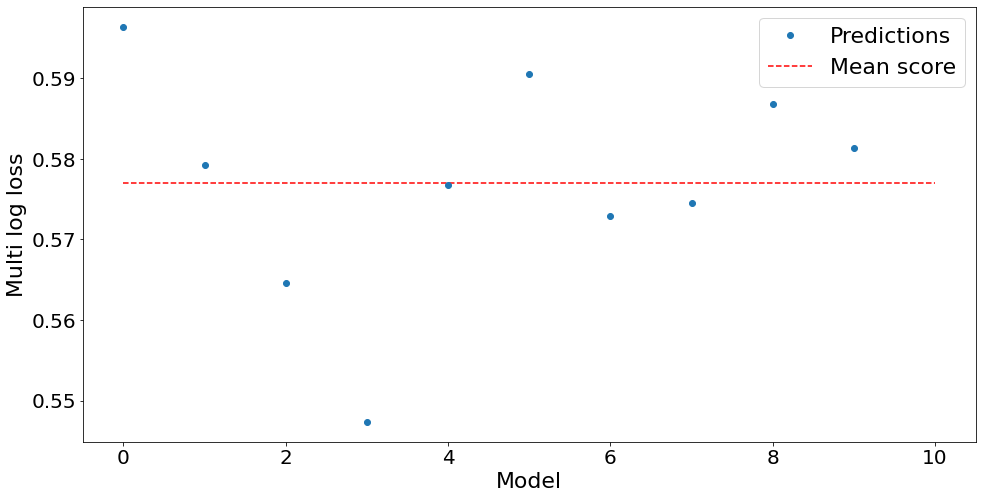

In [343]:
plt.plot(cv_scores, 'o', label = 'Predictions')
plt.hlines(cv_scores.mean(),0,nfolds, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [264]:
pred_test = 0
for i in range(nfolds) :
    pred_test = pred_test + models[i].predict_proba(X_test)
pred_test = pred_test/nfolds

In [277]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.996821   0.002606   0.000573
1  18000   0.244334   0.094790   0.660876
2  16964   0.997513   0.002314   0.000173
3   4795   0.672454   0.322095   0.005451
4   3392   0.240581   0.557406   0.202013

## Stratified 10-fold

In [315]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [316]:
nfolds = 10
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
cv_scores = np.empty(nfolds)
for idx, (train_idx, val_idx) in enumerate(cv.split(X.values, y.values)):
    X_train, X_val = X.values[train_idx], X.values[val_idx]
    y_train, y_val = y.values[train_idx], y.values[val_idx]

    model = lgbm.LGBMClassifier(**params, random_state = 1)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=500,
        verbose = -1
    )
    preds = model.predict_proba(X_val)
    models.append(model)
    cv_scores[idx] = log_loss(y_val, preds)
    
print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.545867
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

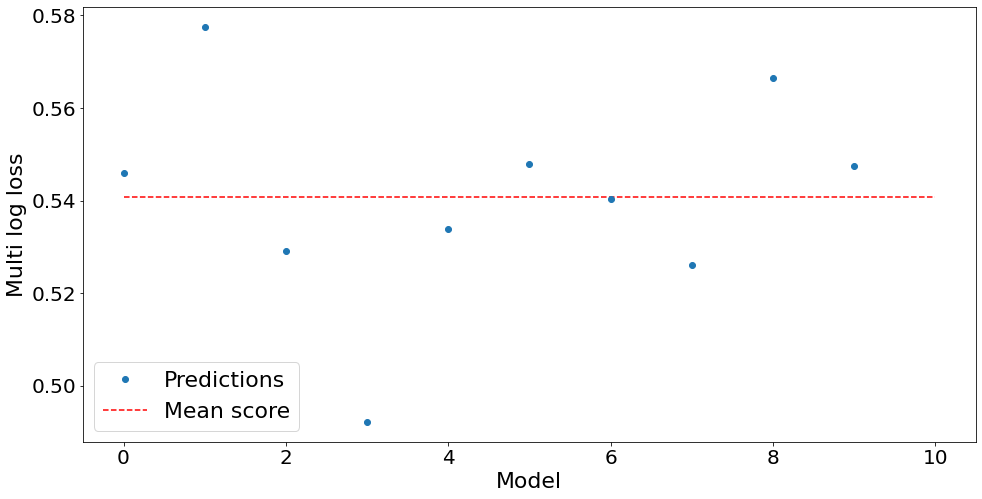

In [317]:
plt.plot(cv_scores, 'o', label = 'Predictions')
plt.hlines(cv_scores.mean(),0,nfolds, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [318]:
pred_test = 0
for i in range(nfolds) :
    pred_test = pred_test + models[i].predict_proba(X_test)
pred_test = pred_test/nfolds

In [319]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1_10fold.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.997001   0.002546   0.000453
1  18000   0.232306   0.080319   0.687374
2  16964   0.997578   0.002268   0.000154
3   4795   0.561609   0.433490   0.004901
4   3392   0.272176   0.546340   0.181484

## Stratified 20-fold

In [328]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [329]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
cv_scores = np.empty(nfolds)
for idx, (train_idx, val_idx) in enumerate(cv.split(X.values, y.values)):
    X_train, X_val = X.values[train_idx], X.values[val_idx]
    y_train, y_val = y.values[train_idx], y.values[val_idx]

    model = lgbm.LGBMClassifier(**params, random_state = 1)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=500,
        verbose = -1
    )
    preds = model.predict_proba(X_val)
    models.append(model)
    cv_scores[idx] = log_loss(y_val, preds)
    
print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.499323
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

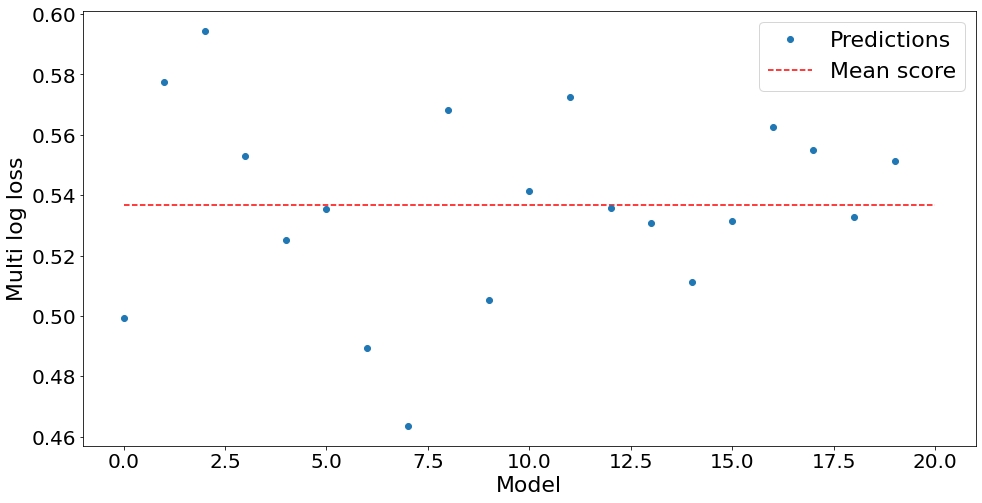

In [330]:
plt.plot(cv_scores, 'o', label = 'Predictions')
plt.hlines(cv_scores.mean(),0,nfolds, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [331]:
pred_test = 0
for i in range(nfolds) :
    pred_test = pred_test + models[i].predict_proba(X_test)
pred_test = pred_test/nfolds

In [332]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1_20fold.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.996117   0.003252   0.000631
1  18000   0.260347   0.085446   0.654207
2  16964   0.997576   0.002245   0.000179
3   4795   0.582017   0.412896   0.005088
4   3392   0.255706   0.534281   0.210013

## Stratified 20-fold Standardized

In [401]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }

#standardized
X_trn_std = X_all[X_all.index.isin(train.index)]
X_test_std = X_all[X_all.index.isin(test.index)]
X_trn_std.head(5)

location  event_type_1  event_type_2  event_type_3  event_type_4  \
id                                                                        
14121 -1.579161      -0.01164     -0.048044     -0.030808           0.0   
9320  -1.663372      -0.01164     -0.048044     -0.030808           0.0   
14394 -1.473117      -0.01164     -0.048044     -0.030808           0.0   
8218   0.956535      -0.01164     -0.048044     -0.030808           0.0   
14804 -1.572923      -0.01164     -0.048044     -0.030808           0.0   

       event_type_5  event_type_6  event_type_7  event_type_8  event_type_9  \
id                                                                            
14121     -0.046606     -0.046606     -0.042002     -0.032938     -0.020163   
9320      -0.046606     -0.046606     -0.042002     -0.032938     -0.020163   
14394     -0.046606     -0.046606     -0.042002     -0.032938     -0.020163   
8218      -0.046606     -0.046606     -0.042002     -0.032938     -0.020163   
14804     -0.046606     -0.046606     -0.042002     -0.032938     -0.020163   

       ...  resource_type_6  resource_type_7  resource_type_8  \
id     ...                                                      
14121  ...         -0.18606        -0.177307        -1.102883   
9320   ...         -0.18606        -0.177307        -1.102883   
14394  ...         -0.18606        -0.177307        -1.102883   
8218   ...         -0.18606        -0.177307         0.906591   
14804  ...         -0.18606        -0.177307         0.906591   

       resource_type_9  resource_type_10  severity_type_1  severity_type_2  \
id                                                                           
14121        -0.102668         -0.069021        -0.917808         1.027265   
9320         -0.102668         -0.069021        -0.917808         1.027265   
14394        -0.102668         -0.069021        -0.917808         1.027265   
8218         -0.102668         -0.069021         1.089404        -0.973327   
14804        -0.102668         -0.069021         1.089404        -0.973327   

       severity_type_3  severity_type_4  severity_type_5  
id                                                        
14121        -0.023284        -0.235535        -0.055906  
9320         -0.023284        -0.235535        -0.055906  
14394        -0.023284        -0.235535        -0.055906  
8218         -0.023284        -0.235535        -0.055906  
14804        -0.023284        -0.235535        -0.055906  

[5 rows x 1766 columns]

In [402]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
cv_scores = np.empty(nfolds)
for idx, (train_idx, val_idx) in enumerate(cv.split(X_trn_std.values, y.values)):
    X_train, X_val = X_trn_std.values[train_idx], X_trn_std.values[val_idx]
    y_train, y_val = y.values[train_idx], y.values[val_idx]

    model = lgbm.LGBMClassifier(**params, random_state = 1)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=500,
        verbose = -1
    )
    preds = model.predict_proba(X_val)
    models.append(model)
    cv_scores[idx] = log_loss(y_val, preds)
    
print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[29]	valid_0's multi_logloss: 0.511001
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

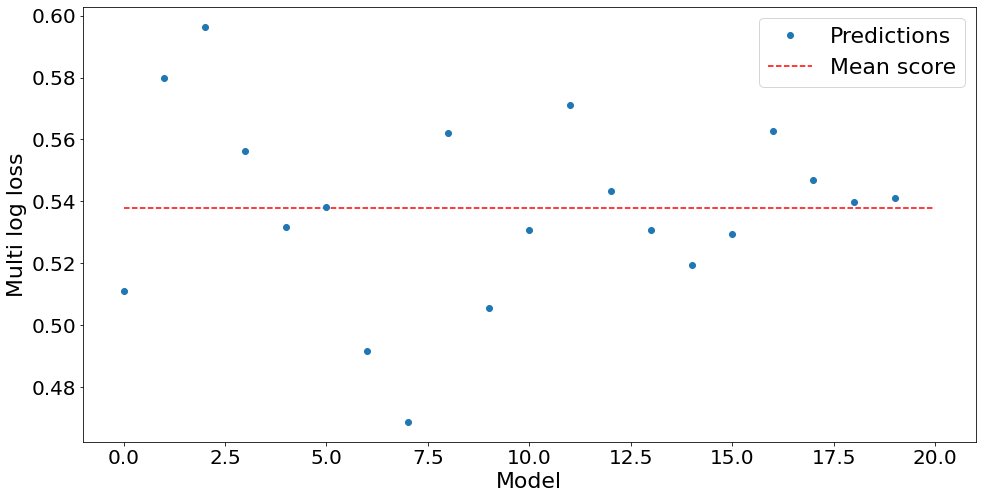

In [403]:
plt.plot(cv_scores, 'o', label = 'Predictions')
plt.hlines(cv_scores.mean(),0,nfolds, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [404]:
pred_test = 0
for i in range(nfolds) :
    pred_test = pred_test + models[i].predict_proba(X_test_std)
pred_test = pred_test/nfolds

In [405]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1std_20fold.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.996362   0.003070   0.000568
1  18000   0.272793   0.086971   0.640236
2  16964   0.997441   0.002378   0.000181
3   4795   0.524350   0.470462   0.005187
4   3392   0.256090   0.543902   0.200008

## Ensembling Stratified 5-fold

In [278]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [306]:
nfolds = 5
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
all_scores = []
for it in range(10) : 
    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X.values, y.values)):
        X_train, X_val = X.values[train_idx], X.values[val_idx]
        y_train, y_val = y.values[train_idx], y.values[val_idx]

        model = lgbm.LGBMClassifier(**params, random_state = it)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=500,
            verbose = -1
        )
        preds = model.predict_proba(X_val)
        models.append(model)
        all_scores.append(log_loss(y_val, preds))
        cv_scores[idx] = log_loss(y_val, preds)

    print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')
all_scores = np.array(all_scores)
print(f'Val set metric = {all_scores.mean():2.3} ± {all_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.563905
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

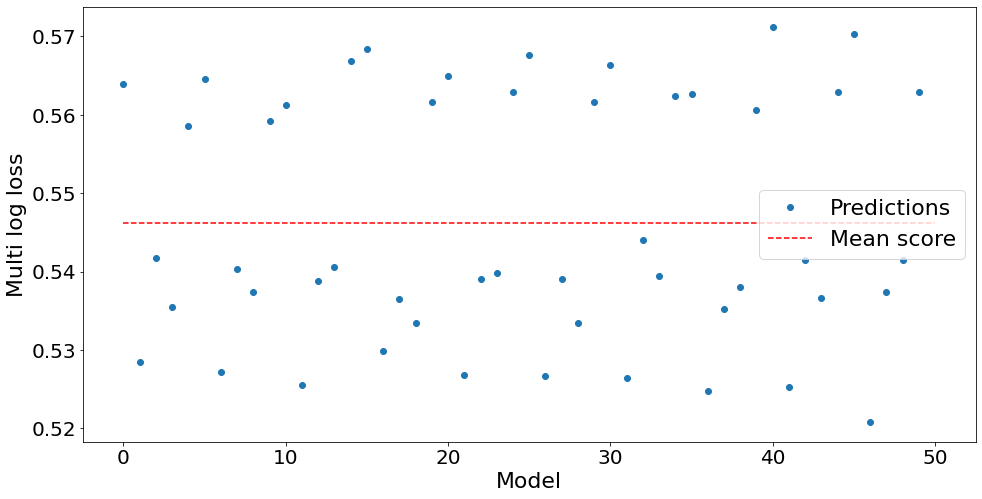

In [310]:
plt.plot(all_scores, 'o', label = 'Predictions')
plt.hlines(all_scores.mean(),0,nfolds*10, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [309]:
pred_test = 0
for i in range(nfolds*10) :
    pred_test = pred_test + models[i].predict_proba(X_test)
pred_test = pred_test/(nfolds*10)

In [311]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1_ensemble.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.995839   0.003472   0.000689
1  18000   0.229961   0.087387   0.682653
2  16964   0.997037   0.002746   0.000217
3   4795   0.621115   0.372935   0.005950
4   3392   0.246941   0.556620   0.196438

## Ensembling Stratified 10-fold

In [321]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [322]:
nfolds = 10
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
all_scores = []
for it in range(10) : 
    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X.values, y.values)):
        X_train, X_val = X.values[train_idx], X.values[val_idx]
        y_train, y_val = y.values[train_idx], y.values[val_idx]

        model = lgbm.LGBMClassifier(**params, random_state = it)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=500,
            verbose = -1
        )
        preds = model.predict_proba(X_val)
        models.append(model)
        all_scores.append(log_loss(y_val, preds))
        cv_scores[idx] = log_loss(y_val, preds)

    print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')
all_scores = np.array(all_scores)
print(f'Val set metric = {all_scores.mean():2.3} ± {all_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.539324
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

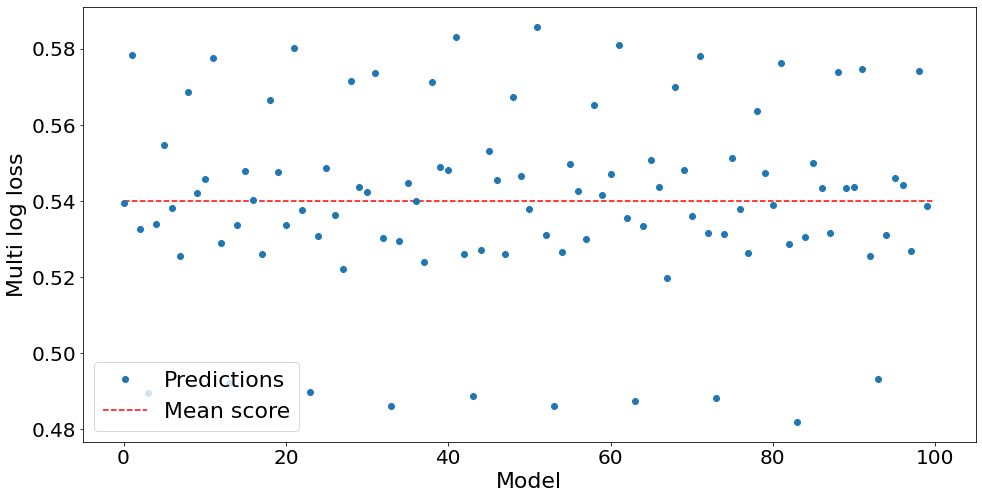

In [323]:
plt.plot(all_scores, 'o', label = 'Predictions')
plt.hlines(all_scores.mean(),0,nfolds*10, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [324]:
pred_test = 0
for i in range(nfolds*10) :
    pred_test = pred_test + models[i].predict_proba(X_test)
pred_test = pred_test/(nfolds*10)

In [325]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1_10ensemble.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.995612   0.003691   0.000697
1  18000   0.235852   0.083700   0.680449
2  16964   0.996990   0.002809   0.000201
3   4795   0.569342   0.424661   0.005997
4   3392   0.251505   0.552414   0.196081

## Ensembling Stratified 20-fold

In [333]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [416]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
all_scores = []
for it in range(10) : 
    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X.values, y.values)):
        X_train, X_val = X.values[train_idx], X.values[val_idx]
        y_train, y_val = y.values[train_idx], y.values[val_idx]

        model = lgbm.LGBMClassifier(**params, random_state = it)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=500,
            verbose = -1
        )
        preds = model.predict_proba(X_val)
        models.append(model)
        all_scores.append(log_loss(y_val, preds))
        cv_scores[idx] = log_loss(y_val, preds)

    print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')
all_scores = np.array(all_scores)
print(f'Val set metric = {all_scores.mean():2.3} ± {all_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.500773
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

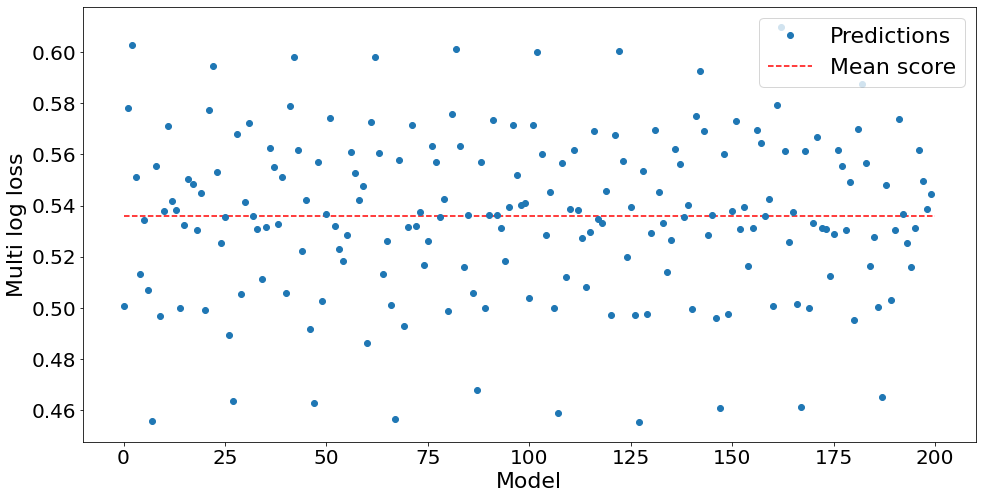

In [417]:
plt.plot(all_scores, 'o', label = 'Predictions')
plt.hlines(all_scores.mean(),0,nfolds*10, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [418]:
pred_test = 0
for i in range(nfolds*10) :
    pred_test = pred_test + models[i].predict_proba(X_test_std)
pred_test = pred_test/(nfolds*10)

In [409]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1_20ensemble.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.995794   0.003575   0.000631
1  18000   0.254282   0.088780   0.656937
2  16964   0.997127   0.002679   0.000194
3   4795   0.561784   0.432798   0.005418
4   3392   0.250218   0.552272   0.197510

## Ensembling Std Stratified 20-fold

In [333]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 7,
        'lambda_l2': 20,
        'min_gain_to_split': 0.05111522523686607,
        'bagging_fraction': 0.9000000000000001,
        'bagging_freq': 10,
        'feature_fraction': 0.9000000000000001,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [406]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
all_scores = []
for it in range(10) : 
    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X_trn_std.values, y.values)):
        X_train, X_val = X_trn_std.values[train_idx], X_trn_std.values[val_idx]
        y_train, y_val = y.values[train_idx], y.values[val_idx]

        model = lgbm.LGBMClassifier(**params, random_state = it)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=500,
            verbose = -1
        )
        preds = model.predict_proba(X_val)
        models.append(model)
        all_scores.append(log_loss(y_val, preds))
        cv_scores[idx] = log_loss(y_val, preds)

    print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')
all_scores = np.array(all_scores)
print(f'Val set metric = {all_scores.mean():2.3} ± {all_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9000000000000001
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9000000000000001
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_gain_to_split is set=0.05111522523686607, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05111522523686607
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.505662
[LightGBM] [Warning] bagging_fraction is set=0.9000000000000001, subsample=1.0 will be 

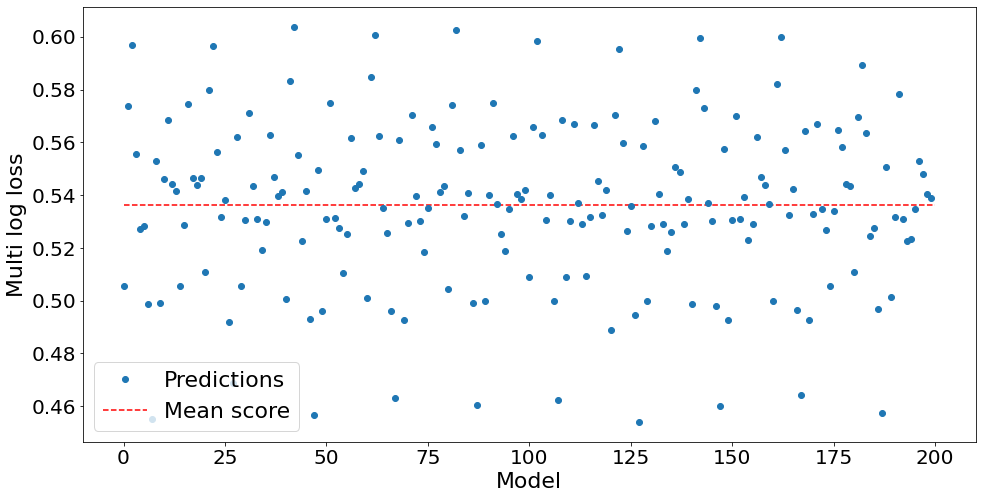

In [407]:
plt.plot(all_scores, 'o', label = 'Predictions')
plt.hlines(all_scores.mean(),0,nfolds*10, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [408]:
pred_test = 0
for i in range(nfolds*10) :
    pred_test = pred_test + models[i].predict_proba(X_test_std)
pred_test = pred_test/(nfolds*10)

In [409]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1std_20ensemble.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.995794   0.003575   0.000631
1  18000   0.254282   0.088780   0.656937
2  16964   0.997127   0.002679   0.000194
3   4795   0.561784   0.432798   0.005418
4   3392   0.250218   0.552272   0.197510

In [413]:
pred_test = 0
for i in range(nfolds*10) :
    pred_test = pred_test + all_scores[i]*models[i].predict_proba(X_test_std)
pred_test = pred_test/all_scores.sum()

In [414]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_1std_w20ensemble.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.995759   0.003608   0.000633
1  18000   0.254147   0.088961   0.656892
2  16964   0.997084   0.002718   0.000198
3   4795   0.561179   0.433370   0.005452
4   3392   0.249888   0.552818   0.197294

# Linear PCA + LGBM

## PCA Decomposition

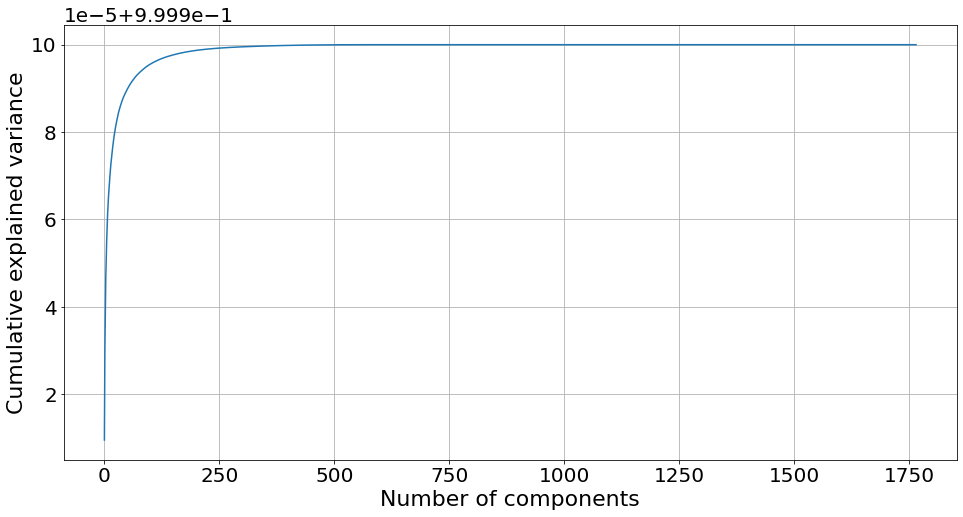

 Le nombre de dimensions à conserver :  32


PCA took 0.25 s
Explained variance: 1.0000


 Garder ce nombre de dimensions ? (Y or N) Y


In [360]:
# PCA Implementation
from sklearn.decomposition import PCA
import time 

pca_trn = PCA().fit(X.values)
plt.plot(np.cumsum(pca_trn.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.rcParams['figure.figsize']=(16,8)
plt.grid(True)
plt.show()


nb_pc = input(' Le nombre de dimensions à conserver : ')
nb_pc = int(nb_pc)

t0 = time.time()
pca_final = PCA(n_components=nb_pc, random_state=42)
X_reduced_pca = pca_final.fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
features = range(pca_final.n_components_)
print('Explained variance: %.4f' % pca_final.explained_variance_ratio_.sum())

ans = input(' Garder ce nombre de dimensions ? (Y or N)')

while ans!='Y' :
    del(pca_final)
    del(nb_pc)
    nb_pc = input(' Le nombre de dimensions à conserver : ')
    nb_pc = int(nb_pc)

    t0 = time.time()
    pca_final = PCA(n_components=nb_pc, random_state=42)
    X_reduced_pca = pca_final.fit_transform(X.values)
    t1 = time.time()
    print("PCA took {:.2} s".format(t1 - t0))
    features = range(pca_final.n_components_)
    print('Explained variance: %.4f' % pca_final.explained_variance_ratio_.sum())
    ans = input(' Garder ce nombre de dimensions ? (Y or N)')

X_pca=pd.DataFrame(X_reduced_pca)

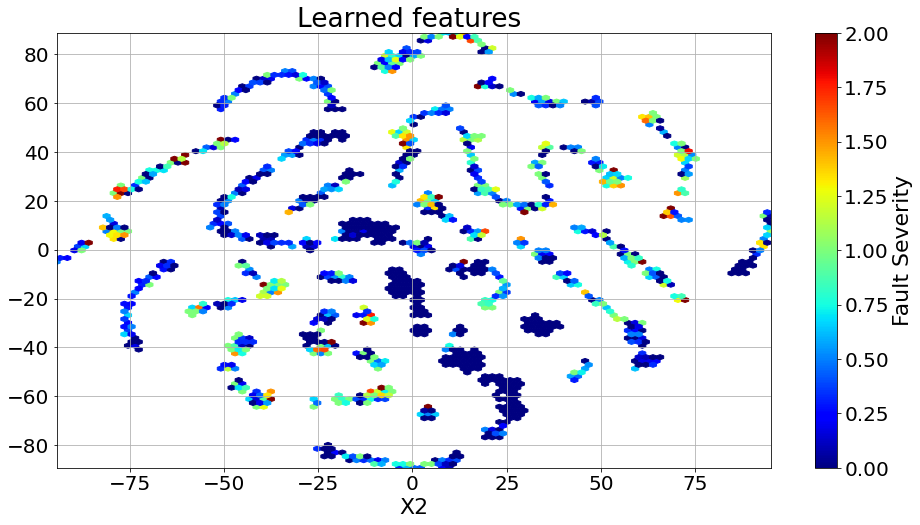

In [361]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X_reduced_pca)

plt.subplot(111)
x0 = projections[:,0]
x1 = projections[:,1]
plt.hexbin(x0,x1,y.values, cmap = plt.cm.jet, bins=None)
# import seaborn as sns
# sns.heatmap(projections)
plt.axis([x0.min(), x0.max(), x1.min(), x1.max()])
plt.grid()
cb = plt.colorbar()
cb.set_label('Fault Severity')
plt.xlabel('X1')
plt.xlabel('X2')
plt.title(f'Learned features ')
plt.show()
# plt.savefig(dir_path+'Embedding')
plt.close()   

## Hyperparameters tuning

In [370]:
# !pip install optuna
import optuna
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss


def objective(trial, df_X, df_y, nfolds):
    param_grid = {
#         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "boosting": trial.suggest_categorical("boosting", ['gbdt']),
        'num_class' : 3,
        'is_unbalance': 'true',
        "n_estimators": trial.suggest_categorical("n_estimators", [1000, 5000, 10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5, step = 0.05),
        "num_leaves": trial.suggest_int("num_leaves", 10, 5000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 12, step = 1),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
#         "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=20),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 1.0, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1,10]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 1.0, step=0.1
        ),
        "verbose" : -1
    }

    cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)

    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(df_X, df_y)):
        print(idx)
        X_train, X_val = df_X[train_idx], df_X[val_idx]
        y_train, y_val = df_y[train_idx], df_y[val_idx]

        model = lgbm.LGBMClassifier(objective="multiclass", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=200,
            callbacks=[
                LightGBMPruningCallback(trial, "multi_logloss")
            ],  # Add a pruning callback in order to speed up the calculations
        )
        preds = model.predict_proba(X_val)
        cv_scores[idx] = log_loss(y_val, preds)

    return np.mean(cv_scores)

In [371]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_reduced_pca, y.values, nfolds = 5)
study.optimize(func, n_trials=100)

[I 2022-03-13 18:43:59,976] A new study created in memory with name: LGBM Classifier


0
[1]	valid_0's multi_logloss: 0.831908
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.81063
[3]	valid_0's multi_logloss: 0.789324
[4]	valid_0's multi_logloss: 0.771482
[5]	valid_0's multi_logloss: 0.755819
[6]	valid_0's multi_logloss: 0.742535
[7]	valid_0's multi_logloss: 0.730051
[8]	valid_0's multi_logloss: 0.720265
[9]	valid_0's multi_logloss: 0.710613
[10]	valid_0's multi_logloss: 0.703546
[11]	valid_0's multi_logloss: 0.695562
[12]	valid_0's multi_logloss: 0.689252
[13]	valid_0's multi_logloss: 0.682888
[14]	valid_0's multi_logloss: 0.678145
[15]	valid_0's multi_logloss: 0.67178
[16]	valid_0's multi_logloss: 0.667163
[17]	valid_0's multi_logloss: 0.662566
[18]	valid_0's multi_logloss: 0.658646
[19]	valid_0's multi_logloss: 0.655456
[20]	valid_0's multi_logloss: 0.652573
[21]	valid_0's multi_logloss: 0.64967
[22]	valid_0's multi_logloss: 0.646437
[23]	valid_0's multi_logloss: 0.643945
[24]	valid_0's multi_logloss: 0.641235
[25]	valid_0

[I 2022-03-13 18:44:00,930] Trial 0 finished with value: 0.592810399351378 and parameters: {'boosting': 'gbdt', 'n_estimators': 1000, 'learning_rate': 0.060000000000000005, 'num_leaves': 410, 'max_depth': 10, 'lambda_l2': 0, 'min_gain_to_split': 4.6263651125538345, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 0.4}. Best is trial 0 with value: 0.592810399351378.


[43]	valid_0's multi_logloss: 0.609647
[44]	valid_0's multi_logloss: 0.609471
[45]	valid_0's multi_logloss: 0.608935
[46]	valid_0's multi_logloss: 0.608728
[47]	valid_0's multi_logloss: 0.608206
[48]	valid_0's multi_logloss: 0.607734
[49]	valid_0's multi_logloss: 0.607218
[50]	valid_0's multi_logloss: 0.606944
[51]	valid_0's multi_logloss: 0.606732
[52]	valid_0's multi_logloss: 0.606414
[53]	valid_0's multi_logloss: 0.605912
[54]	valid_0's multi_logloss: 0.604969
[55]	valid_0's multi_logloss: 0.604928
[56]	valid_0's multi_logloss: 0.604675
[57]	valid_0's multi_logloss: 0.604295
[58]	valid_0's multi_logloss: 0.604201
[59]	valid_0's multi_logloss: 0.604061
[60]	valid_0's multi_logloss: 0.603241
[61]	valid_0's multi_logloss: 0.603002
[62]	valid_0's multi_logloss: 0.602799
[63]	valid_0's multi_logloss: 0.602648
[64]	valid_0's multi_logloss: 0.602534
[65]	valid_0's multi_logloss: 0.602235
[66]	valid_0's multi_logloss: 0.60208
[67]	valid_0's multi_logloss: 0.602059
[68]	valid_0's multi_loglo

[I 2022-03-13 18:44:01,422] Trial 1 finished with value: 0.6402936279494718 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1010, 'max_depth': 8, 'lambda_l2': 80, 'min_gain_to_split': 6.94228928991188, 'bagging_fraction': 0.7, 'bagging_freq': 10, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 0.592810399351378.


[157]	valid_0's multi_logloss: 0.648256
[158]	valid_0's multi_logloss: 0.648256
[159]	valid_0's multi_logloss: 0.648256
[160]	valid_0's multi_logloss: 0.648256
[161]	valid_0's multi_logloss: 0.648256
[162]	valid_0's multi_logloss: 0.648256
[163]	valid_0's multi_logloss: 0.648256
[164]	valid_0's multi_logloss: 0.648256
[165]	valid_0's multi_logloss: 0.648256
[166]	valid_0's multi_logloss: 0.648256
[167]	valid_0's multi_logloss: 0.648256
[168]	valid_0's multi_logloss: 0.648256
[169]	valid_0's multi_logloss: 0.648256
[170]	valid_0's multi_logloss: 0.648256
[171]	valid_0's multi_logloss: 0.648256
[172]	valid_0's multi_logloss: 0.648256
[173]	valid_0's multi_logloss: 0.648256
[174]	valid_0's multi_logloss: 0.648256
[175]	valid_0's multi_logloss: 0.648256
[176]	valid_0's multi_logloss: 0.648256
[177]	valid_0's multi_logloss: 0.648256
[178]	valid_0's multi_logloss: 0.648256
[179]	valid_0's multi_logloss: 0.648256
[180]	valid_0's multi_logloss: 0.648256
[181]	valid_0's multi_logloss: 0.648256


[I 2022-03-13 18:44:02,877] Trial 2 finished with value: 0.5834600720939296 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.21000000000000002, 'num_leaves': 1210, 'max_depth': 9, 'lambda_l2': 20, 'min_gain_to_split': 3.49063456351005, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.5834600720939296.


[342]	valid_0's multi_logloss: 0.592799
[343]	valid_0's multi_logloss: 0.592616
[344]	valid_0's multi_logloss: 0.592633
[345]	valid_0's multi_logloss: 0.592542
[346]	valid_0's multi_logloss: 0.592632
[347]	valid_0's multi_logloss: 0.592521
[348]	valid_0's multi_logloss: 0.592351
[349]	valid_0's multi_logloss: 0.592351
[350]	valid_0's multi_logloss: 0.592539
[351]	valid_0's multi_logloss: 0.592539
[352]	valid_0's multi_logloss: 0.592539
[353]	valid_0's multi_logloss: 0.592222
[354]	valid_0's multi_logloss: 0.592222
[355]	valid_0's multi_logloss: 0.592019
[356]	valid_0's multi_logloss: 0.592314
[357]	valid_0's multi_logloss: 0.592314
[358]	valid_0's multi_logloss: 0.592314
[359]	valid_0's multi_logloss: 0.592314
[360]	valid_0's multi_logloss: 0.592314
[361]	valid_0's multi_logloss: 0.592919
[362]	valid_0's multi_logloss: 0.592782
[363]	valid_0's multi_logloss: 0.592782
[364]	valid_0's multi_logloss: 0.592855
[365]	valid_0's multi_logloss: 0.592855
[366]	valid_0's multi_logloss: 0.592855


[I 2022-03-13 18:44:04,434] Trial 3 finished with value: 0.6254802432514415 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1660, 'max_depth': 4, 'lambda_l2': 40, 'min_gain_to_split': 8.725486009502651, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.9000000000000001}. Best is trial 2 with value: 0.5834600720939296.


[681]	valid_0's multi_logloss: 0.624663
[682]	valid_0's multi_logloss: 0.624663
[683]	valid_0's multi_logloss: 0.624663
[684]	valid_0's multi_logloss: 0.624663
[685]	valid_0's multi_logloss: 0.624663
[686]	valid_0's multi_logloss: 0.624663
[687]	valid_0's multi_logloss: 0.624663
[688]	valid_0's multi_logloss: 0.624663
[689]	valid_0's multi_logloss: 0.624663
[690]	valid_0's multi_logloss: 0.624663
[691]	valid_0's multi_logloss: 0.624663
[692]	valid_0's multi_logloss: 0.624663
[693]	valid_0's multi_logloss: 0.624663
[694]	valid_0's multi_logloss: 0.624755
[695]	valid_0's multi_logloss: 0.624755
[696]	valid_0's multi_logloss: 0.624755
[697]	valid_0's multi_logloss: 0.624755
[698]	valid_0's multi_logloss: 0.624755
[699]	valid_0's multi_logloss: 0.624755
[700]	valid_0's multi_logloss: 0.624755
[701]	valid_0's multi_logloss: 0.624755
[702]	valid_0's multi_logloss: 0.624755
[703]	valid_0's multi_logloss: 0.624755
[704]	valid_0's multi_logloss: 0.624755
[705]	valid_0's multi_logloss: 0.624755


[I 2022-03-13 18:44:07,176] Trial 4 finished with value: 0.6443702038926634 and parameters: {'boosting': 'gbdt', 'n_estimators': 10000, 'learning_rate': 0.01, 'num_leaves': 3010, 'max_depth': 11, 'lambda_l2': 60, 'min_gain_to_split': 10.291329244437396, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 2 with value: 0.5834600720939296.
[I 2022-03-13 18:44:07,192] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,213] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,228] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,246] Trial 8 pruned. Trial was pruned at iteration 0.


[424]	valid_0's multi_logloss: 0.649154
[425]	valid_0's multi_logloss: 0.649154
[426]	valid_0's multi_logloss: 0.649154
[427]	valid_0's multi_logloss: 0.649154
[428]	valid_0's multi_logloss: 0.649154
[429]	valid_0's multi_logloss: 0.649154
[430]	valid_0's multi_logloss: 0.649154
[431]	valid_0's multi_logloss: 0.649154
[432]	valid_0's multi_logloss: 0.649154
[433]	valid_0's multi_logloss: 0.649154
[434]	valid_0's multi_logloss: 0.649154
[435]	valid_0's multi_logloss: 0.649154
[436]	valid_0's multi_logloss: 0.649154
[437]	valid_0's multi_logloss: 0.649154
[438]	valid_0's multi_logloss: 0.649154
[439]	valid_0's multi_logloss: 0.649154
[440]	valid_0's multi_logloss: 0.649154
[441]	valid_0's multi_logloss: 0.649154
[442]	valid_0's multi_logloss: 0.649154
[443]	valid_0's multi_logloss: 0.649154
[444]	valid_0's multi_logloss: 0.649154
[445]	valid_0's multi_logloss: 0.649154
[446]	valid_0's multi_logloss: 0.649154
[447]	valid_0's multi_logloss: 0.649154
[448]	valid_0's multi_logloss: 0.649154


[I 2022-03-13 18:44:07,273] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,316] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,353] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,393] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,432] Trial 13 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,469] Trial 14 pruned. Trial was pruned at iteration 0.


0
0
0
0
0
0


[I 2022-03-13 18:44:07,518] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,555] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,591] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:07,627] Trial 18 pruned. Trial was pruned at iteration 0.


0
0
0
0
[1]	valid_0's multi_logloss: 0.732547
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.677918
[3]	valid_0's multi_logloss: 0.647061
[4]	valid_0's multi_logloss: 0.625813
[5]	valid_0's multi_logloss: 0.61688
[6]	valid_0's multi_logloss: 0.614838
[7]	valid_0's multi_logloss: 0.613411
[8]	valid_0's multi_logloss: 0.614636
[9]	valid_0's multi_logloss: 0.61441
[10]	valid_0's multi_logloss: 0.615905
[11]	valid_0's multi_logloss: 0.617316
[12]	valid_0's multi_logloss: 0.619781
[13]	valid_0's multi_logloss: 0.620721
[14]	valid_0's multi_logloss: 0.620058
[15]	valid_0's multi_logloss: 0.625052
[16]	valid_0's multi_logloss: 0.627177
[17]	valid_0's multi_logloss: 0.63106
[18]	valid_0's multi_logloss: 0.633277
[19]	valid_0's multi_logloss: 0.63838
[20]	valid_0's multi_logloss: 0.641254
[21]	valid_0's multi_logloss: 0.645923
[22]	valid_0's multi_logloss: 0.64935
[23]	valid_0's multi_logloss: 0.654316
[24]	valid_0's multi_logloss: 0.655597
[25]	val

[I 2022-03-13 18:44:09,278] Trial 19 finished with value: 0.6007639714063417 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.31000000000000005, 'num_leaves': 2260, 'max_depth': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.1761607144594386, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 2 with value: 0.5834600720939296.
[I 2022-03-13 18:44:09,310] Trial 20 pruned. Trial was pruned at iteration 0.


[34]	valid_0's multi_logloss: 0.668603
[35]	valid_0's multi_logloss: 0.669789
[36]	valid_0's multi_logloss: 0.670787
[37]	valid_0's multi_logloss: 0.669999
[38]	valid_0's multi_logloss: 0.670582
[39]	valid_0's multi_logloss: 0.671182
[40]	valid_0's multi_logloss: 0.671304
[41]	valid_0's multi_logloss: 0.674882
[42]	valid_0's multi_logloss: 0.677572
[43]	valid_0's multi_logloss: 0.680179
[44]	valid_0's multi_logloss: 0.681411
[45]	valid_0's multi_logloss: 0.681265
[46]	valid_0's multi_logloss: 0.681428
[47]	valid_0's multi_logloss: 0.683045
[48]	valid_0's multi_logloss: 0.68293
[49]	valid_0's multi_logloss: 0.68293
[50]	valid_0's multi_logloss: 0.68293
[51]	valid_0's multi_logloss: 0.68293
[52]	valid_0's multi_logloss: 0.68293
[53]	valid_0's multi_logloss: 0.68293
[54]	valid_0's multi_logloss: 0.68293
[55]	valid_0's multi_logloss: 0.68293
[56]	valid_0's multi_logloss: 0.68293
[57]	valid_0's multi_logloss: 0.68293
[58]	valid_0's multi_logloss: 0.68293
[59]	valid_0's multi_logloss: 0.6829

[I 2022-03-13 18:44:10,918] Trial 21 finished with value: 0.5958276561908192 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.31000000000000005, 'num_leaves': 2260, 'max_depth': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.20526256930101283, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 2 with value: 0.5834600720939296.


[40]	valid_0's multi_logloss: 0.678538
[41]	valid_0's multi_logloss: 0.681674
[42]	valid_0's multi_logloss: 0.682569
[43]	valid_0's multi_logloss: 0.684663
[44]	valid_0's multi_logloss: 0.684901
[45]	valid_0's multi_logloss: 0.684759
[46]	valid_0's multi_logloss: 0.685208
[47]	valid_0's multi_logloss: 0.685208
[48]	valid_0's multi_logloss: 0.685208
[49]	valid_0's multi_logloss: 0.685208
[50]	valid_0's multi_logloss: 0.685208
[51]	valid_0's multi_logloss: 0.685208
[52]	valid_0's multi_logloss: 0.685208
[53]	valid_0's multi_logloss: 0.685208
[54]	valid_0's multi_logloss: 0.685208
[55]	valid_0's multi_logloss: 0.685208
[56]	valid_0's multi_logloss: 0.685208
[57]	valid_0's multi_logloss: 0.685208
[58]	valid_0's multi_logloss: 0.685208
[59]	valid_0's multi_logloss: 0.685208
[60]	valid_0's multi_logloss: 0.685208
[61]	valid_0's multi_logloss: 0.685208
[62]	valid_0's multi_logloss: 0.685208
[63]	valid_0's multi_logloss: 0.685208
[64]	valid_0's multi_logloss: 0.685208
[65]	valid_0's multi_logl

[I 2022-03-13 18:44:11,837] Trial 22 finished with value: 0.5934481959995087 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2560, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 1.5513548452011117, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 2 with value: 0.5834600720939296.


[225]	valid_0's multi_logloss: 0.599998
[226]	valid_0's multi_logloss: 0.599998
[227]	valid_0's multi_logloss: 0.599998
[228]	valid_0's multi_logloss: 0.599998
[229]	valid_0's multi_logloss: 0.599998
[230]	valid_0's multi_logloss: 0.599998
[231]	valid_0's multi_logloss: 0.599998
[232]	valid_0's multi_logloss: 0.599998
[233]	valid_0's multi_logloss: 0.599998
[234]	valid_0's multi_logloss: 0.599998
[235]	valid_0's multi_logloss: 0.599998
[236]	valid_0's multi_logloss: 0.599998
[237]	valid_0's multi_logloss: 0.599998
[238]	valid_0's multi_logloss: 0.599998
[239]	valid_0's multi_logloss: 0.599998
[240]	valid_0's multi_logloss: 0.599998
[241]	valid_0's multi_logloss: 0.599998
[242]	valid_0's multi_logloss: 0.599998
[243]	valid_0's multi_logloss: 0.599998
[244]	valid_0's multi_logloss: 0.599998
[245]	valid_0's multi_logloss: 0.599998
[246]	valid_0's multi_logloss: 0.599998
[247]	valid_0's multi_logloss: 0.599998
[248]	valid_0's multi_logloss: 0.599998
[249]	valid_0's multi_logloss: 0.599998


[I 2022-03-13 18:44:12,794] Trial 23 finished with value: 0.5860411921160716 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 2810, 'max_depth': 7, 'lambda_l2': 20, 'min_gain_to_split': 1.7249296508853567, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.5834600720939296.


[127]	valid_0's multi_logloss: 0.59378
[128]	valid_0's multi_logloss: 0.59378
[129]	valid_0's multi_logloss: 0.59378
[130]	valid_0's multi_logloss: 0.59378
[131]	valid_0's multi_logloss: 0.59378
[132]	valid_0's multi_logloss: 0.59378
[133]	valid_0's multi_logloss: 0.59378
[134]	valid_0's multi_logloss: 0.59378
[135]	valid_0's multi_logloss: 0.59378
[136]	valid_0's multi_logloss: 0.59378
[137]	valid_0's multi_logloss: 0.59378
[138]	valid_0's multi_logloss: 0.59378
[139]	valid_0's multi_logloss: 0.59378
[140]	valid_0's multi_logloss: 0.59378
[141]	valid_0's multi_logloss: 0.59378
[142]	valid_0's multi_logloss: 0.59378
[143]	valid_0's multi_logloss: 0.59378
[144]	valid_0's multi_logloss: 0.59378
[145]	valid_0's multi_logloss: 0.59378
[146]	valid_0's multi_logloss: 0.59378
[147]	valid_0's multi_logloss: 0.59378
[148]	valid_0's multi_logloss: 0.59378
[149]	valid_0's multi_logloss: 0.59378
[150]	valid_0's multi_logloss: 0.59378
[151]	valid_0's multi_logloss: 0.59378
[152]	valid_0's multi_log

[I 2022-03-13 18:44:12,844] Trial 24 pruned. Trial was pruned at iteration 12.
[I 2022-03-13 18:44:12,890] Trial 25 pruned. Trial was pruned at iteration 7.
[I 2022-03-13 18:44:12,926] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:12,963] Trial 27 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=5.109472038114602, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.109472038114602
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[1]	valid_0's multi_logloss: 0.722338
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.677232
[3]	valid_0's multi_logloss: 0.652625
[4]	valid_0's multi_logloss: 0.641921
[5]	valid_0's multi_logloss: 0.637522
[6]	valid_0's multi_logloss: 0.6342

[I 2022-03-13 18:44:13,212] Trial 28 pruned. Trial was pruned at iteration 267.


[12]	valid_0's multi_logloss: 0.619327
[13]	valid_0's multi_logloss: 0.618471
[14]	valid_0's multi_logloss: 0.617342
[15]	valid_0's multi_logloss: 0.617214
[16]	valid_0's multi_logloss: 0.616892
[17]	valid_0's multi_logloss: 0.616198
[18]	valid_0's multi_logloss: 0.616545
[19]	valid_0's multi_logloss: 0.61684
[20]	valid_0's multi_logloss: 0.615944
[21]	valid_0's multi_logloss: 0.61578
[22]	valid_0's multi_logloss: 0.61623
[23]	valid_0's multi_logloss: 0.615394
[24]	valid_0's multi_logloss: 0.615617
[25]	valid_0's multi_logloss: 0.615305
[26]	valid_0's multi_logloss: 0.614912
[27]	valid_0's multi_logloss: 0.614294
[28]	valid_0's multi_logloss: 0.614245
[29]	valid_0's multi_logloss: 0.615081
[30]	valid_0's multi_logloss: 0.615234
[31]	valid_0's multi_logloss: 0.614835
[32]	valid_0's multi_logloss: 0.614835
[33]	valid_0's multi_logloss: 0.614901
[34]	valid_0's multi_logloss: 0.614971
[35]	valid_0's multi_logloss: 0.614158
[36]	valid_0's multi_logloss: 0.613858
[37]	valid_0's multi_logloss

[I 2022-03-13 18:44:13,247] Trial 29 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:13,302] Trial 30 pruned. Trial was pruned at iteration 14.


0
0
[1]	valid_0's multi_logloss: 0.76187
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.713322
[3]	valid_0's multi_logloss: 0.681938
[4]	valid_0's multi_logloss: 0.664437
[5]	valid_0's multi_logloss: 0.655098
[6]	valid_0's multi_logloss: 0.648016
[7]	valid_0's multi_logloss: 0.642518
[8]	valid_0's multi_logloss: 0.637688
[9]	valid_0's multi_logloss: 0.636262
[10]	valid_0's multi_logloss: 0.6351
[11]	valid_0's multi_logloss: 0.632562
[12]	valid_0's multi_logloss: 0.628217
[13]	valid_0's multi_logloss: 0.626559
[14]	valid_0's multi_logloss: 0.626051
0
[1]	valid_0's multi_logloss: 0.717052
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.666776
[3]	valid_0's multi_logloss: 0.642662
[4]	valid_0's multi_logloss: 0.631711
[5]	valid_0's multi_logloss: 0.628607
[6]	valid_0's multi_logloss: 0.623764
[7]	valid_0's multi_logloss: 0.621502
[8]	valid_0's multi_logloss: 0.622584
[9]	valid_0's multi_logloss: 0.6

[I 2022-03-13 18:44:14,180] Trial 31 finished with value: 0.5931791310203328 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 2560, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 1.5667179525301986, 'bagging_fraction': 0.9000000000000001, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 2 with value: 0.5834600720939296.


[3]	valid_0's multi_logloss: 0.63323
[4]	valid_0's multi_logloss: 0.620131
[5]	valid_0's multi_logloss: 0.615953
[6]	valid_0's multi_logloss: 0.611304
[7]	valid_0's multi_logloss: 0.607725
[8]	valid_0's multi_logloss: 0.605038
[9]	valid_0's multi_logloss: 0.605208
[10]	valid_0's multi_logloss: 0.605145
[11]	valid_0's multi_logloss: 0.602987
[12]	valid_0's multi_logloss: 0.602909
[13]	valid_0's multi_logloss: 0.602858
[14]	valid_0's multi_logloss: 0.603259
[15]	valid_0's multi_logloss: 0.602301
[16]	valid_0's multi_logloss: 0.602301
[17]	valid_0's multi_logloss: 0.602257
[18]	valid_0's multi_logloss: 0.602257
[19]	valid_0's multi_logloss: 0.602257
[20]	valid_0's multi_logloss: 0.602257
[21]	valid_0's multi_logloss: 0.602257
[22]	valid_0's multi_logloss: 0.602257
[23]	valid_0's multi_logloss: 0.602257
[24]	valid_0's multi_logloss: 0.602257
[25]	valid_0's multi_logloss: 0.602257
[26]	valid_0's multi_logloss: 0.602257
[27]	valid_0's multi_logloss: 0.602257
[28]	valid_0's multi_logloss: 0.6

[I 2022-03-13 18:44:15,101] Trial 32 finished with value: 0.5955810604516419 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1860, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 1.2268866889353403, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.5834600720939296.
[I 2022-03-13 18:44:15,136] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:15,184] Trial 34 pruned. Trial was pruned at iteration 3.
[I 2022-03-13 18:44:15,213] Trial 35 pruned. Trial was pruned at iteration 0.


[132]	valid_0's multi_logloss: 0.605954
[133]	valid_0's multi_logloss: 0.605954
[134]	valid_0's multi_logloss: 0.605954
[135]	valid_0's multi_logloss: 0.605954
[136]	valid_0's multi_logloss: 0.605954
[137]	valid_0's multi_logloss: 0.605954
[138]	valid_0's multi_logloss: 0.605954
[139]	valid_0's multi_logloss: 0.605954
[140]	valid_0's multi_logloss: 0.605954
[141]	valid_0's multi_logloss: 0.605954
[142]	valid_0's multi_logloss: 0.605954
[143]	valid_0's multi_logloss: 0.605954
[144]	valid_0's multi_logloss: 0.605954
[145]	valid_0's multi_logloss: 0.605954
[146]	valid_0's multi_logloss: 0.605954
[147]	valid_0's multi_logloss: 0.605954
[148]	valid_0's multi_logloss: 0.605954
[149]	valid_0's multi_logloss: 0.605954
[150]	valid_0's multi_logloss: 0.605954
[151]	valid_0's multi_logloss: 0.605954
[152]	valid_0's multi_logloss: 0.605954
[153]	valid_0's multi_logloss: 0.605954
[154]	valid_0's multi_logloss: 0.605954
[155]	valid_0's multi_logloss: 0.605954
[156]	valid_0's multi_logloss: 0.605954


[I 2022-03-13 18:44:16,060] Trial 36 finished with value: 0.5898530639180579 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.36000000000000004, 'num_leaves': 1910, 'max_depth': 8, 'lambda_l2': 0, 'min_gain_to_split': 1.0696926016422212, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.5834600720939296.


[155]	valid_0's multi_logloss: 0.586871
[156]	valid_0's multi_logloss: 0.586871
[157]	valid_0's multi_logloss: 0.586871
[158]	valid_0's multi_logloss: 0.586871
[159]	valid_0's multi_logloss: 0.586871
[160]	valid_0's multi_logloss: 0.586871
[161]	valid_0's multi_logloss: 0.586871
[162]	valid_0's multi_logloss: 0.586871
[163]	valid_0's multi_logloss: 0.586871
[164]	valid_0's multi_logloss: 0.586871
[165]	valid_0's multi_logloss: 0.586871
[166]	valid_0's multi_logloss: 0.586871
[167]	valid_0's multi_logloss: 0.586871
[168]	valid_0's multi_logloss: 0.586871
[169]	valid_0's multi_logloss: 0.586871
[170]	valid_0's multi_logloss: 0.586871
[171]	valid_0's multi_logloss: 0.586871
[172]	valid_0's multi_logloss: 0.586871
[173]	valid_0's multi_logloss: 0.586871
[174]	valid_0's multi_logloss: 0.586871
[175]	valid_0's multi_logloss: 0.586871
[176]	valid_0's multi_logloss: 0.586871
[177]	valid_0's multi_logloss: 0.586871
[178]	valid_0's multi_logloss: 0.586871
[179]	valid_0's multi_logloss: 0.586871


[I 2022-03-13 18:44:16,091] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:16,126] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:16,163] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:16,201] Trial 40 pruned. Trial was pruned at iteration 0.


0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] min_gain_to_split is set=6.351144552026367, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.351144552026367
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
0
0
0
0
[1]	valid_0's multi_logloss: 0.717731
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.665238
[3]	valid_0's multi_logloss: 0.636961
[4]	valid_0's multi_logloss: 0.625814
[5]	valid_0's multi_logloss: 0.617476
[6]	valid_0's multi_logloss

[I 2022-03-13 18:44:16,419] Trial 41 pruned. Trial was pruned at iteration 217.


[22]	valid_0's multi_logloss: 0.607282
[23]	valid_0's multi_logloss: 0.60776
[24]	valid_0's multi_logloss: 0.607445
[25]	valid_0's multi_logloss: 0.607085
[26]	valid_0's multi_logloss: 0.607951
[27]	valid_0's multi_logloss: 0.608164
[28]	valid_0's multi_logloss: 0.608112
[29]	valid_0's multi_logloss: 0.60787
[30]	valid_0's multi_logloss: 0.60787
[31]	valid_0's multi_logloss: 0.607425
[32]	valid_0's multi_logloss: 0.607425
[33]	valid_0's multi_logloss: 0.607105
[34]	valid_0's multi_logloss: 0.607105
[35]	valid_0's multi_logloss: 0.607055
[36]	valid_0's multi_logloss: 0.607131
[37]	valid_0's multi_logloss: 0.607182
[38]	valid_0's multi_logloss: 0.606996
[39]	valid_0's multi_logloss: 0.607111
[40]	valid_0's multi_logloss: 0.606894
[41]	valid_0's multi_logloss: 0.606894
[42]	valid_0's multi_logloss: 0.606894
[43]	valid_0's multi_logloss: 0.606894
[44]	valid_0's multi_logloss: 0.606894
[45]	valid_0's multi_logloss: 0.606894
[46]	valid_0's multi_logloss: 0.607349
[47]	valid_0's multi_logloss

[I 2022-03-13 18:44:16,636] Trial 42 pruned. Trial was pruned at iteration 213.


[6]	valid_0's multi_logloss: 0.61281
[7]	valid_0's multi_logloss: 0.614282
[8]	valid_0's multi_logloss: 0.613416
[9]	valid_0's multi_logloss: 0.611494
[10]	valid_0's multi_logloss: 0.613034
[11]	valid_0's multi_logloss: 0.614005
[12]	valid_0's multi_logloss: 0.613187
[13]	valid_0's multi_logloss: 0.610869
[14]	valid_0's multi_logloss: 0.610479
[15]	valid_0's multi_logloss: 0.61031
[16]	valid_0's multi_logloss: 0.610335
[17]	valid_0's multi_logloss: 0.610335
[18]	valid_0's multi_logloss: 0.610335
[19]	valid_0's multi_logloss: 0.610335
[20]	valid_0's multi_logloss: 0.610335
[21]	valid_0's multi_logloss: 0.610335
[22]	valid_0's multi_logloss: 0.610335
[23]	valid_0's multi_logloss: 0.610335
[24]	valid_0's multi_logloss: 0.610335
[25]	valid_0's multi_logloss: 0.610335
[26]	valid_0's multi_logloss: 0.610335
[27]	valid_0's multi_logloss: 0.610335
[28]	valid_0's multi_logloss: 0.610335
[29]	valid_0's multi_logloss: 0.610335
[30]	valid_0's multi_logloss: 0.610335
[31]	valid_0's multi_logloss: 0

[I 2022-03-13 18:44:16,689] Trial 43 pruned. Trial was pruned at iteration 2.
[I 2022-03-13 18:44:16,738] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:16,785] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:16,835] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:16,875] Trial 47 pruned. Trial was pruned at iteration 0.


0
0
0
0
0


[I 2022-03-13 18:44:16,918] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:16,962] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:17,007] Trial 50 pruned. Trial was pruned at iteration 1.
[I 2022-03-13 18:44:17,074] Trial 51 pruned. Trial was pruned at iteration 4.
[I 2022-03-13 18:44:17,137] Trial 52 pruned. Trial was pruned at iteration 2.


0
0
[1]	valid_0's multi_logloss: 0.714685
Training until validation scores don't improve for 200 rounds
0
[1]	valid_0's multi_logloss: 0.717105
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.667139
[3]	valid_0's multi_logloss: 0.642914
[4]	valid_0's multi_logloss: 0.63054
0
[1]	valid_0's multi_logloss: 0.726889
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.672429


[I 2022-03-13 18:44:17,179] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:17,226] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:17,269] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:17,328] Trial 56 pruned. Trial was pruned at iteration 2.


0
0
0
0
[1]	valid_0's multi_logloss: 0.711574
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.673423
0


[I 2022-03-13 18:44:17,366] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:17,407] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:17,450] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:17,490] Trial 60 pruned. Trial was pruned at iteration 0.


0
0
0
0
[1]	valid_0's multi_logloss: 0.691205
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.64272
[3]	valid_0's multi_logloss: 0.623942
[4]	valid_0's multi_logloss: 0.608317
[5]	valid_0's multi_logloss: 0.599894
[6]	valid_0's multi_logloss: 0.601143
[7]	valid_0's multi_logloss: 0.602343
[8]	valid_0's multi_logloss: 0.600666
[9]	valid_0's multi_logloss: 0.606552
[10]	valid_0's multi_logloss: 0.612489
[11]	valid_0's multi_logloss: 0.614832
[12]	valid_0's multi_logloss: 0.61698
[13]	valid_0's multi_logloss: 0.618113
[14]	valid_0's multi_logloss: 0.622383
[15]	valid_0's multi_logloss: 0.62515
[16]	valid_0's multi_logloss: 0.628319
[17]	valid_0's multi_logloss: 0.632105
[18]	valid_0's multi_logloss: 0.633271
[19]	valid_0's multi_logloss: 0.639144
[20]	valid_0's multi_logloss: 0.641567
[21]	valid_0's multi_logloss: 0.641589
[22]	valid_0's multi_logloss: 0.643472
[23]	valid_0's multi_logloss: 0.649063
[24]	valid_0's multi_logloss: 0.652516
[25]	v

[I 2022-03-13 18:44:18,745] Trial 61 finished with value: 0.6023807308221155 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1860, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 0.16390087178300683, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.5834600720939296.


[21]	valid_0's multi_logloss: 0.68736
[22]	valid_0's multi_logloss: 0.693344
[23]	valid_0's multi_logloss: 0.695366
[24]	valid_0's multi_logloss: 0.695393
[25]	valid_0's multi_logloss: 0.699992
[26]	valid_0's multi_logloss: 0.702186
[27]	valid_0's multi_logloss: 0.70399
[28]	valid_0's multi_logloss: 0.703662
[29]	valid_0's multi_logloss: 0.704339
[30]	valid_0's multi_logloss: 0.705079
[31]	valid_0's multi_logloss: 0.706137
[32]	valid_0's multi_logloss: 0.706199
[33]	valid_0's multi_logloss: 0.706199
[34]	valid_0's multi_logloss: 0.706199
[35]	valid_0's multi_logloss: 0.706199
[36]	valid_0's multi_logloss: 0.706199
[37]	valid_0's multi_logloss: 0.706199
[38]	valid_0's multi_logloss: 0.706199
[39]	valid_0's multi_logloss: 0.706199
[40]	valid_0's multi_logloss: 0.706199
[41]	valid_0's multi_logloss: 0.706199
[42]	valid_0's multi_logloss: 0.706199
[43]	valid_0's multi_logloss: 0.706199
[44]	valid_0's multi_logloss: 0.706199
[45]	valid_0's multi_logloss: 0.706199
[46]	valid_0's multi_loglos

[I 2022-03-13 18:44:18,933] Trial 62 pruned. Trial was pruned at iteration 213.
[I 2022-03-13 18:44:18,964] Trial 63 pruned. Trial was pruned at iteration 0.


[30]	valid_0's multi_logloss: 0.610869
[31]	valid_0's multi_logloss: 0.610869
[32]	valid_0's multi_logloss: 0.610869
[33]	valid_0's multi_logloss: 0.610869
[34]	valid_0's multi_logloss: 0.610869
[35]	valid_0's multi_logloss: 0.610869
[36]	valid_0's multi_logloss: 0.610869
[37]	valid_0's multi_logloss: 0.610869
[38]	valid_0's multi_logloss: 0.610869
[39]	valid_0's multi_logloss: 0.610869
[40]	valid_0's multi_logloss: 0.610869
[41]	valid_0's multi_logloss: 0.610869
[42]	valid_0's multi_logloss: 0.610869
[43]	valid_0's multi_logloss: 0.610869
[44]	valid_0's multi_logloss: 0.610869
[45]	valid_0's multi_logloss: 0.610869
[46]	valid_0's multi_logloss: 0.610869
[47]	valid_0's multi_logloss: 0.610869
[48]	valid_0's multi_logloss: 0.610869
[49]	valid_0's multi_logloss: 0.610869
[50]	valid_0's multi_logloss: 0.610869
[51]	valid_0's multi_logloss: 0.610869
[52]	valid_0's multi_logloss: 0.610869
[53]	valid_0's multi_logloss: 0.610869
[54]	valid_0's multi_logloss: 0.610869
[55]	valid_0's multi_logl

[I 2022-03-13 18:44:19,875] Trial 64 finished with value: 0.594173544469504 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.46, 'num_leaves': 2060, 'max_depth': 10, 'lambda_l2': 0, 'min_gain_to_split': 2.856844089361224, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 0.9000000000000001}. Best is trial 2 with value: 0.5834600720939296.
[I 2022-03-13 18:44:19,922] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:19,978] Trial 66 pruned. Trial was pruned at iteration 3.
[I 2022-03-13 18:44:20,020] Trial 67 pruned. Trial was pruned at iteration 0.


[157]	valid_0's multi_logloss: 0.604624
[158]	valid_0's multi_logloss: 0.604624
[159]	valid_0's multi_logloss: 0.604624
[160]	valid_0's multi_logloss: 0.604624
[161]	valid_0's multi_logloss: 0.604624
[162]	valid_0's multi_logloss: 0.604624
[163]	valid_0's multi_logloss: 0.604624
[164]	valid_0's multi_logloss: 0.604624
[165]	valid_0's multi_logloss: 0.604624
[166]	valid_0's multi_logloss: 0.604624
[167]	valid_0's multi_logloss: 0.604624
[168]	valid_0's multi_logloss: 0.604624
[169]	valid_0's multi_logloss: 0.604624
[170]	valid_0's multi_logloss: 0.604624
[171]	valid_0's multi_logloss: 0.604624
[172]	valid_0's multi_logloss: 0.604624
[173]	valid_0's multi_logloss: 0.604624
[174]	valid_0's multi_logloss: 0.604624
[175]	valid_0's multi_logloss: 0.604624
[176]	valid_0's multi_logloss: 0.604624
[177]	valid_0's multi_logloss: 0.604624
[178]	valid_0's multi_logloss: 0.604624
[179]	valid_0's multi_logloss: 0.604624
[180]	valid_0's multi_logloss: 0.604624
[181]	valid_0's multi_logloss: 0.604624


[I 2022-03-13 18:44:20,064] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:20,102] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:20,156] Trial 70 pruned. Trial was pruned at iteration 0.


0
0
0
0
[1]	valid_0's multi_logloss: 0.691295
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.64342
[3]	valid_0's multi_logloss: 0.620409
[4]	valid_0's multi_logloss: 0.606953
[5]	valid_0's multi_logloss: 0.600815
[6]	valid_0's multi_logloss: 0.601204
[7]	valid_0's multi_logloss: 0.598709
[8]	valid_0's multi_logloss: 0.600395
[9]	valid_0's multi_logloss: 0.603557
[10]	valid_0's multi_logloss: 0.602882
[11]	valid_0's multi_logloss: 0.608472
[12]	valid_0's multi_logloss: 0.610681
[13]	valid_0's multi_logloss: 0.61174
[14]	valid_0's multi_logloss: 0.613619
[15]	valid_0's multi_logloss: 0.614414
[16]	valid_0's multi_logloss: 0.614227
[17]	valid_0's multi_logloss: 0.6142
[18]	valid_0's multi_logloss: 0.614194
[19]	valid_0's multi_logloss: 0.614194
[20]	valid_0's multi_logloss: 0.614194
[21]	valid_0's multi_logloss: 0.614194
[22]	valid_0's multi_logloss: 0.614194
[23]	valid_0's multi_logloss: 0.614194
[24]	valid_0's multi_logloss: 0.614194
[25]	va

[I 2022-03-13 18:44:21,219] Trial 71 finished with value: 0.5995203900935921 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1810, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 0.5199634399840674, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 1.0}. Best is trial 2 with value: 0.5834600720939296.


[6]	valid_0's multi_logloss: 0.615764
[7]	valid_0's multi_logloss: 0.618282
[8]	valid_0's multi_logloss: 0.620767
[9]	valid_0's multi_logloss: 0.620461
[10]	valid_0's multi_logloss: 0.624324
[11]	valid_0's multi_logloss: 0.627137
[12]	valid_0's multi_logloss: 0.627688
[13]	valid_0's multi_logloss: 0.627999
[14]	valid_0's multi_logloss: 0.629094
[15]	valid_0's multi_logloss: 0.628957
[16]	valid_0's multi_logloss: 0.628436
[17]	valid_0's multi_logloss: 0.628558
[18]	valid_0's multi_logloss: 0.628199
[19]	valid_0's multi_logloss: 0.627806
[20]	valid_0's multi_logloss: 0.627806
[21]	valid_0's multi_logloss: 0.627806
[22]	valid_0's multi_logloss: 0.627806
[23]	valid_0's multi_logloss: 0.627806
[24]	valid_0's multi_logloss: 0.627806
[25]	valid_0's multi_logloss: 0.627806
[26]	valid_0's multi_logloss: 0.627806
[27]	valid_0's multi_logloss: 0.627806
[28]	valid_0's multi_logloss: 0.627806
[29]	valid_0's multi_logloss: 0.627806
[30]	valid_0's multi_logloss: 0.627806
[31]	valid_0's multi_logloss:

[I 2022-03-13 18:44:21,286] Trial 72 pruned. Trial was pruned at iteration 4.
[I 2022-03-13 18:44:21,345] Trial 73 pruned. Trial was pruned at iteration 4.
[I 2022-03-13 18:44:21,393] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:21,435] Trial 75 pruned. Trial was pruned at iteration 0.


[1]	valid_0's multi_logloss: 0.684492
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.641112
[3]	valid_0's multi_logloss: 0.627561
[4]	valid_0's multi_logloss: 0.623315
0
[1]	valid_0's multi_logloss: 0.70669
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.664296
[3]	valid_0's multi_logloss: 0.64045
[4]	valid_0's multi_logloss: 0.627697
0
0


[I 2022-03-13 18:44:21,485] Trial 76 pruned. Trial was pruned at iteration 0.


0
0
[1]	valid_0's multi_logloss: 0.726325
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.672057
[3]	valid_0's multi_logloss: 0.643296
[4]	valid_0's multi_logloss: 0.627534
[5]	valid_0's multi_logloss: 0.619394
[6]	valid_0's multi_logloss: 0.611707
[7]	valid_0's multi_logloss: 0.607167
[8]	valid_0's multi_logloss: 0.604539
[9]	valid_0's multi_logloss: 0.602524
[10]	valid_0's multi_logloss: 0.602795
[11]	valid_0's multi_logloss: 0.599442
[12]	valid_0's multi_logloss: 0.598477
[13]	valid_0's multi_logloss: 0.599064
[14]	valid_0's multi_logloss: 0.598376
[15]	valid_0's multi_logloss: 0.597494
[16]	valid_0's multi_logloss: 0.597326
[17]	valid_0's multi_logloss: 0.597536
[18]	valid_0's multi_logloss: 0.597318
[19]	valid_0's multi_logloss: 0.597128
[20]	valid_0's multi_logloss: 0.596173
[21]	valid_0's multi_logloss: 0.596261
[22]	valid_0's multi_logloss: 0.596173
[23]	valid_0's multi_logloss: 0.596173
[24]	valid_0's multi_logloss: 0.596173
[25]	va

[I 2022-03-13 18:44:22,487] Trial 77 finished with value: 0.5800084055495882 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1410, 'max_depth': 10, 'lambda_l2': 20, 'min_gain_to_split': 1.2545932019138584, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 77 with value: 0.5800084055495882.
[I 2022-03-13 18:44:22,535] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:22,580] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:22,631] Trial 80 pruned. Trial was pruned at iteration 0.


[206]	valid_0's multi_logloss: 0.587177
[207]	valid_0's multi_logloss: 0.587177
[208]	valid_0's multi_logloss: 0.587177
[209]	valid_0's multi_logloss: 0.587177
[210]	valid_0's multi_logloss: 0.587177
[211]	valid_0's multi_logloss: 0.587177
[212]	valid_0's multi_logloss: 0.587177
[213]	valid_0's multi_logloss: 0.587177
[214]	valid_0's multi_logloss: 0.587177
[215]	valid_0's multi_logloss: 0.587177
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.586904
0
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=4.699591657442985, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.699591657442985
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=

[I 2022-03-13 18:44:23,618] Trial 81 finished with value: 0.5978762110524508 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1760, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 0.48660499586728245, 'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 1.0}. Best is trial 77 with value: 0.5800084055495882.
[I 2022-03-13 18:44:23,658] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:23,702] Trial 83 pruned. Trial was pruned at iteration 3.


[14]	valid_0's multi_logloss: 0.635552
[15]	valid_0's multi_logloss: 0.637282
[16]	valid_0's multi_logloss: 0.6371
[17]	valid_0's multi_logloss: 0.63601
[18]	valid_0's multi_logloss: 0.635661
[19]	valid_0's multi_logloss: 0.63566
[20]	valid_0's multi_logloss: 0.635408
[21]	valid_0's multi_logloss: 0.635408
[22]	valid_0's multi_logloss: 0.635408
[23]	valid_0's multi_logloss: 0.635408
[24]	valid_0's multi_logloss: 0.635408
[25]	valid_0's multi_logloss: 0.635408
[26]	valid_0's multi_logloss: 0.635408
[27]	valid_0's multi_logloss: 0.635408
[28]	valid_0's multi_logloss: 0.635408
[29]	valid_0's multi_logloss: 0.635408
[30]	valid_0's multi_logloss: 0.635408
[31]	valid_0's multi_logloss: 0.635408
[32]	valid_0's multi_logloss: 0.635408
[33]	valid_0's multi_logloss: 0.635408
[34]	valid_0's multi_logloss: 0.635408
[35]	valid_0's multi_logloss: 0.635408
[36]	valid_0's multi_logloss: 0.635408
[37]	valid_0's multi_logloss: 0.635408
[38]	valid_0's multi_logloss: 0.635408
[39]	valid_0's multi_logloss:

[I 2022-03-13 18:44:23,743] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:23,793] Trial 85 pruned. Trial was pruned at iteration 3.
[I 2022-03-13 18:44:23,833] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:23,884] Trial 87 pruned. Trial was pruned at iteration 2.
[I 2022-03-13 18:44:23,925] Trial 88 pruned. Trial was pruned at iteration 0.


0
0
[1]	valid_0's multi_logloss: 0.7101
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.664383
[3]	valid_0's multi_logloss: 0.639878
0
0
[1]	valid_0's multi_logloss: 0.718179
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.670933
0


[I 2022-03-13 18:44:23,967] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:24,010] Trial 90 pruned. Trial was pruned at iteration 1.
[I 2022-03-13 18:44:24,107] Trial 91 pruned. Trial was pruned at iteration 4.


0
0
[1]	valid_0's multi_logloss: 0.722995
Training until validation scores don't improve for 200 rounds
0
[1]	valid_0's multi_logloss: 0.712617
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.661752
[3]	valid_0's multi_logloss: 0.639542
[4]	valid_0's multi_logloss: 0.624271
0


[I 2022-03-13 18:44:24,165] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:24,227] Trial 93 pruned. Trial was pruned at iteration 2.


0
[1]	valid_0's multi_logloss: 0.715452
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.668342
0
[1]	valid_0's multi_logloss: 0.706712
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.652929
[3]	valid_0's multi_logloss: 0.627693
[4]	valid_0's multi_logloss: 0.621053
[5]	valid_0's multi_logloss: 0.619173
[6]	valid_0's multi_logloss: 0.614995
[7]	valid_0's multi_logloss: 0.611577
[8]	valid_0's multi_logloss: 0.610908
[9]	valid_0's multi_logloss: 0.610644
[10]	valid_0's multi_logloss: 0.610527
[11]	valid_0's multi_logloss: 0.610669
[12]	valid_0's multi_logloss: 0.610669
[13]	valid_0's multi_logloss: 0.610669
[14]	valid_0's multi_logloss: 0.610669
[15]	valid_0's multi_logloss: 0.610669
[16]	valid_0's multi_logloss: 0.610669
[17]	valid_0's multi_logloss: 0.610669
[18]	valid_0's multi_logloss: 0.610669
[19]	valid_0's multi_logloss: 0.610669
[20]	valid_0's multi_logloss: 0.610669
[21]	valid_0's multi_logl

[I 2022-03-13 18:44:25,111] Trial 94 finished with value: 0.5942509097454144 and parameters: {'boosting': 'gbdt', 'n_estimators': 5000, 'learning_rate': 0.41000000000000003, 'num_leaves': 1660, 'max_depth': 9, 'lambda_l2': 0, 'min_gain_to_split': 2.293207794175846, 'bagging_fraction': 1.0, 'bagging_freq': 10, 'feature_fraction': 0.8}. Best is trial 77 with value: 0.5800084055495882.
[I 2022-03-13 18:44:25,148] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2022-03-13 18:44:25,204] Trial 96 pruned. Trial was pruned at iteration 3.


[41]	valid_0's multi_logloss: 0.609902
[42]	valid_0's multi_logloss: 0.609902
[43]	valid_0's multi_logloss: 0.609902
[44]	valid_0's multi_logloss: 0.609902
[45]	valid_0's multi_logloss: 0.609902
[46]	valid_0's multi_logloss: 0.609902
[47]	valid_0's multi_logloss: 0.609902
[48]	valid_0's multi_logloss: 0.609902
[49]	valid_0's multi_logloss: 0.609902
[50]	valid_0's multi_logloss: 0.609902
[51]	valid_0's multi_logloss: 0.609902
[52]	valid_0's multi_logloss: 0.609902
[53]	valid_0's multi_logloss: 0.609902
[54]	valid_0's multi_logloss: 0.609902
[55]	valid_0's multi_logloss: 0.609902
[56]	valid_0's multi_logloss: 0.609902
[57]	valid_0's multi_logloss: 0.609902
[58]	valid_0's multi_logloss: 0.609902
[59]	valid_0's multi_logloss: 0.609902
[60]	valid_0's multi_logloss: 0.609902
[61]	valid_0's multi_logloss: 0.609902
[62]	valid_0's multi_logloss: 0.609902
[63]	valid_0's multi_logloss: 0.609902
[64]	valid_0's multi_logloss: 0.609902
[65]	valid_0's multi_logloss: 0.609902
[66]	valid_0's multi_logl

[I 2022-03-13 18:44:25,257] Trial 97 pruned. Trial was pruned at iteration 3.
[I 2022-03-13 18:44:25,432] Trial 98 pruned. Trial was pruned at iteration 210.


0
[1]	valid_0's multi_logloss: 0.703708
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.661048
[3]	valid_0's multi_logloss: 0.639821
0
[1]	valid_0's multi_logloss: 0.705243
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 0.651603
[3]	valid_0's multi_logloss: 0.628703
[4]	valid_0's multi_logloss: 0.613592
[5]	valid_0's multi_logloss: 0.609928
[6]	valid_0's multi_logloss: 0.608169
[7]	valid_0's multi_logloss: 0.606784
[8]	valid_0's multi_logloss: 0.606578
[9]	valid_0's multi_logloss: 0.606299
[10]	valid_0's multi_logloss: 0.605908
[11]	valid_0's multi_logloss: 0.605908
[12]	valid_0's multi_logloss: 0.606012
[13]	valid_0's multi_logloss: 0.60561
[14]	valid_0's multi_logloss: 0.60561
[15]	valid_0's multi_logloss: 0.60561
[16]	valid_0's multi_logloss: 0.60561
[17]	valid_0's multi_logloss: 0.60561
[18]	valid_0's multi_logloss: 0.60561
[19]	valid_0's multi_logloss: 0.60561
[20]	valid_0's multi_logloss: 0.6

[I 2022-03-13 18:44:25,492] Trial 99 pruned. Trial was pruned at iteration 0.


0


In [372]:
print(f"\tBest value : {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")


	Best value : 0.58001
	Best params:
		boosting: gbdt
		n_estimators: 5000
		learning_rate: 0.41000000000000003
		num_leaves: 1410
		max_depth: 10
		lambda_l2: 20
		min_gain_to_split: 1.2545932019138584
		bagging_fraction: 1.0
		bagging_freq: 1
		feature_fraction: 1.0


## Stratified 20-fold

In [373]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 10,
        'lambda_l2': 20,
        'min_gain_to_split': 1.2545932019138584,
        'bagging_fraction': 1.0,
        'bagging_freq': 1,
        'feature_fraction': 1.0,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [374]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
cv_scores = np.empty(nfolds)
for idx, (train_idx, val_idx) in enumerate(cv.split(X_reduced_pca, y.values)):
    X_train, X_val = X_reduced_pca[train_idx], X_reduced_pca[val_idx]
    y_train, y_val = y.values[train_idx], y.values[val_idx]

    model = lgbm.LGBMClassifier(**params, random_state = 1)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=500,
        verbose = -1
    )
    preds = model.predict_proba(X_val)
    models.append(model)
    cv_scores[idx] = log_loss(y_val, preds)
    
print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')

Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 0.556332
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.2545932019138584, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2545932019138584
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.597966
[LightGBM] [War

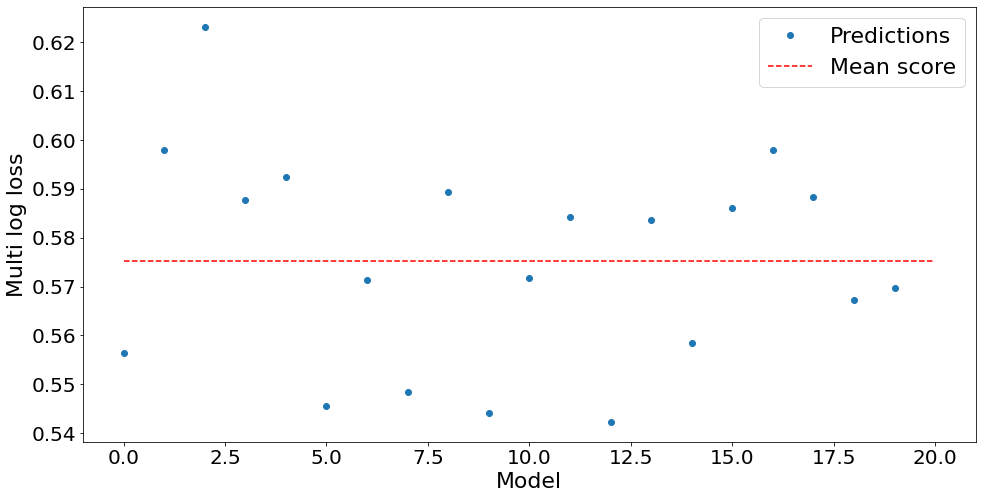

In [375]:
plt.plot(cv_scores, 'o', label = 'Predictions')
plt.hlines(cv_scores.mean(),0,nfolds, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [380]:
pred_test = 0
for i in range(nfolds) :
    pred_test = pred_test + models[i].predict_proba(pca_final.transform(X_test))
pred_test = pred_test/nfolds

In [382]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_pca_20.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.981448   0.016630   0.001922
1  18000   0.210482   0.126472   0.663046
2  16964   0.987397   0.010616   0.001988
3   4795   0.445488   0.520031   0.034481
4   3392   0.277136   0.500873   0.221991

## Ensembling Stratified 20-fold

In [383]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 10,
        'lambda_l2': 20,
        'min_gain_to_split': 1.2545932019138584,
        'bagging_fraction': 1.0,
        'bagging_freq': 1,
        'feature_fraction': 1.0,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [384]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
all_scores = []
for it in range(10) : 
    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X_reduced_pca, y.values)):
        X_train, X_val = X_reduced_pca[train_idx], X_reduced_pca[val_idx]
        y_train, y_val = y.values[train_idx], y.values[val_idx]

        model = lgbm.LGBMClassifier(**params, random_state = it)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=500,
            verbose = -1
        )
        preds = model.predict_proba(X_val)
        models.append(model)
        all_scores.append(log_loss(y_val, preds))
        cv_scores[idx] = log_loss(y_val, preds)

    print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')
all_scores = np.array(all_scores)
print(f'Val set metric = {all_scores.mean():2.3} ± {all_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.2545932019138584, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2545932019138584
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 0.556332
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] boosting is s

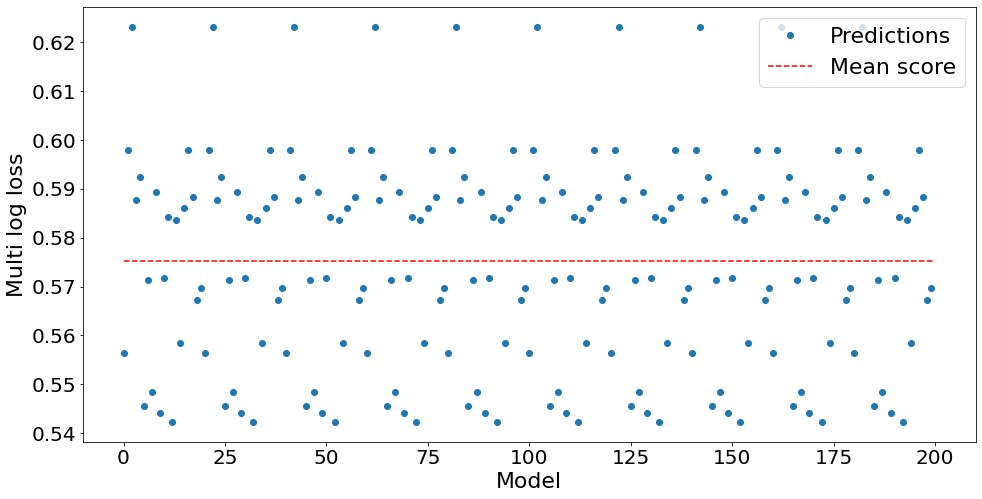

In [385]:
plt.plot(all_scores, 'o', label = 'Predictions')
plt.hlines(all_scores.mean(),0,nfolds*10, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [387]:
pred_test = 0
for i in range(nfolds*10) :
    pred_test = pred_test + models[i].predict_proba(pca_final.transform(X_test))
pred_test = pred_test/(nfolds*10)

In [388]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_pca_20ensemble.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.981448   0.016630   0.001922
1  18000   0.210482   0.126472   0.663046
2  16964   0.987397   0.010616   0.001988
3   4795   0.445488   0.520031   0.034481
4   3392   0.277136   0.500873   0.221991

# VAE + LGBM 

## Extract Hidden Features with VAE

### Prepare data

In [8]:
from sklearn.model_selection import train_test_split
# X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

#we use the training and the testing set since a testing set is available, but without the target variable
#here we don't need the target variable
X_all = pd.concat([X,X_test])
#normalize data
trn_mean = X.mean(axis=0).values.reshape(1,-1)#[0]
trn_std = X.std(axis=0).values.reshape(1,-1)#[0]
print(trn_mean)
print(trn_std)

X_all = (X_all-trn_mean)/trn_std
X_all = X_all.fillna(0)
X_all = X_all.replace([np.inf, -np.inf], 0)
X_train, X_validation = train_test_split(X_all, train_size=0.8, random_state=1234)


[[6.2431e+02 1.3548e-04 2.3032e-03 ... 5.4193e-04 5.2567e-02 3.1161e-03]]
[[3.2062e+02 1.1640e-02 4.7940e-02 ... 2.3275e-02 2.2318e-01 5.5739e-02]]


In [9]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from tqdm import tqdm_notebook, trange

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# instantiate model
torch.manual_seed(7)
torch.cuda.manual_seed(7)

X_tr_torch = torch.tensor(X_train.values, dtype=torch.float)#.to(device)
# Y_tr_torch = torch.tensor(y_train.values, dtype=torch.float)#.to(device)

X_val_torch = torch.tensor(X_validation.values, dtype=torch.float)#.to(device)
# Y_val_torch = torch.tensor(y_validation.values, dtype=torch.float)#.to(device)

# #necessary to normalize
# trn_mean = X.mean(axis=0).values.reshape(1,-1)#[0]
# trn_std = X.std(axis=0).values.reshape(1,-1)#[0]
# print(trn_mean)
# print(trn_std)

torch.save(X_tr_torch, 'X_train.pt') 
torch.save(X_val_torch, 'X_val.pt') 

def create_loaders(data, bs=512, jobs=0):
    data = DataLoader(data, bs, shuffle=True, num_workers=jobs, pin_memory = True)
    return data
bs = 32

trn_dl = TensorDataset(X_tr_torch)#, Y_tr_torch)
trn_dl = create_loaders(trn_dl, bs, jobs=1)

val_dl = TensorDataset(X_val_torch)#, Y_val_torch)
val_dl = create_loaders(val_dl, bs, jobs=1)

# torch.save(trn_dl, 'train_loader.pth')
# torch.save(val_dl, 'val_loader.pth')

### Load trained model and embed

In [79]:
def load_checkpoint(filepath, train = False):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    
    if train :
        for parameter in model.parameters():
            parameter.requires_grad = True
        model.train()
    else :
        for parameter in model.parameters():
            parameter.requires_grad = False
        model.eval()
    return model

In [100]:
#separate training and testing set (after features extraction training)
X_torch_train = torch.tensor(X_all[X_all.index.isin(train.index)].values).float()
X_torch_test = torch.tensor(X_all[X_all.index.isin(test.index)].values).float()

#load model 
from VAE import VAE
path = 'VAE_models/VAE_lr1e-05/model.pth'
model = load_checkpoint(path, train = False)

#extract features
model.eval()
emb_train = model(X_torch_train.to(device))[2].cpu().detach().numpy()
y_train = y.values
emb_test = model(X_torch_test.to(device))[2].cpu().detach().numpy()

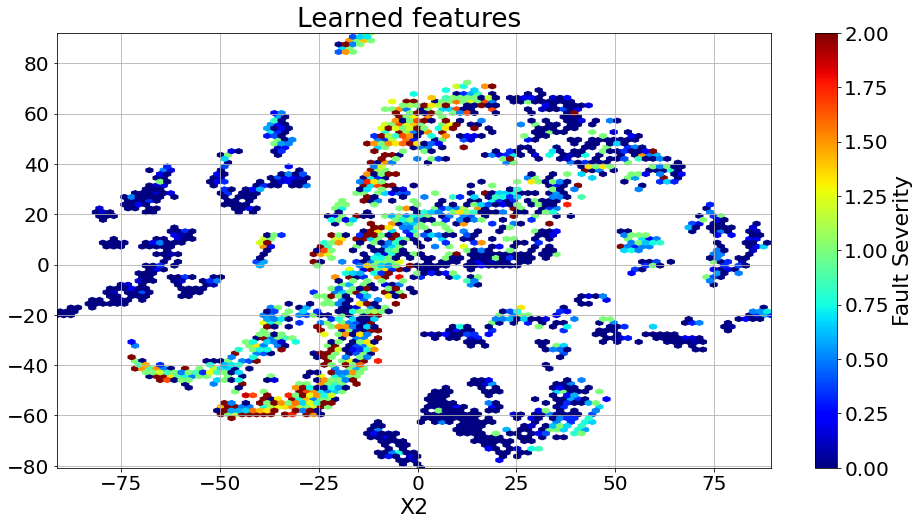

In [389]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(emb_train)

plt.subplot(111)
x0 = projections[:,0]
x1 = projections[:,1]
plt.hexbin(x0,x1,y.values, cmap = plt.cm.jet, bins=None)
# import seaborn as sns
# sns.heatmap(projections)
plt.axis([x0.min(), x0.max(), x1.min(), x1.max()])
plt.grid()
cb = plt.colorbar()
cb.set_label('Fault Severity')
plt.xlabel('X1')
plt.xlabel('X2')
plt.title(f'Learned features ')
plt.show()
# plt.savefig(dir_path+'Embedding')
plt.close()   

In [390]:
emb_train

array([[ 0.2881,  0.0303, -0.0389, ...,  0.2656,  0.2434, -0.067 ],
       [ 0.255 ,  0.0337, -0.0344, ...,  0.2777,  0.1642, -0.041 ],
       [ 0.2898,  0.0416, -0.0195, ...,  0.2586,  0.2812, -0.0665],
       ...,
       [ 0.0561,  0.2034,  0.2569, ...,  0.0564,  0.0711,  0.2527],
       [ 0.063 ,  0.1962,  0.2457, ...,  0.0437,  0.0694,  0.2564],
       [ 0.0438,  0.2249,  0.2732, ...,  0.037 ,  0.0492,  0.2928]],
      dtype=float32)

## Stratified 20-fold

In [391]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
cv_scores = np.empty(nfolds)
for idx, (train_idx, val_idx) in enumerate(cv.split(emb_train, y.values)):
    X_train, X_val = emb_train[train_idx], emb_train[val_idx]
    y_train, y_val = y.values[train_idx], y.values[val_idx]

    model = lgbm.LGBMClassifier(**params, random_state = 1)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=500,
        verbose = -1
    )
    preds = model.predict_proba(X_val)
    models.append(model)
    cv_scores[idx] = log_loss(y_val, preds)
    
print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.2545932019138584, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2545932019138584
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.625543
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] boosting is s

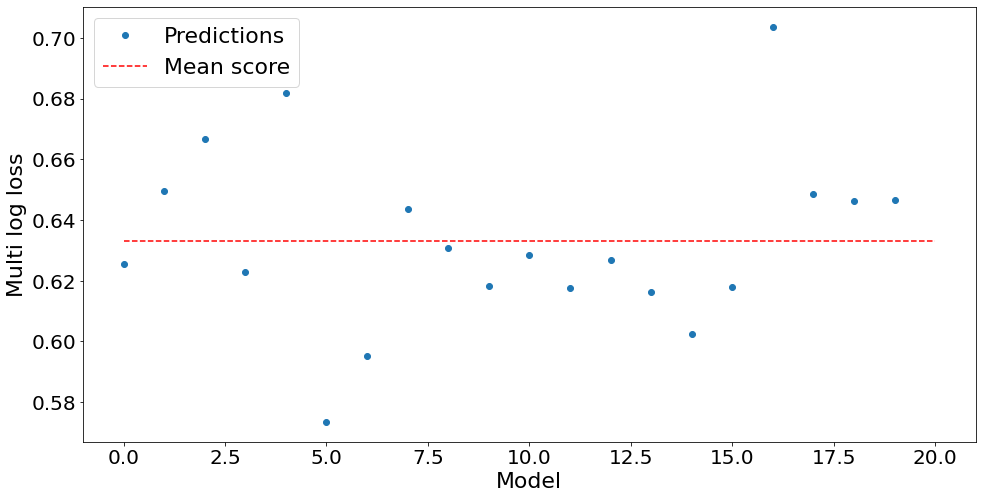

In [392]:
plt.plot(cv_scores, 'o', label = 'Predictions')
plt.hlines(cv_scores.mean(),0,nfolds, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [393]:
pred_test = 0
for i in range(nfolds) :
    pred_test = pred_test + models[i].predict_proba(emb_test)
pred_test = pred_test/nfolds

In [397]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_vae_20.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.947019   0.048982   0.003999
1  18000   0.396241   0.189712   0.414047
2  16964   0.928742   0.069142   0.002116
3   4795   0.454372   0.435890   0.109737
4   3392   0.484462   0.294624   0.220914

## Ensembling Stratified 20-fold

In [383]:
#setting up the parameters
params = {'objective': 'multiclass',
        'n_estimators': 5000,
        'learning_rate': 0.41000000000000003,
        'num_leaves': 1410,
        'max_depth': 10,
        'lambda_l2': 20,
        'min_gain_to_split': 1.2545932019138584,
        'bagging_fraction': 1.0,
        'bagging_freq': 1,
        'feature_fraction': 1.0,
        'metric': 'multi_logloss',
        'is_unbalance': 'true',
        'boosting': 'gbdt',
        'verbose': -1,
        'num_class' : 3
             }


In [384]:
nfolds = 20
cv = StratifiedKFold(n_splits=nfolds, shuffle=True, random_state=1234)
models = []
all_scores = []
for it in range(10) : 
    cv_scores = np.empty(nfolds)
    for idx, (train_idx, val_idx) in enumerate(cv.split(X_reduced_pca, y.values)):
        X_train, X_val = X_reduced_pca[train_idx], X_reduced_pca[val_idx]
        y_train, y_val = y.values[train_idx], y.values[val_idx]

        model = lgbm.LGBMClassifier(**params, random_state = it)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="multi_logloss",
            early_stopping_rounds=500,
            verbose = -1
        )
        preds = model.predict_proba(X_val)
        models.append(model)
        all_scores.append(log_loss(y_val, preds))
        cv_scores[idx] = log_loss(y_val, preds)

    print(f'Val set metric = {cv_scores.mean():2.3} ± {cv_scores.std():2.2}')
all_scores = np.array(all_scores)
print(f'Val set metric = {all_scores.mean():2.3} ± {all_scores.std():2.2}')

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=1.2545932019138584, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.2545932019138584
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 0.556332
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] boosting is s

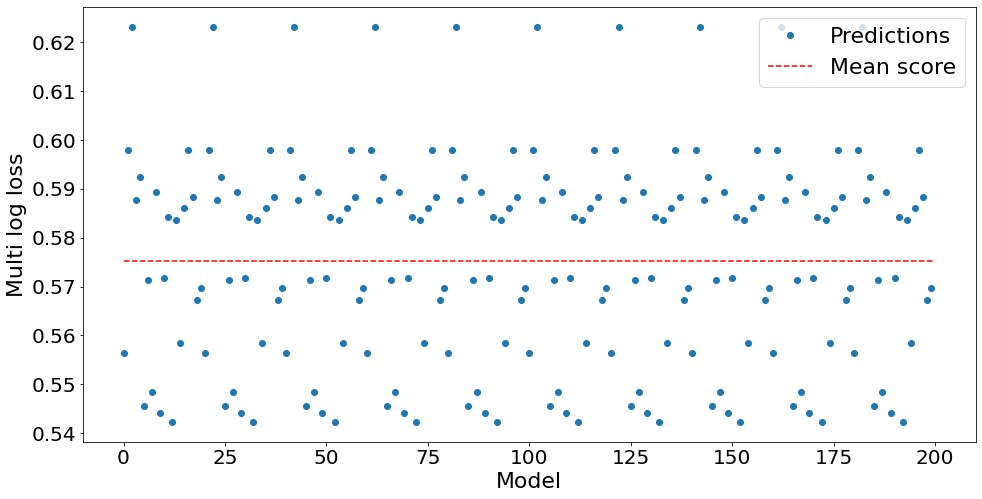

In [385]:
plt.plot(all_scores, 'o', label = 'Predictions')
plt.hlines(all_scores.mean(),0,nfolds*10, linestyles='dashed', color = 'red', label = 'Mean score')
plt.xlabel('Model')
plt.ylabel('Multi log loss')
plt.legend()
plt.show()

In [387]:
pred_test = 0
for i in range(nfolds*10) :
    pred_test = pred_test + models[i].predict_proba(pca_final.transform(X_test))
pred_test = pred_test/(nfolds*10)

In [388]:
submission = pd.DataFrame(pred_test,columns=['predict_0', 'predict_1', 'predict_2'])
submission = pd.concat([X_test.reset_index()['id'], submission], axis=1)
submission.to_csv('submission_pca_20ensemble.csv',index = False)
submission.head(5)

id  predict_0  predict_1  predict_2
0  11066   0.981448   0.016630   0.001922
1  18000   0.210482   0.126472   0.663046
2  16964   0.987397   0.010616   0.001988
3   4795   0.445488   0.520031   0.034481
4   3392   0.277136   0.500873   0.221991